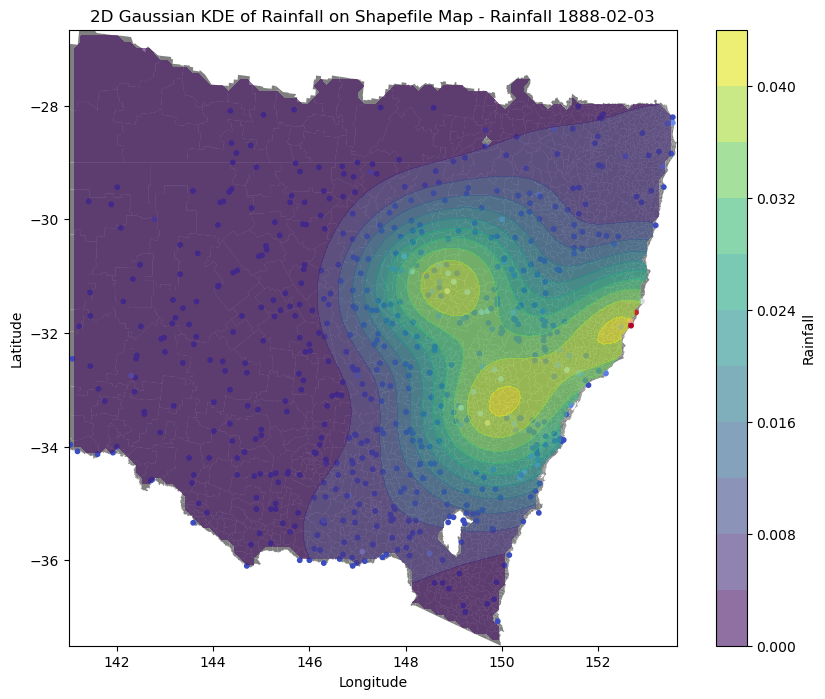

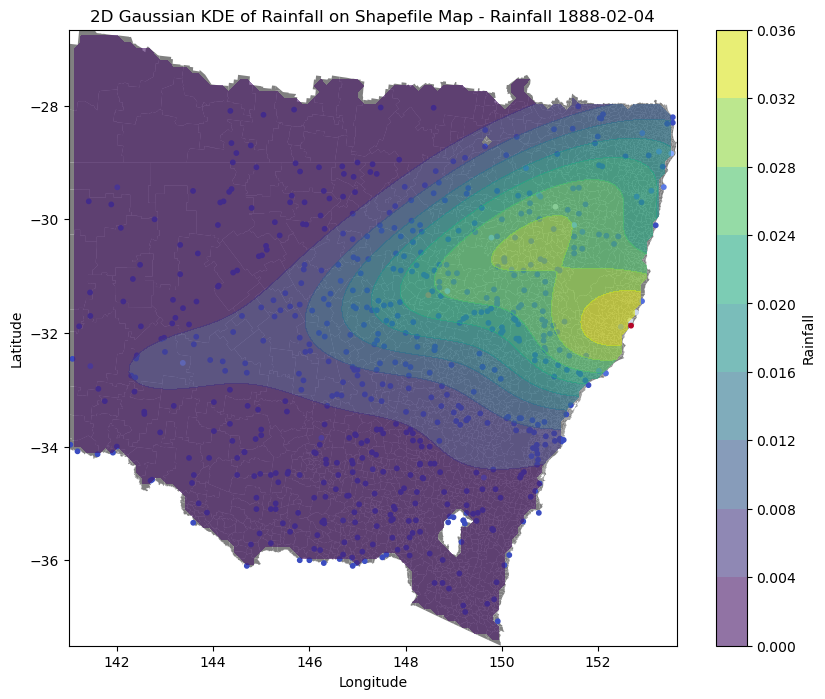

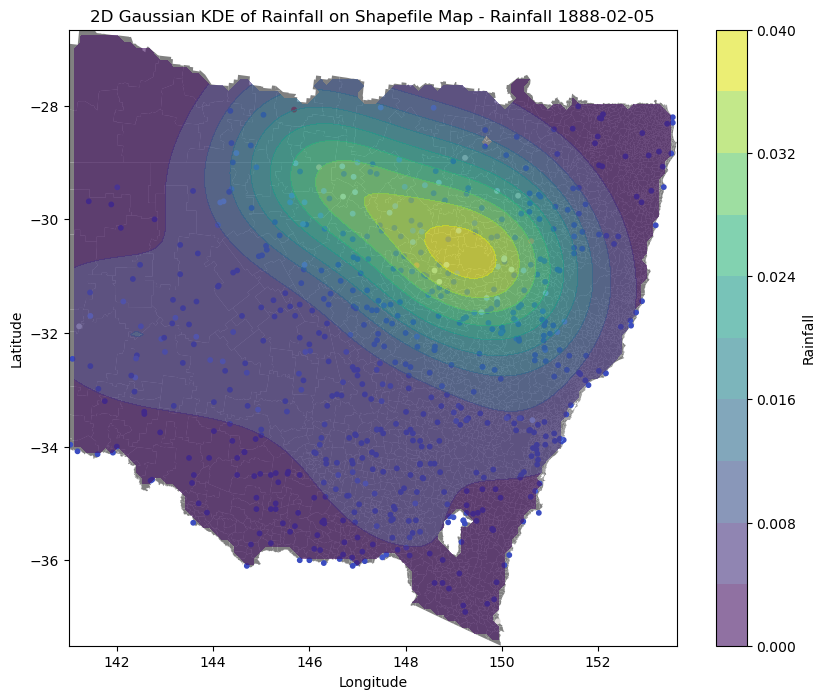

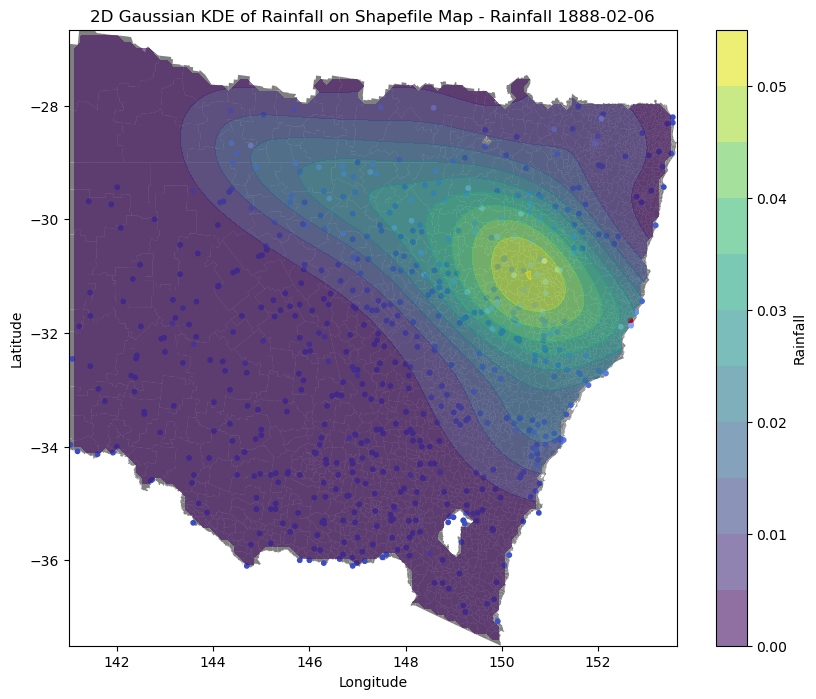

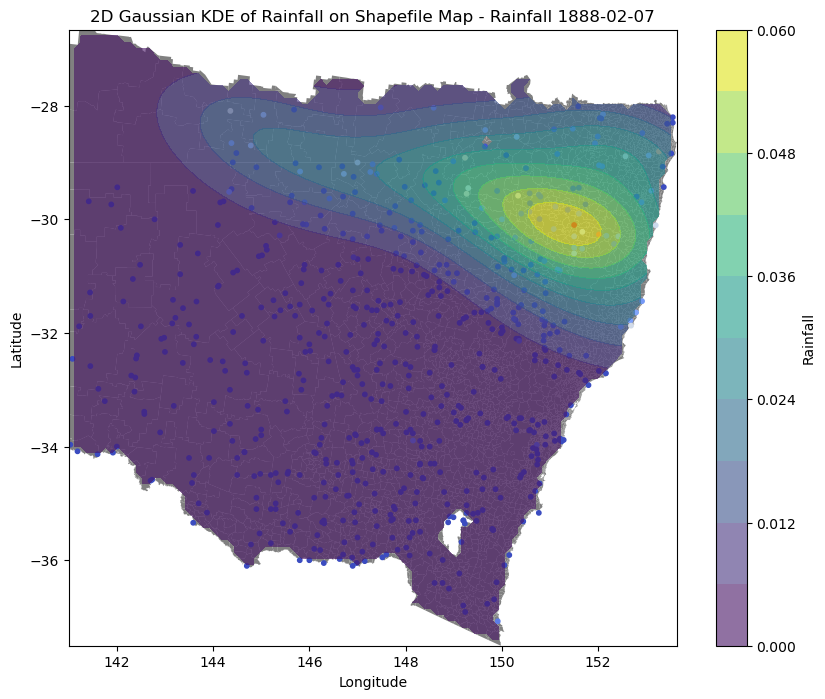

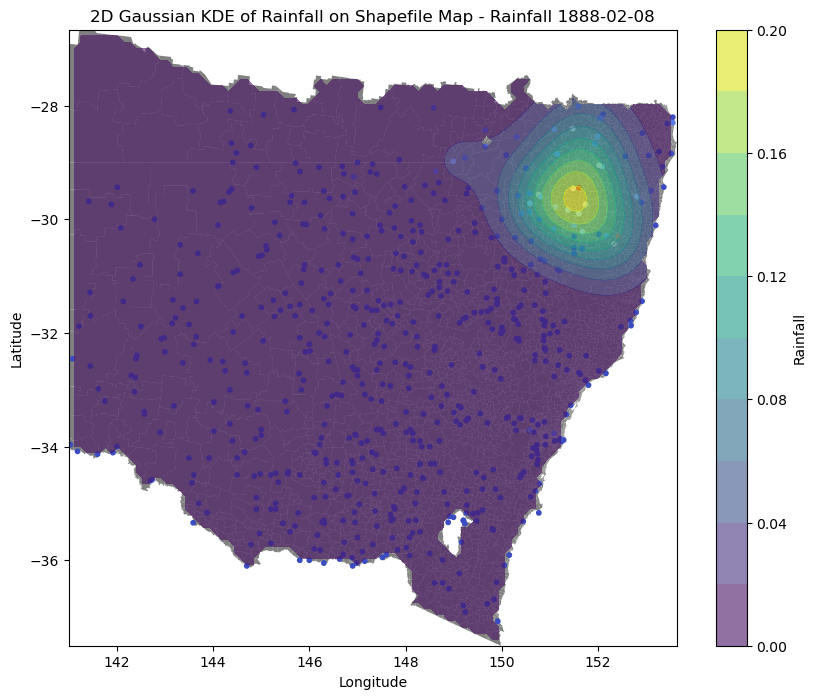

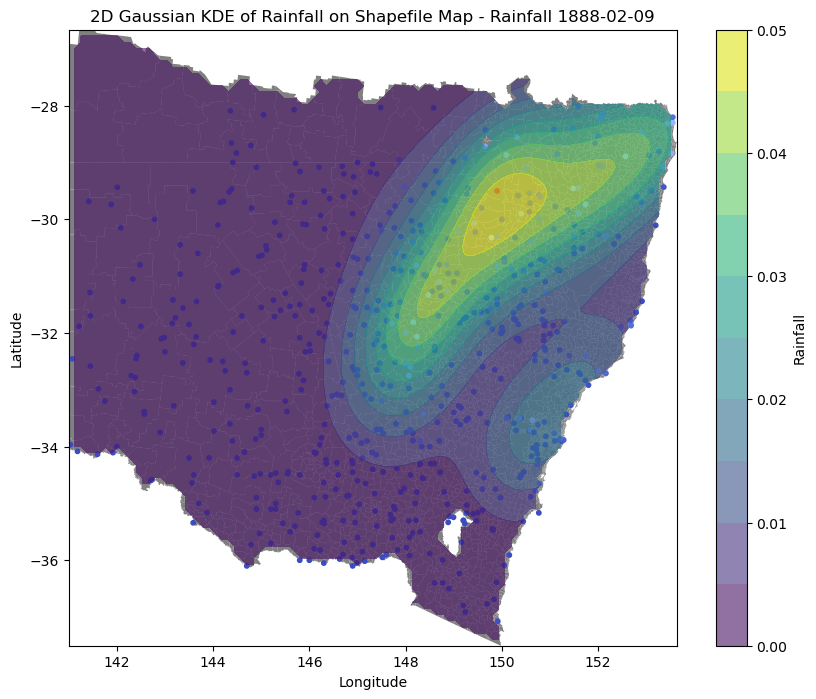

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 149 - 1888-02-03 to 1888-02-09.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Iterate through each rainfall column and generate plots
rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]

for col in rainfall_columns:
    rainfall = x_cleaned[col]

    # Perform Gaussian KDE on the rainfall data
    values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
    kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
    zi = kde(positions).reshape(xi.shape)

    # Mask the grid to include only points inside the shapefile geometry
    points = np.vstack((xi.flatten(), yi.flatten())).T
    mask = np.array([gdf.contains(Point(point)).any() for point in points])
    mask = mask.reshape(xi.shape)
    zi = np.where(mask, zi, np.nan)

    # Plot the shapefile map
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf.plot(ax=ax, color='gray', edgecolor='none')

    # Plot the 2D contour plot with rainfall as contours
    ax.scatter(x_cleaned['Longitude'], x_cleaned['Latitude'], c=rainfall, cmap='coolwarm', s=10)
    contour = ax.contourf(xi, yi, zi, levels=10, cmap="viridis", alpha=0.6)
    plt.colorbar(contour, ax=ax, label='Rainfall')

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'2D Gaussian KDE of Rainfall on Shapefile Map - {col}')
    plt.show()


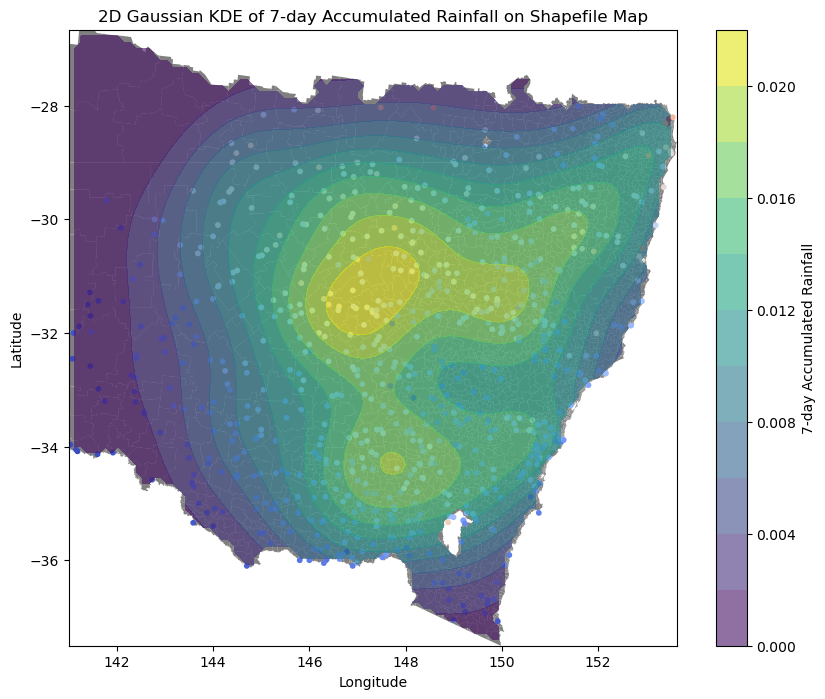

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 5 - 1891-01-11 to 1891-01-17.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Sum up the rainfall values for the 7 days
x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

# Perform Gaussian KDE on the accumulated rainfall data
values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
rainfall = x_cleaned['7_day_accumulated_rainfall']
kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
zi = kde(positions).reshape(xi.shape)

# Mask the grid to include only points inside the shapefile geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([gdf.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)
zi = np.where(mask, zi, np.nan)

# Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', edgecolor='none')

# Plot the 2D contour plot with accumulated rainfall as contours
ax.scatter(x_cleaned['Longitude'], x_cleaned['Latitude'], c=rainfall, cmap='coolwarm', s=10)
contour = ax.contourf(xi, yi, zi, levels=10, cmap="viridis", alpha=0.6)
plt.colorbar(contour, ax=ax, label='7-day Accumulated Rainfall')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Gaussian KDE of 7-day Accumulated Rainfall on Shapefile Map')
plt.show()


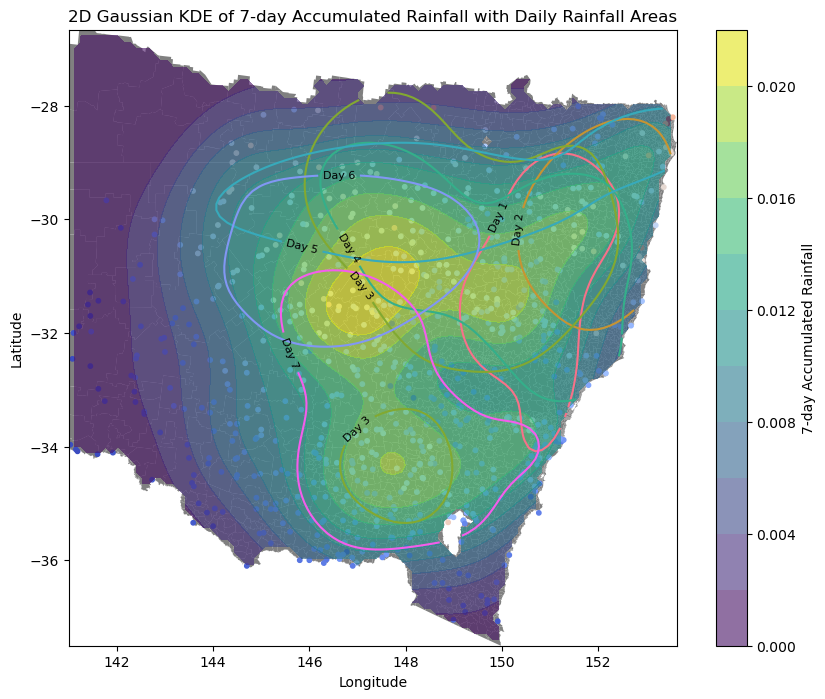

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 5 - 1891-01-11 to 1891-01-17.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Sum up the rainfall values for the 7 days
x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

# Perform Gaussian KDE on the accumulated rainfall data
values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
rainfall = x_cleaned['7_day_accumulated_rainfall']
kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
zi = kde(positions).reshape(xi.shape)

# Mask the grid to include only points inside the shapefile geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([gdf.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)
zi = np.where(mask, zi, np.nan)

# Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', edgecolor='none')

# Plot the 2D contour plot with accumulated rainfall as contours
ax.scatter(x_cleaned['Longitude'], x_cleaned['Latitude'], c=rainfall, cmap='coolwarm', s=10)
contour = ax.contourf(xi, yi, zi, levels=10, cmap="viridis", alpha=0.6)
plt.colorbar(contour, ax=ax, label='7-day Accumulated Rainfall')

# Perform KDE for each day and plot the regions with rainfall
rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
colors = sns.color_palette("husl", len(rainfall_columns))

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
    daily_zi = daily_kde(positions).reshape(xi.shape)
    daily_zi = np.where(mask, daily_zi, np.nan)
    daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)
    
    # Manually add labels with custom formatting and color
    fmt = {level: f'Day {i+1}' for level in daily_contour.levels}
    ax.clabel(daily_contour, fmt=fmt, inline=True, fontsize=8, colors='black')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Gaussian KDE of 7-day Accumulated Rainfall with Daily Rainfall Areas')
plt.show()


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/1113555099.py:67: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/1113555099.py:68: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]


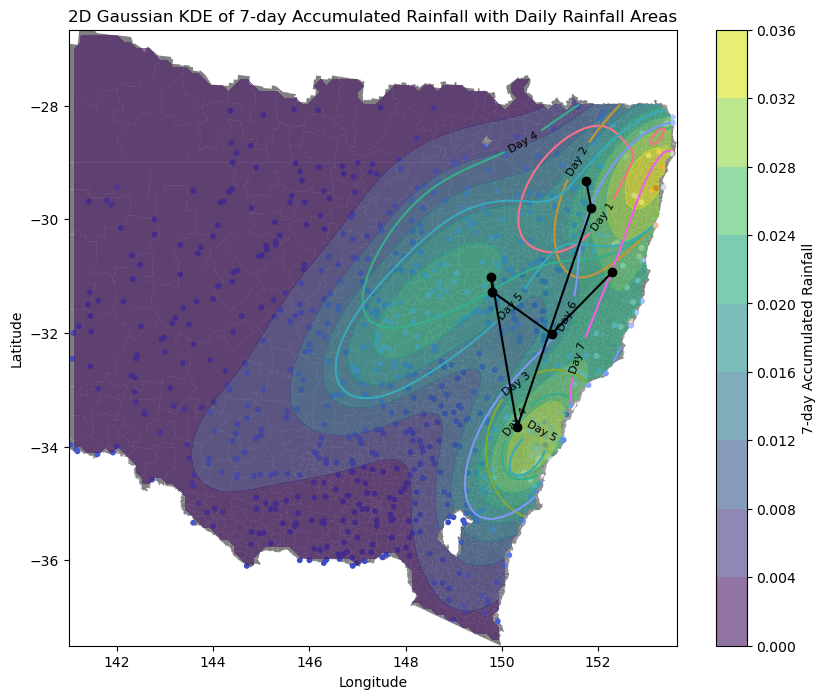

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 23 - 1899-07-06 to 1899-07-12.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Sum up the rainfall values for the 7 days
x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

# Perform Gaussian KDE on the accumulated rainfall data
values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
rainfall = x_cleaned['7_day_accumulated_rainfall']
kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
zi = kde(positions).reshape(xi.shape)

# Mask the grid to include only points inside the shapefile geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([gdf.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)
zi = np.where(mask, zi, np.nan)

# Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', edgecolor='none')

# Plot the 2D contour plot with accumulated rainfall as contours
ax.scatter(x_cleaned['Longitude'], x_cleaned['Latitude'], c=rainfall, cmap='coolwarm', s=10)
contour = ax.contourf(xi, yi, zi, levels=10, cmap="viridis", alpha=0.6)
plt.colorbar(contour, ax=ax, label='7-day Accumulated Rainfall')

centroids = []  # List to store centroids

# Perform KDE for each day and plot the regions with rainfall
rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
colors = sns.color_palette("husl", len(rainfall_columns))

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
    daily_zi = daily_kde(positions).reshape(xi.shape)
    daily_zi = np.where(mask, daily_zi, np.nan)
    daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)
    
    # Calculate the centroid of the contour area
    if daily_contour.collections:
        paths = [c.get_paths() for c in daily_contour.collections]
        for path in paths:
            for p in path:
                centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                centroids.append(centroid)

    # Manually add labels with custom formatting and color
    fmt = {level: f'Day {i+1}' for level in daily_contour.levels}
    ax.clabel(daily_contour, fmt=fmt, inline=True, fontsize=8, colors='black')

# Plot the centroids and connect them
if centroids:
    centroids = np.array(centroids)
    ax.plot(centroids[:, 0], centroids[:, 1], marker='o', color='black', linestyle='-', linewidth=1.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Gaussian KDE of 7-day Accumulated Rainfall with Daily Rainfall Areas')
plt.show()


Total 7-day Accumulated Rainfall: 69568.00
Mean 7-day Accumulated Rainfall: 9938.29
Day 1 Accumulated Rainfall: 7504.00
Day 2 Accumulated Rainfall: 2072.00
Day 3 Accumulated Rainfall: 2843.70


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/1564514588.py:70: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/1564514588.py:71: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/1564514588.py:78: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Day 4 Accumulated Rainfall: 5619.30
Day 5 Accumulated Rainfall: 5818.70
Day 6 Accumulated Rainfall: 16292.40
Day 7 Accumulated Rainfall: 29417.90


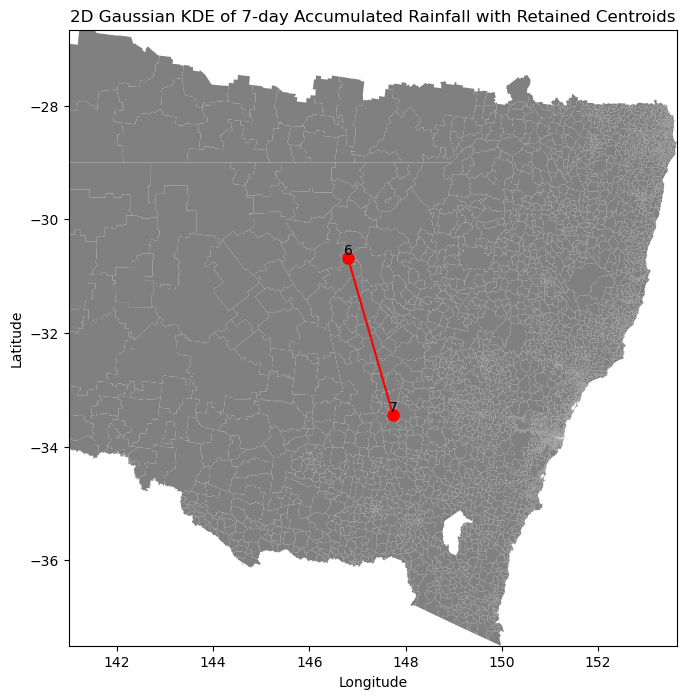

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 5 - 1891-01-11 to 1891-01-17.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Sum up the rainfall values for the 7 days
x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

# Perform Gaussian KDE on the accumulated rainfall data
values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
rainfall = x_cleaned['7_day_accumulated_rainfall']
kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
zi = kde(positions).reshape(xi.shape)

# Mask the grid to include only points inside the shapefile geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([gdf.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)
zi = np.where(mask, zi, np.nan)

# Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', edgecolor='none')



# Calculate the total and mean accumulated rainfall over the 7 days
total_accumulated_rainfall = sum(x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum())
mean_accumulated_rainfall = total_accumulated_rainfall / 7
print(f"Total 7-day Accumulated Rainfall: {total_accumulated_rainfall:.2f}")
print(f"Mean 7-day Accumulated Rainfall: {mean_accumulated_rainfall:.2f}")

retained_centroids = []  # List to store retained centroids
retained_days = []  # List to store the days corresponding to retained centroids

# Perform KDE for each day and calculate centroids without plotting contours
rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
    daily_zi = daily_kde(positions).reshape(xi.shape)
    daily_zi = np.where(mask, daily_zi, np.nan)
    
    # Calculate the centroid of the contour area
    daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=['none'])  # Create contour to get paths without plotting
    if daily_contour.collections:
        paths = [c.get_paths() for c in daily_contour.collections]
        for path in paths:
            for p in path:
                centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                if daily_rainfall.sum() > mean_accumulated_rainfall:
                    retained_centroids.append(centroid)
                    retained_days.append(i+1)
    for c in daily_contour.collections:
        c.remove()  # Remove the contour lines

    # Print the individual day's accumulated rainfall value
    daily_sum_rainfall = daily_rainfall.sum()
    print(f"Day {i+1} Accumulated Rainfall: {daily_sum_rainfall:.2f}")

# Plot the retained centroids and connect them
if retained_centroids:
    retained_centroids = np.array(retained_centroids)
    ax.plot(retained_centroids[:, 0], retained_centroids[:, 1], marker='o', markersize='8',color='red', linestyle='-', linewidth=1.5)

    # Annotate the centroids with their respective day
    for idx, centroid in enumerate(retained_centroids):
        ax.annotate(f'{retained_days[idx]}', (centroid[0], centroid[1]), textcoords="offset points", xytext=(0.5,0.5), ha='center',va='bottom', fontsize=10, color='black')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Gaussian KDE of 7-day Accumulated Rainfall with Retained Centroids')
plt.show()


Day 1 Mean Rainfall: 6.21 mm
Day 2 Mean Rainfall: 1.56 mm
Day 3 Mean Rainfall: 1.14 mm
Day 4 Mean Rainfall: 3.20 mm
Day 5 Mean Rainfall: 3.28 mm
Day 6 Mean Rainfall: 1.49 mm
Day 7 Mean Rainfall: 0.90 mm
Median Threshold: 1.56 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_30131/2815343665.py:82: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_30131/2815343665.py:83: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]


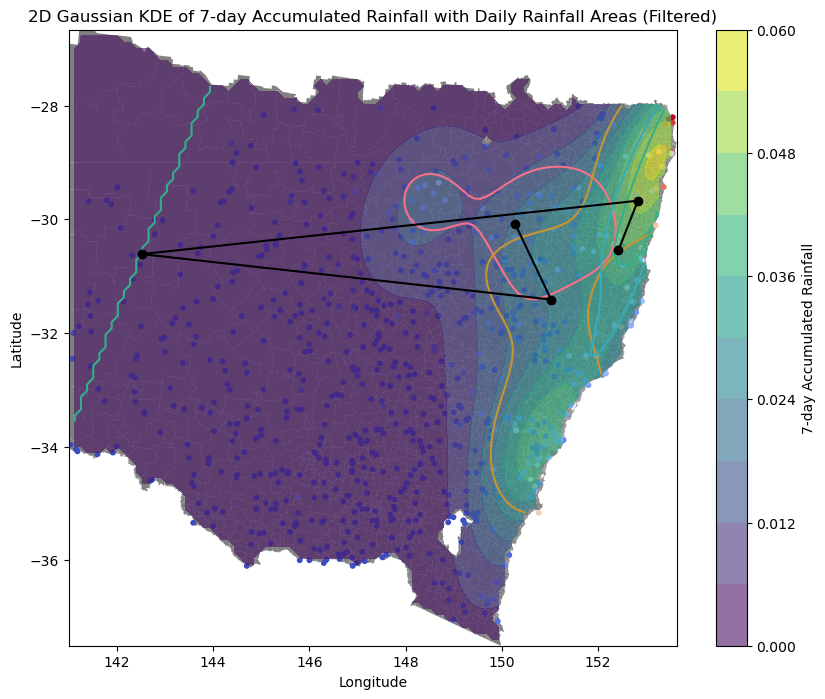

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 18 - 1895-01-28 to 1895-02-03.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Sum up the rainfall values for the 7 days
x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

# Perform Gaussian KDE on the accumulated rainfall data
values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
rainfall = x_cleaned['7_day_accumulated_rainfall']
kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
zi = kde(positions).reshape(xi.shape)

# Mask the grid to include only points inside the shapefile geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([gdf.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)
zi = np.where(mask, zi, np.nan)

# Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', edgecolor='none')

# Plot the 2D contour plot with accumulated rainfall as contours
ax.scatter(x_cleaned['Longitude'], x_cleaned['Latitude'], c=rainfall, cmap='coolwarm', s=10)
contour = ax.contourf(xi, yi, zi, levels=10, cmap="viridis", alpha=0.6)
plt.colorbar(contour, ax=ax, label='7-day Accumulated Rainfall')

daily_means = []  # List to store daily mean rainfall
centroids = []  # List to store retained centroids

# Perform KDE for each day and calculate centroids based on threshold
rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
colors = sns.color_palette("husl", len(rainfall_columns))

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_mean_rainfall = daily_rainfall.mean()
    daily_means.append(daily_mean_rainfall)
    print(f"Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

# Calculate the median of the daily mean rainfall
median_threshold = np.median(daily_means)
print(f"Median Threshold: {median_threshold:.2f} mm")

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_mean_rainfall = daily_means[i]

    # Check if the daily mean exceeds the median threshold
    if daily_mean_rainfall >= median_threshold:
        daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
        daily_zi = daily_kde(positions).reshape(xi.shape)
        daily_zi = np.where(mask, daily_zi, np.nan)
        daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

        # Calculate the centroid of the contour area
        if daily_contour.collections:
            paths = [c.get_paths() for c in daily_contour.collections]
            for path in paths:
                for p in path:
                    centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                    centroids.append(centroid)

# Plot the retained centroids and connect them
if centroids:
    centroids = np.array(centroids)
    ax.plot(centroids[:, 0], centroids[:, 1], marker='o', color='black', linestyle='-', linewidth=1.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Gaussian KDE of 7-day Accumulated Rainfall with Daily Rainfall Areas (Filtered)')
plt.show()


Day 1 Mean Rainfall: 0.00 mm
Day 2 Mean Rainfall: 0.16 mm
Day 3 Mean Rainfall: 0.16 mm
Day 4 Mean Rainfall: 5.02 mm
Day 5 Mean Rainfall: 6.32 mm
Day 6 Mean Rainfall: 2.55 mm
Day 7 Mean Rainfall: 0.65 mm
Median Threshold: 0.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/2228913664.py:89: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/2228913664.py:90: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]


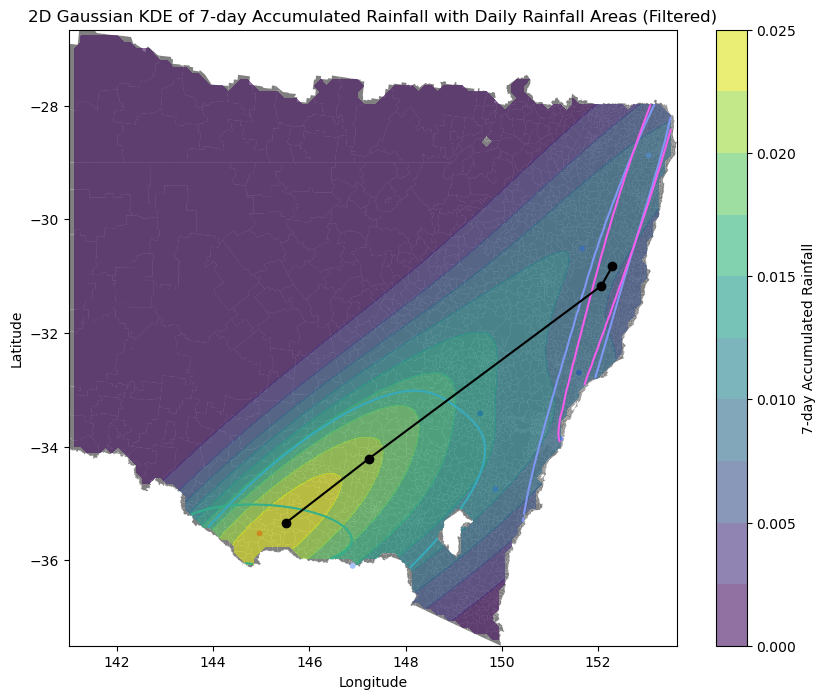

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 1060 - 1860-12-07 to 1860-12-13.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Sum up the rainfall values for the 7 days
x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

# Perform Gaussian KDE on the accumulated rainfall data
values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
rainfall = x_cleaned['7_day_accumulated_rainfall']
kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
zi = kde(positions).reshape(xi.shape)

# Mask the grid to include only points inside the shapefile geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([gdf.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)
zi = np.where(mask, zi, np.nan)

# Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', edgecolor='none')

# Plot the 2D contour plot with accumulated rainfall as contours
ax.scatter(x_cleaned['Longitude'], x_cleaned['Latitude'], c=rainfall, cmap='coolwarm', s=10)
contour = ax.contourf(xi, yi, zi, levels=10, cmap="viridis", alpha=0.6)
plt.colorbar(contour, ax=ax, label='7-day Accumulated Rainfall')

daily_means = []  # List to store daily mean rainfall
centroids = []  # List to store retained centroids

# Perform KDE for each day and calculate centroids based on threshold
rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
colors = sns.color_palette("husl", len(rainfall_columns))

# Define a minimum threshold for KDE values
kde_threshold = 1e-4

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_mean_rainfall = daily_rainfall.mean()
    daily_means.append(daily_mean_rainfall)
    print(f"Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

# Calculate the median of the daily mean rainfall
median_threshold = np.median(daily_means)
print(f"Median Threshold: {median_threshold:.2f} mm")

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_mean_rainfall = daily_means[i]

    # Check if the daily mean exceeds the median threshold
    if daily_mean_rainfall >= median_threshold:
        daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
        daily_zi = daily_kde(positions).reshape(xi.shape)
        daily_zi = np.where(mask, daily_zi, np.nan)

        # Apply the threshold to filter out negligible KDE values
        daily_zi = np.where(daily_zi >= kde_threshold, daily_zi, np.nan)

        daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

        # Calculate the centroid of the contour area
        if daily_contour.collections:
            paths = [c.get_paths() for c in daily_contour.collections]
            for path in paths:
                for p in path:
                    centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                    centroids.append(centroid)

# Plot the retained centroids and connect them
if centroids:
    centroids = np.array(centroids)
    ax.plot(centroids[:, 0], centroids[:, 1], marker='o', color='black', linestyle='-', linewidth=1.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Gaussian KDE of 7-day Accumulated Rainfall with Daily Rainfall Areas (Filtered)')
plt.show()


Day 1 Mean Rainfall: 10.01 mm
Day 2 Mean Rainfall: 2.76 mm
Day 3 Mean Rainfall: 3.79 mm
Day 4 Mean Rainfall: 7.49 mm
Day 5 Mean Rainfall: 7.76 mm
Day 6 Mean Rainfall: 21.72 mm
Day 7 Mean Rainfall: 39.22 mm
Median Threshold: 7.76 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/1962888043.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/1962888043.py:82: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/1962888043.py:88: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


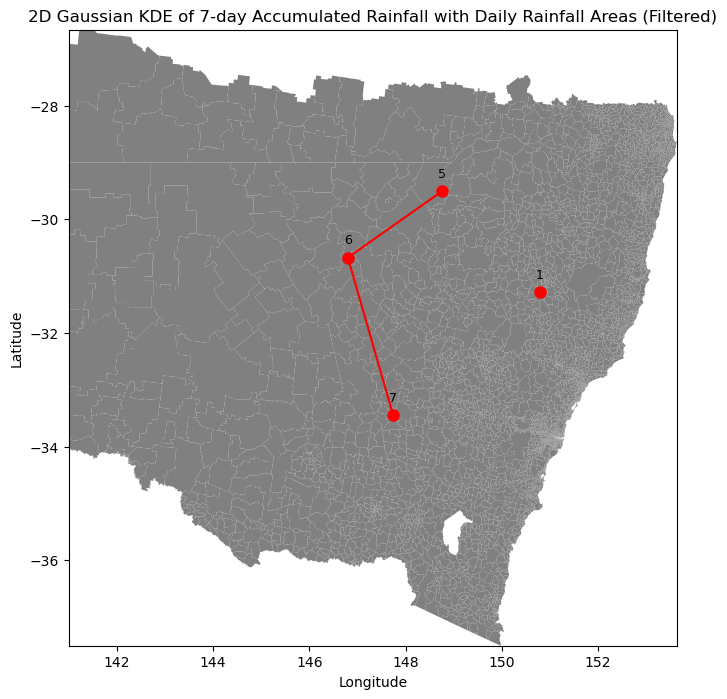

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 5 - 1891-01-11 to 1891-01-17.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Sum up the rainfall values for the 7 days
x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

# Perform Gaussian KDE on the accumulated rainfall data
values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
rainfall = x_cleaned['7_day_accumulated_rainfall']
kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
zi = kde(positions).reshape(xi.shape)

# Mask the grid to include only points inside the shapefile geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([gdf.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)
zi = np.where(mask, zi, np.nan)

# Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', edgecolor='none')

# Plot the 2D contour plot with accumulated rainfall as contours


daily_means = []  # List to store daily mean rainfall
centroids = []  # List to store retained centroids
retained_days = []  # List to store retained days

# Perform KDE for each day and calculate centroids based on threshold
rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
colors = sns.color_palette("husl", len(rainfall_columns))

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_mean_rainfall = daily_rainfall.mean()
    daily_means.append(daily_mean_rainfall)
    print(f"Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

# Calculate the median of the daily mean rainfall
median_threshold = np.median(daily_means)
print(f"Median Threshold: {median_threshold:.2f} mm")

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_mean_rainfall = daily_means[i]

    # Check if the daily mean exceeds the median threshold
    if daily_mean_rainfall >= median_threshold:
        daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
        daily_zi = daily_kde(positions).reshape(xi.shape)
        daily_zi = np.where(mask, daily_zi, np.nan)
        daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

        # Calculate the centroid of the contour area
        if daily_contour.collections:
            paths = [c.get_paths() for c in daily_contour.collections]
            for path in paths:
                for p in path:
                    centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                    centroids.append(centroid)
                    retained_days.append(i)
        for c in daily_contour.collections:
         c.remove()  # Remove the contour lines

# Plot the retained centroids and connect them sequentially
if centroids:
    centroids = np.array(centroids)
    for j in range(len(centroids)):
        ax.plot(centroids[j, 0], centroids[j, 1], marker='o', markersize= '8',color='red', linestyle='')

        # Annotate the centroids with their respective day
        ax.annotate(f'{retained_days[j] + 1}', (centroids[j, 0], centroids[j, 1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='black')

        # Connect centroids of consecutive days
        if j > 0 and retained_days[j] == retained_days[j-1] + 1:
            ax.plot(centroids[[j-1, j], 0], centroids[[j-1, j], 1], color='red', linestyle='-', linewidth=1.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Gaussian KDE of 7-day Accumulated Rainfall with Daily Rainfall Areas (Filtered)')
plt.show()


Day 1 Mean Rainfall: 6.21 mm
Day 2 Mean Rainfall: 1.56 mm
Day 3 Mean Rainfall: 1.14 mm
Day 4 Mean Rainfall: 3.20 mm
Day 5 Mean Rainfall: 3.28 mm
Day 6 Mean Rainfall: 1.49 mm
Day 7 Mean Rainfall: 0.90 mm
Median Threshold: 1.56 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/2480561577.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_15982/2480561577.py:80: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]


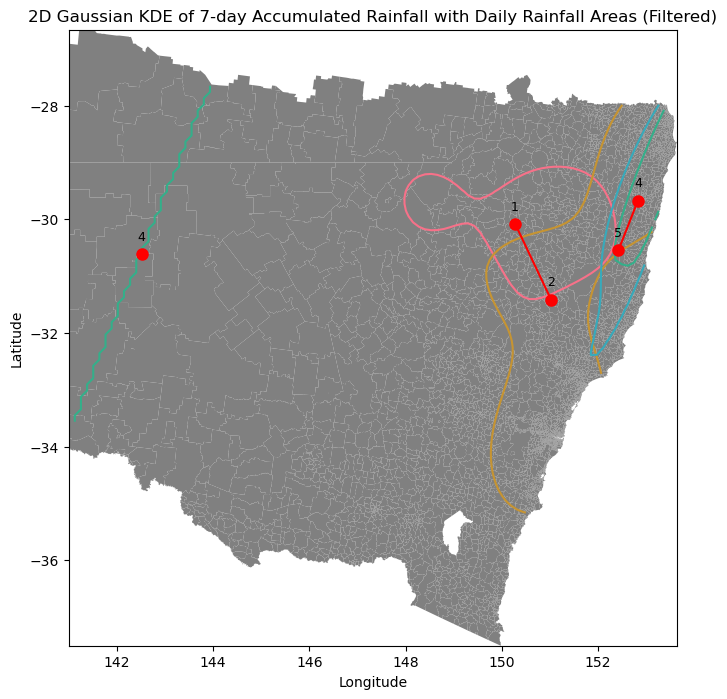

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the CSV file
csv_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 18 - 1895-01-28 to 1895-02-03.csv'
df = pd.read_csv(csv_file)

# Filter out NaN values in latitude and longitude
x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

# Read the shapefile
shapefile_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Get the bounds of the shapefile
minx, miny, maxx, maxy = gdf.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Sum up the rainfall values for the 7 days
x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

# Perform Gaussian KDE on the accumulated rainfall data
values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
rainfall = x_cleaned['7_day_accumulated_rainfall']
kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
zi = kde(positions).reshape(xi.shape)

# Mask the grid to include only points inside the shapefile geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([gdf.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)
zi = np.where(mask, zi, np.nan)

# Plot the shapefile map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='gray', edgecolor='none')

# List to store daily mean rainfall, retained centroids, and retained days
daily_means = []
centroids = []
retained_days = []

# Perform KDE for each day and calculate centroids based on threshold
rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
colors = sns.color_palette("husl", len(rainfall_columns))

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_mean_rainfall = daily_rainfall.mean()
    daily_means.append(daily_mean_rainfall)
    print(f"Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

# Calculate the median of the daily mean rainfall
median_threshold = np.median(daily_means)
print(f"Median Threshold: {median_threshold:.2f} mm")

for i, col in enumerate(rainfall_columns):
    daily_rainfall = x_cleaned[col]
    daily_mean_rainfall = daily_means[i]

    # Check if the daily mean exceeds the median threshold
    if daily_mean_rainfall >= median_threshold:
        daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
        daily_zi = daily_kde(positions).reshape(xi.shape)
        daily_zi = np.where(mask, daily_zi, np.nan)
        daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

        # Calculate the centroid of the contour area
        if daily_contour.collections:
            paths = [c.get_paths() for c in daily_contour.collections]
            for path in paths:
                for p in path:
                    centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                    centroids.append(centroid)
                    retained_days.append(i)
       

# Plot the retained centroids and connect them sequentially
if centroids:
    centroids = np.array(centroids)
    for j in range(len(centroids)):
        ax.plot(centroids[j, 0], centroids[j, 1], marker='o', markersize='8', color='red', linestyle='')
        # Annotate the centroids with their respective day
        ax.annotate(f'{retained_days[j] + 1}', (centroids[j, 0], centroids[j, 1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='black')

        # Connect centroids of consecutive days
        if j > 0 and retained_days[j] == retained_days[j - 1] + 1:
            ax.plot(centroids[[j - 1, j], 0], centroids[[j - 1, j], 1], color='red', linestyle='-', linewidth=1.5)

# Load the Excel file and extract latitude and longitude from "Unique Stations" sheet
excel_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/BoM 3 Station list.xlsx'  # Update with your Excel file path
unique_stations = pd.read_excel(excel_file, sheet_name='Unique Stations')

# Assuming Latitude and Longitude columns exist in the Excel sheet
latitude_range = unique_stations['Latitude'].values
longitude_range = unique_stations['Longitude'].values

# Check if all centroids fall within the lat/lon range
if centroids.size > 0:
    lat_min, lat_max = latitude_range.min(), latitude_range.max()
    lon_min, lon_max = longitude_range.min(), longitude_range.max()
    
    if np.all((centroids[:, 1] >= lat_min) & (centroids[:, 1] <= lat_max) &
               (centroids[:, 0] >= lon_min) & (centroids[:, 0] <= lon_max)):
        print("Coastal Town Event")

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('2D Gaussian KDE of 7-day Accumulated Rainfall with Daily Rainfall Areas (Filtered)')
plt.show()


In [ ]:
 for c in daily_contour.collections:
            c.remove()  # Remove the contour lines

Event 1 - 1889-07-14 to 1889-07-20 - Day 1 Mean Rainfall: 0.41 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 2 Mean Rainfall: 0.99 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 3 Mean Rainfall: 3.29 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 4 Mean Rainfall: 6.10 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 5 Mean Rainfall: 4.93 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 6 Mean Rainfall: 4.12 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 7 Mean Rainfall: 1.69 mm
Event 1 - 1889-07-14 to 1889-07-20 - Median Threshold: 3.29 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 1 - 1889-07-14 to 1889-07-20: (Longitude: 148.87855027896802, Latitude: -29.661731441415547)
Centroid 2 for Event 1 - 1889-07-14 to 1889-07-20: (Longitude: 149.3137634034076, Latitude: -29.643682776135787)
Centroid 3 for Event 1 - 1889-07-14 to 1889-07-20: (Longitude: 152.0868298524472, Latitude: -29.349098793014445)
Centroid 4 for Event 1 - 1889-07-14 to 1889-07-20: (Longitude: 152.55916487520014, Latitude: -29.75337091463053)
Event 2 - 1890-01-10 to 1890-01-16 - Day 1 Mean Rainfall: 1.65 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 2 Mean Rainfall: 6.17 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 3 Mean Rainfall: 13.79 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 4 Mean Rainfall: 14.87 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 5 Mean Rainfall: 6.70 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 6 Mean Rainfall: 7.47 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 7 Mean Rainfall: 5.57 mm
Event 2 - 1890-01-10 to 1890-01-16 - Median Threshold: 6.70 mm
Centroid 1 for Event

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 3 - 1890-01-29 to 1890-02-04 - Day 1 Mean Rainfall: 0.28 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 2 Mean Rainfall: 2.06 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 3 Mean Rainfall: 3.10 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 4 Mean Rainfall: 6.23 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 5 Mean Rainfall: 7.15 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 6 Mean Rainfall: 7.44 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 7 Mean Rainfall: 2.64 mm
Event 3 - 1890-01-29 to 1890-02-04 - Median Threshold: 3.10 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 3 - 1890-01-29 to 1890-02-04: (Longitude: 150.21274083133326, Latitude: -34.4030133441142)
Centroid 2 for Event 3 - 1890-01-29 to 1890-02-04: (Longitude: 151.0733446218701, Latitude: -32.35297813511448)
Centroid 3 for Event 3 - 1890-01-29 to 1890-02-04: (Longitude: 151.34607008525444, Latitude: -31.434159204336332)
Centroid 4 for Event 3 - 1890-01-29 to 1890-02-04: (Longitude: 150.2709801197677, Latitude: -33.79417331205035)
Event 3 - 1890-01-29 to 1890-02-04 - Coastal Town Event
Event 4 - 1890-03-04 to 1890-03-10 - Day 1 Mean Rainfall: 4.14 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 2 Mean Rainfall: 2.66 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 3 Mean Rainfall: 3.37 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 4 Mean Rainfall: 3.84 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 5 Mean Rainfall: 5.24 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 6 Mean Rainfall: 7.47 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 7 Mean Rainfall: 7.66 mm
Event 4 - 1890-03-04 to 1890-03-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 4 - 1890-03-04 to 1890-03-10: (Longitude: 150.01413293312393, Latitude: -33.02078660469203)
Centroid 2 for Event 4 - 1890-03-04 to 1890-03-10: (Longitude: 152.06175025038377, Latitude: -29.62787954674579)
Centroid 3 for Event 4 - 1890-03-04 to 1890-03-10: (Longitude: 148.38824219772272, Latitude: -30.426359949249605)
Centroid 4 for Event 4 - 1890-03-04 to 1890-03-10: (Longitude: 150.82045936123941, Latitude: -31.681237349131877)
Event 5 - 1891-01-11 to 1891-01-17 - Day 1 Mean Rainfall: 10.01 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 2 Mean Rainfall: 2.76 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 3 Mean Rainfall: 3.79 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 4 Mean Rainfall: 7.49 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 5 Mean Rainfall: 7.76 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 6 Mean Rainfall: 21.72 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 7 Mean Rainfall: 39.22 mm
Event 5 - 1891-01-11 to 1891-01-17 - Median Threshold: 7.76 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 5 - 1891-01-11 to 1891-01-17: (Longitude: 150.792445710952, Latitude: -31.27597709800346)
Centroid 2 for Event 5 - 1891-01-11 to 1891-01-17: (Longitude: 148.7502065674487, Latitude: -29.508361432369686)
Centroid 3 for Event 5 - 1891-01-11 to 1891-01-17: (Longitude: 146.79964252151714, Latitude: -30.673248170932457)
Centroid 4 for Event 5 - 1891-01-11 to 1891-01-17: (Longitude: 147.73900821238118, Latitude: -33.44327322261332)
Event 6 - 1891-06-04 to 1891-06-10 - Day 1 Mean Rainfall: 0.06 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 2 Mean Rainfall: 0.14 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 3 Mean Rainfall: 0.50 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 4 Mean Rainfall: 2.65 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 5 Mean Rainfall: 7.90 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 6 Mean Rainfall: 9.66 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 7 Mean Rainfall: 5.90 mm
Event 6 - 1891-06-04 to 1891-06-10 - Median Threshold: 2.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 6 - 1891-06-04 to 1891-06-10: (Longitude: 147.11992662673427, Latitude: -29.704675910203)
Centroid 2 for Event 6 - 1891-06-04 to 1891-06-10: (Longitude: 148.37385747242672, Latitude: -29.879001574846363)
Centroid 3 for Event 6 - 1891-06-04 to 1891-06-10: (Longitude: 151.76009813046113, Latitude: -29.75604015618154)
Centroid 4 for Event 6 - 1891-06-04 to 1891-06-10: (Longitude: 150.6362551941674, Latitude: -33.39653872402904)
Event 7 - 1892-03-10 to 1892-03-16 - Day 1 Mean Rainfall: 0.21 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 2 Mean Rainfall: 1.15 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 3 Mean Rainfall: 3.01 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 4 Mean Rainfall: 7.52 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 5 Mean Rainfall: 6.58 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 6 Mean Rainfall: 1.76 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 7 Mean Rainfall: 3.10 mm
Event 7 - 1892-03-10 to 1892-03-16 - Median Threshold: 3.01 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 7 - 1892-03-10 to 1892-03-16: (Longitude: 150.54871250959366, Latitude: -32.7115080702315)
Centroid 2 for Event 7 - 1892-03-10 to 1892-03-16: (Longitude: 151.1025249529568, Latitude: -31.193254369533616)
Centroid 3 for Event 7 - 1892-03-10 to 1892-03-16: (Longitude: 152.25686215045368, Latitude: -29.695578686910917)
Centroid 4 for Event 7 - 1892-03-10 to 1892-03-16: (Longitude: 149.51569415478605, Latitude: -35.122197076175794)
Event 7 - 1892-03-10 to 1892-03-16 - Coastal Town Event
Event 8 - 1892-03-15 to 1892-03-21 - Day 1 Mean Rainfall: 2.00 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 2 Mean Rainfall: 3.11 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 3 Mean Rainfall: 2.58 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 4 Mean Rainfall: 5.49 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 5 Mean Rainfall: 6.73 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 6 Mean Rainfall: 4.28 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 7 Mean Rainfall: 0.95 mm
Event 8 - 1892-03-15 to 1892-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 8 - 1892-03-15 to 1892-03-21: (Longitude: 149.51590827015156, Latitude: -35.119427101621696)
Centroid 2 for Event 8 - 1892-03-15 to 1892-03-21: (Longitude: 150.59618057834658, Latitude: -33.373496495995354)
Centroid 3 for Event 8 - 1892-03-15 to 1892-03-21: (Longitude: 150.59036279161748, Latitude: -33.43371624086757)
Centroid 4 for Event 8 - 1892-03-15 to 1892-03-21: (Longitude: 150.8021517741872, Latitude: -33.62168476263753)
Event 8 - 1892-03-15 to 1892-03-21 - Coastal Town Event
Event 9 - 1892-03-30 to 1892-04-05 - Day 1 Mean Rainfall: 0.41 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 2 Mean Rainfall: 3.23 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 3 Mean Rainfall: 5.91 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 4 Mean Rainfall: 5.03 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 5 Mean Rainfall: 4.33 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 6 Mean Rainfall: 2.29 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 7 Mean Rainfall: 4.64 mm
Event 9 - 1892-03-30 to 1892-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 9 - 1892-03-30 to 1892-04-05: (Longitude: 150.6925311127299, Latitude: -33.93647112286147)
Centroid 2 for Event 9 - 1892-03-30 to 1892-04-05: (Longitude: 152.7612109059006, Latitude: -29.66785396753621)
Centroid 3 for Event 9 - 1892-03-30 to 1892-04-05: (Longitude: 152.75884326201978, Latitude: -29.740395225242143)
Centroid 4 for Event 9 - 1892-03-30 to 1892-04-05: (Longitude: 150.28723743060567, Latitude: -33.541741463813786)
Event 9 - 1892-03-30 to 1892-04-05 - Coastal Town Event
Event 10 - 1892-04-17 to 1892-04-23 - Day 1 Mean Rainfall: 0.02 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 2 Mean Rainfall: 0.23 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 3 Mean Rainfall: 0.86 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 4 Mean Rainfall: 3.14 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 5 Mean Rainfall: 7.04 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 6 Mean Rainfall: 6.00 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 7 Mean Rainfall: 0.19 mm
Event 10 - 1892-04-17 t

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 10 - 1892-04-17 to 1892-04-23: (Longitude: 149.362037361803, Latitude: -32.34451750755645)
Centroid 2 for Event 10 - 1892-04-17 to 1892-04-23: (Longitude: 151.25410993828518, Latitude: -29.46613629903632)
Centroid 3 for Event 10 - 1892-04-17 to 1892-04-23: (Longitude: 151.35785166167304, Latitude: -30.193685955471018)
Centroid 4 for Event 10 - 1892-04-17 to 1892-04-23: (Longitude: 150.12960193847107, Latitude: -33.29574876779628)
Event 10 - 1892-04-17 to 1892-04-23 - Coastal Town Event
Event 11 - 1892-10-24 to 1892-10-30 - Day 1 Mean Rainfall: 1.81 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 2 Mean Rainfall: 3.70 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 3 Mean Rainfall: 9.59 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 4 Mean Rainfall: 12.14 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 5 Mean Rainfall: 10.10 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 6 Mean Rainfall: 1.47 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 7 Mean Rainfall: 0.30 mm
Event 11 - 1892-1

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 11 - 1892-10-24 to 1892-10-30: (Longitude: 147.09853883202078, Latitude: -29.158125516735552)
Centroid 2 for Event 11 - 1892-10-24 to 1892-10-30: (Longitude: 149.1859626477039, Latitude: -29.97921663047589)
Centroid 3 for Event 11 - 1892-10-24 to 1892-10-30: (Longitude: 150.30351501578886, Latitude: -31.31659554282528)
Centroid 4 for Event 11 - 1892-10-24 to 1892-10-30: (Longitude: 149.45324745672454, Latitude: -32.33452748902243)
Event 12 - 1893-01-18 to 1893-01-24 - Day 1 Mean Rainfall: 3.67 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 2 Mean Rainfall: 3.03 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 3 Mean Rainfall: 0.54 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 4 Mean Rainfall: 2.15 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 5 Mean Rainfall: 7.08 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 6 Mean Rainfall: 18.25 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 7 Mean Rainfall: 0.44 mm
Event 12 - 1893-01-18 to 1893-01-24 - Median Threshold: 3.03 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 12 - 1893-01-18 to 1893-01-24: (Longitude: 149.14838047112303, Latitude: -35.18681817693616)
Centroid 2 for Event 12 - 1893-01-18 to 1893-01-24: (Longitude: 150.68168076487163, Latitude: -33.49131072245895)
Centroid 3 for Event 12 - 1893-01-18 to 1893-01-24: (Longitude: 152.18698829570516, Latitude: -29.597192130317378)
Centroid 4 for Event 12 - 1893-01-18 to 1893-01-24: (Longitude: 150.3602502309269, Latitude: -33.79469315696341)
Event 12 - 1893-01-18 to 1893-01-24 - Coastal Town Event
Event 13 - 1893-02-07 to 1893-02-13 - Day 1 Mean Rainfall: 1.87 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 2 Mean Rainfall: 1.47 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 3 Mean Rainfall: 0.34 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 4 Mean Rainfall: 0.92 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 5 Mean Rainfall: 3.02 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 6 Mean Rainfall: 7.22 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 7 Mean Rainfall: 7.76 mm
Event 13 - 1893-02

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 13 - 1893-02-07 to 1893-02-13: (Longitude: 150.9151168493857, Latitude: -31.384336627273143)
Centroid 2 for Event 13 - 1893-02-07 to 1893-02-13: (Longitude: 152.75724116231675, Latitude: -29.11454216637075)
Centroid 3 for Event 13 - 1893-02-07 to 1893-02-13: (Longitude: 152.29383074513945, Latitude: -30.401202055957224)
Centroid 4 for Event 13 - 1893-02-07 to 1893-02-13: (Longitude: 151.01291481710373, Latitude: -31.669276991065875)
Event 13 - 1893-02-07 to 1893-02-13 - Coastal Town Event
Event 14 - 1893-02-13 to 1893-02-19 - Day 1 Mean Rainfall: 7.77 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 2 Mean Rainfall: 0.80 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 3 Mean Rainfall: 0.63 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 4 Mean Rainfall: 1.83 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 5 Mean Rainfall: 3.07 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 6 Mean Rainfall: 7.74 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 7 Mean Rainfall: 6.54 mm
Event 14 - 1893-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 14 - 1893-02-13 to 1893-02-19: (Longitude: 151.01291481710373, Latitude: -31.669276991065868)
Centroid 2 for Event 14 - 1893-02-13 to 1893-02-19: (Longitude: 152.86474984894335, Latitude: -28.668039960555618)
Centroid 3 for Event 14 - 1893-02-13 to 1893-02-19: (Longitude: 152.03090823722286, Latitude: -29.70575121945918)
Centroid 4 for Event 14 - 1893-02-13 to 1893-02-19: (Longitude: 149.5801787623789, Latitude: -33.66991150214166)
Event 15 - 1894-01-25 to 1894-01-31 - Day 1 Mean Rainfall: 7.85 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 2 Mean Rainfall: 9.55 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 3 Mean Rainfall: 10.82 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 4 Mean Rainfall: 7.06 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 5 Mean Rainfall: 4.54 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 6 Mean Rainfall: 3.84 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 7 Mean Rainfall: 2.41 mm
Event 15 - 1894-01-25 to 1894-01-31 - Median Threshold: 7.06 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 15 - 1894-01-25 to 1894-01-31: (Longitude: 147.84914383691697, Latitude: -32.74148903862743)
Centroid 2 for Event 15 - 1894-01-25 to 1894-01-31: (Longitude: 146.5131456485019, Latitude: -34.17585969190551)
Centroid 3 for Event 15 - 1894-01-25 to 1894-01-31: (Longitude: 148.13420297043882, Latitude: -34.174793413832376)
Centroid 4 for Event 15 - 1894-01-25 to 1894-01-31: (Longitude: 147.37821829632375, Latitude: -33.28254295770911)
Event 16 - 1894-02-01 to 1894-02-07 - Day 1 Mean Rainfall: 1.07 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 2 Mean Rainfall: 0.23 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 3 Mean Rainfall: 0.49 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 4 Mean Rainfall: 1.39 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 5 Mean Rainfall: 0.22 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 6 Mean Rainfall: 0.51 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 7 Mean Rainfall: 4.50 mm
Event 16 - 1894-02-01 to 1894-02-07 - Median Threshold: 0.51 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 16 - 1894-02-01 to 1894-02-07: (Longitude: 149.9762619898939, Latitude: -33.104668289715974)
Centroid 2 for Event 16 - 1894-02-01 to 1894-02-07: (Longitude: 152.26357188948515, Latitude: -29.811689240069526)
Centroid 3 for Event 16 - 1894-02-01 to 1894-02-07: (Longitude: 147.1439201932378, Latitude: -32.83171156831739)
Centroid 4 for Event 16 - 1894-02-01 to 1894-02-07: (Longitude: 148.3395979732919, Latitude: -33.78839397092866)
Event 17 - 1894-03-11 to 1894-03-17 - Day 1 Mean Rainfall: 6.72 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 2 Mean Rainfall: 8.59 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 3 Mean Rainfall: 7.01 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 4 Mean Rainfall: 3.62 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 5 Mean Rainfall: 2.51 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 6 Mean Rainfall: 0.14 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 7 Mean Rainfall: 0.54 mm
Event 17 - 1894-03-11 to 1894-03-17 - Median Threshold: 3.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 17 - 1894-03-11 to 1894-03-17: (Longitude: 150.39334534873979, Latitude: -31.842036906485035)
Centroid 2 for Event 17 - 1894-03-11 to 1894-03-17: (Longitude: 150.40476234277386, Latitude: -33.49211813095195)
Centroid 3 for Event 17 - 1894-03-11 to 1894-03-17: (Longitude: 150.01656370175698, Latitude: -34.02116840642543)
Centroid 4 for Event 17 - 1894-03-11 to 1894-03-17: (Longitude: 152.4614073602249, Latitude: -29.595672294628287)
Event 17 - 1894-03-11 to 1894-03-17 - Coastal Town Event
Event 18 - 1895-01-28 to 1895-02-03 - Day 1 Mean Rainfall: 6.21 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 2 Mean Rainfall: 1.56 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 3 Mean Rainfall: 1.14 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 4 Mean Rainfall: 3.20 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 5 Mean Rainfall: 3.28 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 6 Mean Rainfall: 1.49 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 7 Mean Rainfall: 0.90 mm
Event 18 - 1895-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 18 - 1895-01-28 to 1895-02-03: (Longitude: 150.274620978371, Latitude: -30.0795728422836)
Centroid 2 for Event 18 - 1895-01-28 to 1895-02-03: (Longitude: 151.0214870813492, Latitude: -31.412553038966724)
Centroid 3 for Event 18 - 1895-01-28 to 1895-02-03: (Longitude: 152.82464522815656, Latitude: -29.672016354867978)
Centroid 4 for Event 18 - 1895-01-28 to 1895-02-03: (Longitude: 152.41989612293847, Latitude: -30.544374187830687)
Event 19 - 1896-10-30 to 1896-11-05 - Day 1 Mean Rainfall: 1.23 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 2 Mean Rainfall: 4.42 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 3 Mean Rainfall: 1.68 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 4 Mean Rainfall: 6.00 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 5 Mean Rainfall: 8.60 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 6 Mean Rainfall: 3.50 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 7 Mean Rainfall: 0.51 mm
Event 19 - 1896-10-30 to 1896-11-05 - Median Threshold: 3.50 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 19 - 1896-10-30 to 1896-11-05: (Longitude: 150.5804001690525, Latitude: -31.894111334127064)
Centroid 2 for Event 19 - 1896-10-30 to 1896-11-05: (Longitude: 150.69863254013018, Latitude: -30.539500596861135)
Centroid 3 for Event 19 - 1896-10-30 to 1896-11-05: (Longitude: 151.53621965594488, Latitude: -29.721690797887756)
Centroid 4 for Event 19 - 1896-10-30 to 1896-11-05: (Longitude: 152.517779638421, Latitude: -29.576587078110006)
Event 19 - 1896-10-30 to 1896-11-05 - Coastal Town Event
Event 20 - 1897-02-26 to 1897-03-04 - Day 1 Mean Rainfall: 0.07 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 2 Mean Rainfall: 0.29 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 3 Mean Rainfall: 3.56 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 4 Mean Rainfall: 8.59 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 5 Mean Rainfall: 9.55 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 6 Mean Rainfall: 1.57 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 7 Mean Rainfall: 0.72 mm
Event 20 - 1897-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 20 - 1897-02-26 to 1897-03-04: (Longitude: 145.47677188888224, Latitude: -30.516385578737392)
Centroid 2 for Event 20 - 1897-02-26 to 1897-03-04: (Longitude: 148.8084505146769, Latitude: -29.67266619777504)
Centroid 3 for Event 20 - 1897-02-26 to 1897-03-04: (Longitude: 150.72087386065667, Latitude: -31.144914846574224)
Centroid 4 for Event 20 - 1897-02-26 to 1897-03-04: (Longitude: 150.84616246200042, Latitude: -32.41414225571734)
Event 21 - 1897-07-22 to 1897-07-28 - Day 1 Mean Rainfall: 0.16 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 2 Mean Rainfall: 0.97 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 3 Mean Rainfall: 9.45 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 4 Mean Rainfall: 17.07 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 5 Mean Rainfall: 21.98 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 6 Mean Rainfall: 2.62 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 7 Mean Rainfall: 0.06 mm
Event 21 - 1897-07-22 to 1897-07-28 - Median Threshold: 2.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 21 - 1897-07-22 to 1897-07-28: (Longitude: 148.54319190208025, Latitude: -32.15892595688321)
Centroid 2 for Event 21 - 1897-07-22 to 1897-07-28: (Longitude: 149.22575932498387, Latitude: -31.721365412319756)
Centroid 3 for Event 21 - 1897-07-22 to 1897-07-28: (Longitude: 150.25329723837524, Latitude: -31.848646830317858)
Centroid 4 for Event 21 - 1897-07-22 to 1897-07-28: (Longitude: 150.7287230247372, Latitude: -33.00323651861403)
Event 22 - 1898-03-04 to 1898-03-10 - Day 1 Mean Rainfall: 0.57 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 2 Mean Rainfall: 0.53 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 3 Mean Rainfall: 0.88 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 4 Mean Rainfall: 1.82 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 5 Mean Rainfall: 1.87 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 6 Mean Rainfall: 1.02 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 7 Mean Rainfall: 0.17 mm
Event 22 - 1898-03-04 to 1898-03-10 - Median Threshold: 0.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 22 - 1898-03-04 to 1898-03-10: (Longitude: 151.8261168168441, Latitude: -29.42731539892831)
Centroid 2 for Event 22 - 1898-03-04 to 1898-03-10: (Longitude: 152.96442512078403, Latitude: -28.952509821755438)
Centroid 3 for Event 22 - 1898-03-04 to 1898-03-10: (Longitude: 152.97635955452995, Latitude: -29.354706917389045)
Centroid 4 for Event 22 - 1898-03-04 to 1898-03-10: (Longitude: 152.8794325720833, Latitude: -29.99139644590539)
Event 23 - 1899-07-06 to 1899-07-12 - Day 1 Mean Rainfall: 0.39 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 2 Mean Rainfall: 0.25 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 3 Mean Rainfall: 1.30 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 4 Mean Rainfall: 5.81 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 5 Mean Rainfall: 17.60 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 6 Mean Rainfall: 11.57 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 7 Mean Rainfall: 2.87 mm
Event 23 - 1899-07-06 to 1899-07-12 - Median Threshold: 2.87 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 23 - 1899-07-06 to 1899-07-12: (Longitude: 149.7831949186073, Latitude: -31.016514244228393)
Centroid 2 for Event 23 - 1899-07-06 to 1899-07-12: (Longitude: 149.79889997848528, Latitude: -31.27049097674078)
Centroid 3 for Event 23 - 1899-07-06 to 1899-07-12: (Longitude: 151.03313875357665, Latitude: -32.01683103635295)
Centroid 4 for Event 23 - 1899-07-06 to 1899-07-12: (Longitude: 152.29426600586808, Latitude: -30.926034603969512)
Event 23 - 1899-07-06 to 1899-07-12 - Coastal Town Event
Event 24 - 1891-06-22 to 1891-06-28 - Day 1 Mean Rainfall: 12.25 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 2 Mean Rainfall: 4.70 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 3 Mean Rainfall: 5.90 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 4 Mean Rainfall: 8.66 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 5 Mean Rainfall: 6.94 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 6 Mean Rainfall: 8.15 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 7 Mean Rainfall: 2.89 mm
Event 24 - 1891-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 25 - 1892-03-02 to 1892-03-08 - Day 1 Mean Rainfall: 0.82 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 2 Mean Rainfall: 0.17 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 3 Mean Rainfall: 0.60 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 4 Mean Rainfall: 7.40 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 5 Mean Rainfall: 2.36 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 6 Mean Rainfall: 0.98 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 7 Mean Rainfall: 0.07 mm
Event 25 - 1892-03-02 to 1892-03-08 - Median Threshold: 0.82 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 25 - 1892-03-02 to 1892-03-08: (Longitude: 152.7188404703488, Latitude: -29.397855235118815)
Centroid 2 for Event 25 - 1892-03-02 to 1892-03-08: (Longitude: 150.62672745260147, Latitude: -33.81858192183149)
Centroid 3 for Event 25 - 1892-03-02 to 1892-03-08: (Longitude: 147.6322324524258, Latitude: -34.50405137894253)
Centroid 4 for Event 25 - 1892-03-02 to 1892-03-08: (Longitude: 150.23040861546144, Latitude: -33.93441169153482)
Event 26 - 1892-10-14 to 1892-10-20 - Day 1 Mean Rainfall: 12.63 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 2 Mean Rainfall: 2.42 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 3 Mean Rainfall: 5.01 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 4 Mean Rainfall: 20.44 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 5 Mean Rainfall: 5.02 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 6 Mean Rainfall: 0.53 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 7 Mean Rainfall: 0.25 mm
Event 26 - 1892-10-14 to 1892-10-20 - Median Threshold: 5.01 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 26 - 1892-10-14 to 1892-10-20: (Longitude: 150.2847316416303, Latitude: -31.605122697292018)
Centroid 2 for Event 26 - 1892-10-14 to 1892-10-20: (Longitude: 146.31404527215858, Latitude: -31.821418194193534)
Centroid 3 for Event 26 - 1892-10-14 to 1892-10-20: (Longitude: 148.64446804789978, Latitude: -34.39734618159775)
Centroid 4 for Event 26 - 1892-10-14 to 1892-10-20: (Longitude: 148.84439810798133, Latitude: -35.5336722464994)
Event 27 - 1893-03-02 to 1893-03-08 - Day 1 Mean Rainfall: 3.36 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 2 Mean Rainfall: 5.03 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 3 Mean Rainfall: 1.59 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 4 Mean Rainfall: 7.21 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 5 Mean Rainfall: 12.72 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 6 Mean Rainfall: 1.49 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 7 Mean Rainfall: 7.62 mm
Event 27 - 1893-03-02 to 1893-03-08 - Median Threshold: 5.03 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 27 - 1893-03-02 to 1893-03-08: (Longitude: 149.66315022842738, Latitude: -30.80163580344423)
Centroid 2 for Event 27 - 1893-03-02 to 1893-03-08: (Longitude: 148.63266109405066, Latitude: -34.58883492784609)
Centroid 3 for Event 27 - 1893-03-02 to 1893-03-08: (Longitude: 149.26025036842805, Latitude: -34.370417512630794)
Centroid 4 for Event 27 - 1893-03-02 to 1893-03-08: (Longitude: 150.57187870712463, Latitude: -33.61046033767881)
Event 28 - 1894-03-04 to 1894-03-10 - Day 1 Mean Rainfall: 3.15 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 2 Mean Rainfall: 4.31 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 3 Mean Rainfall: 7.68 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 4 Mean Rainfall: 13.07 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 5 Mean Rainfall: 4.65 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 6 Mean Rainfall: 2.92 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 7 Mean Rainfall: 5.63 mm
Event 28 - 1894-03-04 to 1894-03-10 - Median Threshold: 4.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 28 - 1894-03-04 to 1894-03-10: (Longitude: 150.74802379781244, Latitude: -32.01840187517899)
Centroid 2 for Event 28 - 1894-03-04 to 1894-03-10: (Longitude: 150.51511130986253, Latitude: -33.47550731851244)
Centroid 3 for Event 28 - 1894-03-04 to 1894-03-10: (Longitude: 150.51323333490757, Latitude: -31.142149277958655)
Centroid 4 for Event 28 - 1894-03-04 to 1894-03-10: (Longitude: 150.38875335582895, Latitude: -30.483786355823952)
Event 28 - 1894-03-04 to 1894-03-10 - Coastal Town Event
Event 29 - 1894-03-17 to 1894-03-23 - Day 1 Mean Rainfall: 0.54 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 2 Mean Rainfall: 2.57 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 3 Mean Rainfall: 11.93 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 4 Mean Rainfall: 18.89 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 5 Mean Rainfall: 12.13 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 6 Mean Rainfall: 14.12 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 7 Mean Rainfall: 1.78 mm
Event 29 - 1

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 29 - 1894-03-17 to 1894-03-23: (Longitude: 147.9911202592835, Latitude: -32.76214002581337)
Centroid 2 for Event 29 - 1894-03-17 to 1894-03-23: (Longitude: 150.2260386501648, Latitude: -33.88168181827261)
Centroid 3 for Event 29 - 1894-03-17 to 1894-03-23: (Longitude: 145.09653016491242, Latitude: -34.16186006786074)
Centroid 4 for Event 29 - 1894-03-17 to 1894-03-23: (Longitude: 149.70051464604276, Latitude: -32.789556435437035)
Event 30 - 1895-01-20 to 1895-01-26 - Day 1 Mean Rainfall: 5.12 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 2 Mean Rainfall: 17.00 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 3 Mean Rainfall: 18.84 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 4 Mean Rainfall: 13.36 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 5 Mean Rainfall: 3.86 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 6 Mean Rainfall: 3.43 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 7 Mean Rainfall: 6.62 mm
Event 30 - 1895-01-20 to 1895-01-26 - Median Threshold: 6.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 30 - 1895-01-20 to 1895-01-26: (Longitude: 149.1669387717501, Latitude: -31.864723408928903)
Centroid 2 for Event 30 - 1895-01-20 to 1895-01-26: (Longitude: 150.81732343298677, Latitude: -31.926958834651952)
Centroid 3 for Event 30 - 1895-01-20 to 1895-01-26: (Longitude: 150.75232320540286, Latitude: -33.558911796945615)
Centroid 4 for Event 30 - 1895-01-20 to 1895-01-26: (Longitude: 148.96938476777675, Latitude: -33.44893060670386)
Event 31 - 1895-02-05 to 1895-02-11 - Day 1 Mean Rainfall: 0.12 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 2 Mean Rainfall: 0.64 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 3 Mean Rainfall: 5.31 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 4 Mean Rainfall: 7.06 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 5 Mean Rainfall: 3.21 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 6 Mean Rainfall: 4.07 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 7 Mean Rainfall: 0.71 mm
Event 31 - 1895-02-05 to 1895-02-11 - Median Threshold: 3.21 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 31 - 1895-02-05 to 1895-02-11: (Longitude: 149.8656848932778, Latitude: -31.978183731867986)
Centroid 2 for Event 31 - 1895-02-05 to 1895-02-11: (Longitude: 150.53464895940763, Latitude: -33.799147711244395)
Centroid 3 for Event 31 - 1895-02-05 to 1895-02-11: (Longitude: 149.48170089049904, Latitude: -33.41860317081263)
Centroid 4 for Event 31 - 1895-02-05 to 1895-02-11: (Longitude: 150.03515374789873, Latitude: -32.335444821535305)
Event 31 - 1895-02-05 to 1895-02-11 - Coastal Town Event
Event 32 - 1897-05-30 to 1897-06-05 - Day 1 Mean Rainfall: 3.05 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 2 Mean Rainfall: 10.66 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 3 Mean Rainfall: 17.58 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 4 Mean Rainfall: 4.85 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 5 Mean Rainfall: 0.14 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 6 Mean Rainfall: 0.12 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 7 Mean Rainfall: 0.53 mm
Event 32 - 189

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 32 - 1897-05-30 to 1897-06-05: (Longitude: 149.35540730073964, Latitude: -32.29750776465311)
Centroid 2 for Event 32 - 1897-05-30 to 1897-06-05: (Longitude: 149.1849253283817, Latitude: -32.44818831366843)
Centroid 3 for Event 32 - 1897-05-30 to 1897-06-05: (Longitude: 150.37707194917675, Latitude: -33.83360471887265)
Centroid 4 for Event 32 - 1897-05-30 to 1897-06-05: (Longitude: 150.25045589737084, Latitude: -34.720235541954494)
Event 32 - 1897-05-30 to 1897-06-05 - Coastal Town Event
Event 33 - 1897-12-05 to 1897-12-11 - Day 1 Mean Rainfall: 2.15 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 2 Mean Rainfall: 3.42 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 3 Mean Rainfall: 5.87 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 4 Mean Rainfall: 4.17 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 5 Mean Rainfall: 1.82 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 6 Mean Rainfall: 1.30 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 7 Mean Rainfall: 3.28 mm
Event 33 - 1897-12

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 33 - 1897-12-05 to 1897-12-11: (Longitude: 151.77535278576622, Latitude: -29.976781971457033)
Centroid 2 for Event 33 - 1897-12-05 to 1897-12-11: (Longitude: 152.02034150429833, Latitude: -31.569822998515253)
Centroid 3 for Event 33 - 1897-12-05 to 1897-12-11: (Longitude: 150.7547503781548, Latitude: -33.92305621937523)
Centroid 4 for Event 33 - 1897-12-05 to 1897-12-11: (Longitude: 151.78891400739627, Latitude: -30.38336946175293)
Event 33 - 1897-12-05 to 1897-12-11 - Coastal Town Event
Event 34 - 1898-01-22 to 1898-01-28 - Day 1 Mean Rainfall: 1.11 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 2 Mean Rainfall: 1.11 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 3 Mean Rainfall: 2.09 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 4 Mean Rainfall: 7.62 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 5 Mean Rainfall: 3.95 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 6 Mean Rainfall: 0.25 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 7 Mean Rainfall: 0.25 mm
Event 34 - 1898-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 34 - 1898-01-22 to 1898-01-28: (Longitude: 152.91755885682753, Latitude: -29.04842619143455)
Centroid 2 for Event 34 - 1898-01-22 to 1898-01-28: (Longitude: 152.49228323827418, Latitude: -29.09313857463565)
Centroid 3 for Event 34 - 1898-01-22 to 1898-01-28: (Longitude: 150.6711066106001, Latitude: -33.56413233644739)
Centroid 4 for Event 34 - 1898-01-22 to 1898-01-28: (Longitude: 150.4902956686305, Latitude: -34.061405609273336)
Event 35 - 1898-02-11 to 1898-02-17 - Day 1 Mean Rainfall: 3.28 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 2 Mean Rainfall: 12.96 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 3 Mean Rainfall: 36.11 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 4 Mean Rainfall: 23.44 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 5 Mean Rainfall: 6.32 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 6 Mean Rainfall: 1.80 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 7 Mean Rainfall: 0.35 mm
Event 35 - 1898-02-11 to 1898-02-17 - Median Threshold: 6.32 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 35 - 1898-02-11 to 1898-02-17: (Longitude: 148.02308803669217, Latitude: -35.20102212333742)
Centroid 2 for Event 35 - 1898-02-11 to 1898-02-17: (Longitude: 149.6996298841404, Latitude: -31.513288428753597)
Centroid 3 for Event 35 - 1898-02-11 to 1898-02-17: (Longitude: 150.27535492503952, Latitude: -33.86138791526337)
Centroid 4 for Event 35 - 1898-02-11 to 1898-02-17: (Longitude: 149.85808930404121, Latitude: -34.99575322631996)
Event 36 - 1899-03-09 to 1899-03-15 - Day 1 Mean Rainfall: 0.09 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 2 Mean Rainfall: 0.20 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 3 Mean Rainfall: 1.36 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 4 Mean Rainfall: 2.54 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 5 Mean Rainfall: 0.85 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 6 Mean Rainfall: 0.27 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 7 Mean Rainfall: 0.03 mm
Event 36 - 1899-03-09 to 1899-03-15 - Median Threshold: 0.27 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:112: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:113: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3037185912.py:119: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 36 - 1899-03-09 to 1899-03-15: (Longitude: 151.0990274912182, Latitude: -33.2891287060508)
Centroid 2 for Event 36 - 1899-03-09 to 1899-03-15: (Longitude: 150.48316191637923, Latitude: -33.96291695262443)
Centroid 3 for Event 36 - 1899-03-09 to 1899-03-15: (Longitude: 152.60426058747086, Latitude: -29.755331756599265)
Centroid 4 for Event 36 - 1899-03-09 to 1899-03-15: (Longitude: 152.6223339647256, Latitude: -30.055652876378016)
Event 36 - 1899-03-09 to 1899-03-15 - Coastal Town Event


KeyboardInterrupt: 

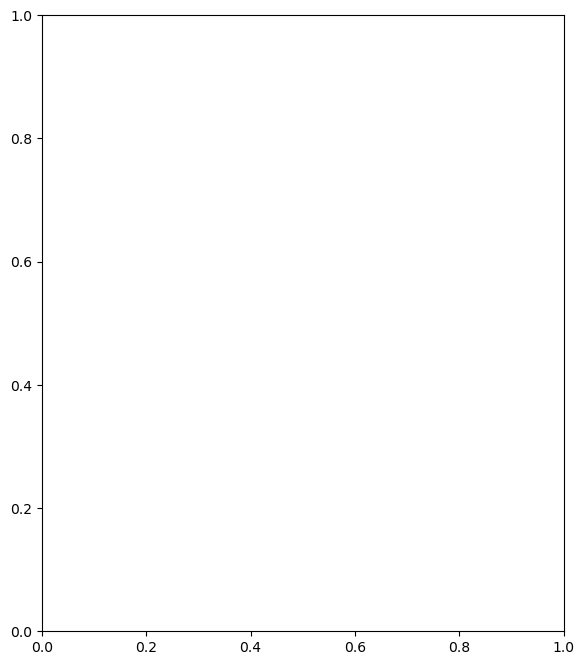

In [188]:
 import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the Excel file and extract unique event names
excel_file = '/Users/coolkarni/Desktop/OneDrive - The University of Melbourne/R1_99_New Events.xlsx'
unique_events_df = pd.read_excel(excel_file, sheet_name='Sheet2')  # Adjust if needed
unique_events = unique_events_df['Event'].dropna().unique()


# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')

# Define paths
data_dir = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/'
output_dir = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Map_KDE_4Plots/'

coastal_events = []

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define a minimum threshold for KDE values
kde_threshold = 1e-4

# Define the longitude range for coastal events
min_longitude = 149.139404
max_longitude = 152.819824

for event_name in unique_events:
    try:
        # Construct the CSV file path for the event
        csv_file = os.path.join(data_dir, f"{event_name}.csv")
        
        # Load the CSV file
        df = pd.read_csv(csv_file)

        # Filter out NaN values in latitude and longitude
        x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

        # Get the bounds of the polygons
        minx, miny, maxx, maxy = polygons_data.total_bounds

        # Create a grid of points within the bounds
        xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

        # Flatten the grid to pass into the KDE function
        positions = np.vstack([xi.ravel(), yi.ravel()])

        # Sum up the rainfall values for the 7 days
        x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

        # Perform Gaussian KDE on the accumulated rainfall data
        values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
        rainfall = x_cleaned['7_day_accumulated_rainfall']
        kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
        zi = kde(positions).reshape(xi.shape)

        # Mask the grid to include only points inside the polygons geometry
        points = np.vstack((xi.flatten(), yi.flatten())).T
        mask = np.array([polygons_data.contains(Point(point)).any() for point in points])
        mask = mask.reshape(xi.shape)
        zi = np.where(mask, zi, np.nan)

        # Plot the polygons map
        fig, ax = plt.subplots(figsize=(10, 8))
        polygons_data.plot(ax=ax, color='grey', edgecolor='none')
        linestrings_data.plot(ax=ax, color='black', linewidth=2)

        # List to store daily mean rainfall, retained centroids, and retained days
        daily_means = []
        centroids = []
        retained_days = []

        # Perform KDE for each day and calculate centroids based on threshold
        rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
        colors = sns.color_palette("husl", len(rainfall_columns))

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_rainfall.mean()
            daily_means.append(daily_mean_rainfall)
            print(f"{event_name} - Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

        # Calculate the median of the daily mean rainfall
        median_threshold = np.median(daily_means)
        print(f"{event_name} - Median Threshold: {median_threshold:.2f} mm")

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_means[i]

            # Check if the daily mean exceeds the median threshold
            if daily_mean_rainfall >= median_threshold:
                daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
                daily_zi = daily_kde(positions).reshape(xi.shape)
                daily_zi = np.where(mask, daily_zi, np.nan)

                # Apply the threshold to filter out negligible KDE values
                daily_zi = np.where(daily_zi >= kde_threshold, daily_zi, np.nan)

                daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

                # Calculate the centroid of the contour area
                if daily_contour.collections:
                    paths = [c.get_paths() for c in daily_contour.collections]
                    for path in paths:
                        for p in path:
                            centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                            centroids.append(centroid)
                            retained_days.append(i)
                for c in daily_contour.collections:
                    c.remove()  # Remove the contour lines

        # Plot the retained centroids and connect them sequentially
        if centroids:
            centroids = np.array(centroids)
            for j in range(len(centroids)):
                ax.plot(centroids[j, 0], centroids[j, 1], marker='o', markersize='8', color='red', linestyle='')
                # Annotate the centroids with their respective day
                ax.annotate(f'{retained_days[j] + 1}', (centroids[j, 0], centroids[j, 1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='black')
                # Print the coordinates of the centroid
                print(f"Centroid {j+1} for {event_name}: (Longitude: {centroids[j, 0]}, Latitude: {centroids[j, 1]})")
                # Connect centroids of consecutive days
                if j > 0 and retained_days[j] == retained_days[j - 1] + 1:
                    ax.plot(centroids[[j - 1, j], 0], centroids[[j - 1, j], 1], color='red', linestyle='-', linewidth=1.5)

        # Check if all centroids fall within the specified longitude range
        if centroids.size > 0:
            all_within_range = all(min_longitude <= centroid[0] <= max_longitude for centroid in centroids)
            if all_within_range:
                coastal_events.append(event_name)
                print(f"{event_name} - Coastal Town Event")

        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_title(f'{event_name}')
        
        # Save the plot
        plt.savefig(os.path.join(output_dir, f"{event_name}.png"))
        plt.close(fig)  # Close the figure to save memory

    except Exception as e:
        print(f"Error processing {event_name}: {e}")

# Print all coastal event filenames
if coastal_events:
    print("Coastal Events Detected:", coastal_events)


In [2]:
 import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Load the Excel file and extract unique event names
excel_file = '/Users/coolkarni/Desktop/OneDrive - The University of Melbourne/R1_99_New Events.xlsx'
unique_events_df = pd.read_excel(excel_file, sheet_name='Sheet2')  # Adjust if needed
unique_events = unique_events_df['Event'].dropna().unique()


# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')

# Define paths
data_dir = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/'
output_dir = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Map_KDE_3Plots/'

coastal_events = []

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define a minimum threshold for KDE values
kde_threshold = 1e-4

# Define the longitude range for coastal events
min_longitude = 149.139404
max_longitude = 152.819824

for event_name in unique_events:
    try:
        # Construct the CSV file path for the event
        csv_file = os.path.join(data_dir, f"{event_name}.csv")
        
        # Load the CSV file
        df = pd.read_csv(csv_file)

        # Filter out NaN values in latitude and longitude
        x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

        # Get the bounds of the polygons
        minx, miny, maxx, maxy = polygons_data.total_bounds

        # Create a grid of points within the bounds
        xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

        # Flatten the grid to pass into the KDE function
        positions = np.vstack([xi.ravel(), yi.ravel()])

        # Sum up the rainfall values for the 7 days
        x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

        # Perform Gaussian KDE on the accumulated rainfall data
        values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
        rainfall = x_cleaned['7_day_accumulated_rainfall']
        kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
        zi = kde(positions).reshape(xi.shape)

        # Mask the grid to include only points inside the polygons geometry
        points = np.vstack((xi.flatten(), yi.flatten())).T
        mask = np.array([polygons_data.contains(Point(point)).any() for point in points])
        mask = mask.reshape(xi.shape)
        zi = np.where(mask, zi, np.nan)

        # Plot the polygons map
        fig, ax = plt.subplots(figsize=(10, 8))
       
        # List to store daily mean rainfall, retained centroids, and retained days
        daily_means = []
        centroids = []
        retained_days = []

        # Perform KDE for each day and calculate centroids based on threshold
        rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
        colors = sns.color_palette("husl", len(rainfall_columns))

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_rainfall.mean()
            daily_means.append(daily_mean_rainfall)
            print(f"{event_name} - Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

        # Calculate the median of the daily mean rainfall
        median_threshold = np.median(daily_means)
        print(f"{event_name} - Median Threshold: {median_threshold:.2f} mm")

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_means[i]

            # Check if the daily mean exceeds the median threshold
            if daily_mean_rainfall >= median_threshold:
                daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
                daily_zi = daily_kde(positions).reshape(xi.shape)
                daily_zi = np.where(mask, daily_zi, np.nan)

                # Apply the threshold to filter out negligible KDE values
                daily_zi = np.where(daily_zi >= kde_threshold, daily_zi, np.nan)

                daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

                # Calculate the centroid of the contour area
                if daily_contour.collections:
                    paths = [c.get_paths() for c in daily_contour.collections]
                    for path in paths:
                        for p in path:
                            centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                            centroids.append(centroid)
                            retained_days.append(i)
                for c in daily_contour.collections:
                    c.remove()  # Remove the contour lines

        # Plot the retained centroids and connect them sequentially
        if centroids:
            centroids = np.array(centroids)
            for j in range(len(centroids)):
                ax.plot(centroids[j, 0], centroids[j, 1], marker='o', markersize='8', color='red', linestyle='')
                # Annotate the centroids with their respective day
                ax.annotate(f'{retained_days[j] + 1}', (centroids[j, 0], centroids[j, 1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='black')
                # Print the coordinates of the centroid
                print(f"Centroid {j+1} for {event_name}: (Longitude: {centroids[j, 0]}, Latitude: {centroids[j, 1]})")
                # Connect centroids of consecutive days
                if j > 0 and retained_days[j] == retained_days[j - 1] + 1:
                    ax.plot(centroids[[j - 1, j], 0], centroids[[j - 1, j], 1], color='red', linestyle='-', linewidth=1.5)

        # Check if all centroids fall within the specified longitude range
        if centroids.size > 0:
            all_within_range = all(min_longitude <= centroid[0] <= max_longitude for centroid in centroids)
            if all_within_range:
                coastal_events.append(event_name)
                print(f"{event_name} - Coastal Town Event")

       
        
        # Save the plot
        plt.savefig(os.path.join(output_dir, f"{event_name}.png"))
        plt.close(fig)  # Close the figure to save memory

    except Exception as e:
        print(f"Error processing {event_name}: {e}")

# Print all coastal event filenames
if coastal_events:
    print("Coastal Events Detected:", coastal_events)


Event 1 - 1889-07-14 to 1889-07-20 - Day 1 Mean Rainfall: 0.41 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 2 Mean Rainfall: 0.99 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 3 Mean Rainfall: 3.29 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 4 Mean Rainfall: 6.10 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 5 Mean Rainfall: 4.93 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 6 Mean Rainfall: 4.12 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 7 Mean Rainfall: 1.69 mm
Event 1 - 1889-07-14 to 1889-07-20 - Median Threshold: 3.29 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 1 - 1889-07-14 to 1889-07-20: (Longitude: 148.87855027896802, Latitude: -29.661731441415547)
Centroid 2 for Event 1 - 1889-07-14 to 1889-07-20: (Longitude: 149.3137634034076, Latitude: -29.643682776135787)
Centroid 3 for Event 1 - 1889-07-14 to 1889-07-20: (Longitude: 152.0868298524472, Latitude: -29.349098793014445)
Centroid 4 for Event 1 - 1889-07-14 to 1889-07-20: (Longitude: 152.55916487520014, Latitude: -29.75337091463053)
Event 2 - 1890-01-10 to 1890-01-16 - Day 1 Mean Rainfall: 1.65 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 2 Mean Rainfall: 6.17 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 3 Mean Rainfall: 13.79 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 4 Mean Rainfall: 14.87 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 5 Mean Rainfall: 6.70 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 6 Mean Rainfall: 7.47 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 7 Mean Rainfall: 5.57 mm
Event 2 - 1890-01-10 to 1890-01-16 - Median Threshold: 6.70 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 2 - 1890-01-10 to 1890-01-16: (Longitude: 147.10577129809616, Latitude: -30.467241424339157)
Centroid 2 for Event 2 - 1890-01-10 to 1890-01-16: (Longitude: 149.98743389728202, Latitude: -30.8884408693467)
Centroid 3 for Event 2 - 1890-01-10 to 1890-01-16: (Longitude: 150.9087629829969, Latitude: -29.893669772697862)
Centroid 4 for Event 2 - 1890-01-10 to 1890-01-16: (Longitude: 150.59228323967193, Latitude: -30.959344308764194)
Event 3 - 1890-01-29 to 1890-02-04 - Day 1 Mean Rainfall: 0.28 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 2 Mean Rainfall: 2.06 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 3 Mean Rainfall: 3.10 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 4 Mean Rainfall: 6.23 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 5 Mean Rainfall: 7.15 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 6 Mean Rainfall: 7.44 mm
Event 3 - 1890-01-29 to 1890-02-04 - Day 7 Mean Rainfall: 2.64 mm
Event 3 - 1890-01-29 to 1890-02-04 - Median Threshold: 3.10 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 3 - 1890-01-29 to 1890-02-04: (Longitude: 150.21274083133326, Latitude: -34.4030133441142)
Centroid 2 for Event 3 - 1890-01-29 to 1890-02-04: (Longitude: 151.0733446218701, Latitude: -32.35297813511448)
Centroid 3 for Event 3 - 1890-01-29 to 1890-02-04: (Longitude: 151.34607008525444, Latitude: -31.434159204336332)
Centroid 4 for Event 3 - 1890-01-29 to 1890-02-04: (Longitude: 150.2709801197677, Latitude: -33.79417331205035)
Event 3 - 1890-01-29 to 1890-02-04 - Coastal Town Event
Event 4 - 1890-03-04 to 1890-03-10 - Day 1 Mean Rainfall: 4.14 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 2 Mean Rainfall: 2.66 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 3 Mean Rainfall: 3.37 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 4 Mean Rainfall: 3.84 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 5 Mean Rainfall: 5.24 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 6 Mean Rainfall: 7.47 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 7 Mean Rainfall: 7.66 mm
Event 4 - 1890-03-04 to 1890-03-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 4 - 1890-03-04 to 1890-03-10: (Longitude: 150.01413293312393, Latitude: -33.02078660469203)
Centroid 2 for Event 4 - 1890-03-04 to 1890-03-10: (Longitude: 152.06175025038377, Latitude: -29.62787954674579)
Centroid 3 for Event 4 - 1890-03-04 to 1890-03-10: (Longitude: 148.38824219772272, Latitude: -30.426359949249605)
Centroid 4 for Event 4 - 1890-03-04 to 1890-03-10: (Longitude: 150.82045936123941, Latitude: -31.681237349131877)
Event 5 - 1891-01-11 to 1891-01-17 - Day 1 Mean Rainfall: 10.01 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 2 Mean Rainfall: 2.76 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 3 Mean Rainfall: 3.79 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 4 Mean Rainfall: 7.49 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 5 Mean Rainfall: 7.76 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 6 Mean Rainfall: 21.72 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 7 Mean Rainfall: 39.22 mm
Event 5 - 1891-01-11 to 1891-01-17 - Median Threshold: 7.76 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 5 - 1891-01-11 to 1891-01-17: (Longitude: 150.792445710952, Latitude: -31.27597709800346)
Centroid 2 for Event 5 - 1891-01-11 to 1891-01-17: (Longitude: 148.7502065674487, Latitude: -29.508361432369686)
Centroid 3 for Event 5 - 1891-01-11 to 1891-01-17: (Longitude: 146.79964252151714, Latitude: -30.673248170932457)
Centroid 4 for Event 5 - 1891-01-11 to 1891-01-17: (Longitude: 147.73900821238118, Latitude: -33.44327322261332)
Event 6 - 1891-06-04 to 1891-06-10 - Day 1 Mean Rainfall: 0.06 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 2 Mean Rainfall: 0.14 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 3 Mean Rainfall: 0.50 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 4 Mean Rainfall: 2.65 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 5 Mean Rainfall: 7.90 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 6 Mean Rainfall: 9.66 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 7 Mean Rainfall: 5.90 mm
Event 6 - 1891-06-04 to 1891-06-10 - Median Threshold: 2.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 6 - 1891-06-04 to 1891-06-10: (Longitude: 147.11992662673427, Latitude: -29.704675910203)
Centroid 2 for Event 6 - 1891-06-04 to 1891-06-10: (Longitude: 148.37385747242672, Latitude: -29.879001574846363)
Centroid 3 for Event 6 - 1891-06-04 to 1891-06-10: (Longitude: 151.76009813046113, Latitude: -29.75604015618154)
Centroid 4 for Event 6 - 1891-06-04 to 1891-06-10: (Longitude: 150.6362551941674, Latitude: -33.39653872402904)
Event 7 - 1892-03-10 to 1892-03-16 - Day 1 Mean Rainfall: 0.21 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 2 Mean Rainfall: 1.15 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 3 Mean Rainfall: 3.01 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 4 Mean Rainfall: 7.52 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 5 Mean Rainfall: 6.58 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 6 Mean Rainfall: 1.76 mm
Event 7 - 1892-03-10 to 1892-03-16 - Day 7 Mean Rainfall: 3.10 mm
Event 7 - 1892-03-10 to 1892-03-16 - Median Threshold: 3.01 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 7 - 1892-03-10 to 1892-03-16: (Longitude: 150.54871250959366, Latitude: -32.7115080702315)
Centroid 2 for Event 7 - 1892-03-10 to 1892-03-16: (Longitude: 151.1025249529568, Latitude: -31.193254369533616)
Centroid 3 for Event 7 - 1892-03-10 to 1892-03-16: (Longitude: 152.25686215045368, Latitude: -29.695578686910917)
Centroid 4 for Event 7 - 1892-03-10 to 1892-03-16: (Longitude: 149.51569415478605, Latitude: -35.122197076175794)
Event 7 - 1892-03-10 to 1892-03-16 - Coastal Town Event
Event 8 - 1892-03-15 to 1892-03-21 - Day 1 Mean Rainfall: 2.00 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 2 Mean Rainfall: 3.11 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 3 Mean Rainfall: 2.58 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 4 Mean Rainfall: 5.49 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 5 Mean Rainfall: 6.73 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 6 Mean Rainfall: 4.28 mm
Event 8 - 1892-03-15 to 1892-03-21 - Day 7 Mean Rainfall: 0.95 mm
Event 8 - 1892-03-15 to 1892-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 8 - 1892-03-15 to 1892-03-21: (Longitude: 149.51590827015156, Latitude: -35.119427101621696)
Centroid 2 for Event 8 - 1892-03-15 to 1892-03-21: (Longitude: 150.59618057834658, Latitude: -33.373496495995354)
Centroid 3 for Event 8 - 1892-03-15 to 1892-03-21: (Longitude: 150.59036279161748, Latitude: -33.43371624086757)
Centroid 4 for Event 8 - 1892-03-15 to 1892-03-21: (Longitude: 150.8021517741872, Latitude: -33.62168476263753)
Event 8 - 1892-03-15 to 1892-03-21 - Coastal Town Event
Event 9 - 1892-03-30 to 1892-04-05 - Day 1 Mean Rainfall: 0.41 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 2 Mean Rainfall: 3.23 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 3 Mean Rainfall: 5.91 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 4 Mean Rainfall: 5.03 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 5 Mean Rainfall: 4.33 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 6 Mean Rainfall: 2.29 mm
Event 9 - 1892-03-30 to 1892-04-05 - Day 7 Mean Rainfall: 4.64 mm
Event 9 - 1892-03-30 to 1892-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 9 - 1892-03-30 to 1892-04-05: (Longitude: 150.6925311127299, Latitude: -33.93647112286147)
Centroid 2 for Event 9 - 1892-03-30 to 1892-04-05: (Longitude: 152.7612109059006, Latitude: -29.66785396753621)
Centroid 3 for Event 9 - 1892-03-30 to 1892-04-05: (Longitude: 152.75884326201978, Latitude: -29.740395225242143)
Centroid 4 for Event 9 - 1892-03-30 to 1892-04-05: (Longitude: 150.28723743060567, Latitude: -33.541741463813786)
Event 9 - 1892-03-30 to 1892-04-05 - Coastal Town Event
Event 10 - 1892-04-17 to 1892-04-23 - Day 1 Mean Rainfall: 0.02 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 2 Mean Rainfall: 0.23 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 3 Mean Rainfall: 0.86 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 4 Mean Rainfall: 3.14 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 5 Mean Rainfall: 7.04 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 6 Mean Rainfall: 6.00 mm
Event 10 - 1892-04-17 to 1892-04-23 - Day 7 Mean Rainfall: 0.19 mm
Event 10 - 1892-04-17 t

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 10 - 1892-04-17 to 1892-04-23: (Longitude: 149.362037361803, Latitude: -32.34451750755645)
Centroid 2 for Event 10 - 1892-04-17 to 1892-04-23: (Longitude: 151.25410993828518, Latitude: -29.46613629903632)
Centroid 3 for Event 10 - 1892-04-17 to 1892-04-23: (Longitude: 151.35785166167304, Latitude: -30.193685955471018)
Centroid 4 for Event 10 - 1892-04-17 to 1892-04-23: (Longitude: 150.12960193847107, Latitude: -33.29574876779628)
Event 10 - 1892-04-17 to 1892-04-23 - Coastal Town Event
Event 11 - 1892-10-24 to 1892-10-30 - Day 1 Mean Rainfall: 1.81 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 2 Mean Rainfall: 3.70 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 3 Mean Rainfall: 9.59 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 4 Mean Rainfall: 12.14 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 5 Mean Rainfall: 10.10 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 6 Mean Rainfall: 1.47 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 7 Mean Rainfall: 0.30 mm
Event 11 - 1892-1

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 11 - 1892-10-24 to 1892-10-30: (Longitude: 147.09853883202078, Latitude: -29.158125516735552)
Centroid 2 for Event 11 - 1892-10-24 to 1892-10-30: (Longitude: 149.1859626477039, Latitude: -29.97921663047589)
Centroid 3 for Event 11 - 1892-10-24 to 1892-10-30: (Longitude: 150.30351501578886, Latitude: -31.31659554282528)
Centroid 4 for Event 11 - 1892-10-24 to 1892-10-30: (Longitude: 149.45324745672454, Latitude: -32.33452748902243)
Event 12 - 1893-01-18 to 1893-01-24 - Day 1 Mean Rainfall: 3.67 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 2 Mean Rainfall: 3.03 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 3 Mean Rainfall: 0.54 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 4 Mean Rainfall: 2.15 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 5 Mean Rainfall: 7.08 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 6 Mean Rainfall: 18.25 mm
Event 12 - 1893-01-18 to 1893-01-24 - Day 7 Mean Rainfall: 0.44 mm
Event 12 - 1893-01-18 to 1893-01-24 - Median Threshold: 3.03 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 12 - 1893-01-18 to 1893-01-24: (Longitude: 149.14838047112303, Latitude: -35.18681817693616)
Centroid 2 for Event 12 - 1893-01-18 to 1893-01-24: (Longitude: 150.68168076487163, Latitude: -33.49131072245895)
Centroid 3 for Event 12 - 1893-01-18 to 1893-01-24: (Longitude: 152.18698829570516, Latitude: -29.597192130317378)
Centroid 4 for Event 12 - 1893-01-18 to 1893-01-24: (Longitude: 150.3602502309269, Latitude: -33.79469315696341)
Event 12 - 1893-01-18 to 1893-01-24 - Coastal Town Event
Event 13 - 1893-02-07 to 1893-02-13 - Day 1 Mean Rainfall: 1.87 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 2 Mean Rainfall: 1.47 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 3 Mean Rainfall: 0.34 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 4 Mean Rainfall: 0.92 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 5 Mean Rainfall: 3.02 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 6 Mean Rainfall: 7.22 mm
Event 13 - 1893-02-07 to 1893-02-13 - Day 7 Mean Rainfall: 7.76 mm
Event 13 - 1893-02

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 13 - 1893-02-07 to 1893-02-13: (Longitude: 150.9151168493857, Latitude: -31.384336627273143)
Centroid 2 for Event 13 - 1893-02-07 to 1893-02-13: (Longitude: 152.75724116231675, Latitude: -29.11454216637075)
Centroid 3 for Event 13 - 1893-02-07 to 1893-02-13: (Longitude: 152.29383074513945, Latitude: -30.401202055957224)
Centroid 4 for Event 13 - 1893-02-07 to 1893-02-13: (Longitude: 151.01291481710373, Latitude: -31.669276991065875)
Event 13 - 1893-02-07 to 1893-02-13 - Coastal Town Event
Event 14 - 1893-02-13 to 1893-02-19 - Day 1 Mean Rainfall: 7.77 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 2 Mean Rainfall: 0.80 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 3 Mean Rainfall: 0.63 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 4 Mean Rainfall: 1.83 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 5 Mean Rainfall: 3.07 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 6 Mean Rainfall: 7.74 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 7 Mean Rainfall: 6.54 mm
Event 14 - 1893-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 14 - 1893-02-13 to 1893-02-19: (Longitude: 151.01291481710373, Latitude: -31.669276991065868)
Centroid 2 for Event 14 - 1893-02-13 to 1893-02-19: (Longitude: 152.86474984894335, Latitude: -28.668039960555618)
Centroid 3 for Event 14 - 1893-02-13 to 1893-02-19: (Longitude: 152.03090823722286, Latitude: -29.70575121945918)
Centroid 4 for Event 14 - 1893-02-13 to 1893-02-19: (Longitude: 149.5801787623789, Latitude: -33.66991150214166)
Event 15 - 1894-01-25 to 1894-01-31 - Day 1 Mean Rainfall: 7.85 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 2 Mean Rainfall: 9.55 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 3 Mean Rainfall: 10.82 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 4 Mean Rainfall: 7.06 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 5 Mean Rainfall: 4.54 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 6 Mean Rainfall: 3.84 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 7 Mean Rainfall: 2.41 mm
Event 15 - 1894-01-25 to 1894-01-31 - Median Threshold: 7.06 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 15 - 1894-01-25 to 1894-01-31: (Longitude: 147.84914383691697, Latitude: -32.74148903862743)
Centroid 2 for Event 15 - 1894-01-25 to 1894-01-31: (Longitude: 146.5131456485019, Latitude: -34.17585969190551)
Centroid 3 for Event 15 - 1894-01-25 to 1894-01-31: (Longitude: 148.13420297043882, Latitude: -34.174793413832376)
Centroid 4 for Event 15 - 1894-01-25 to 1894-01-31: (Longitude: 147.37821829632375, Latitude: -33.28254295770911)
Event 16 - 1894-02-01 to 1894-02-07 - Day 1 Mean Rainfall: 1.07 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 2 Mean Rainfall: 0.23 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 3 Mean Rainfall: 0.49 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 4 Mean Rainfall: 1.39 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 5 Mean Rainfall: 0.22 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 6 Mean Rainfall: 0.51 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 7 Mean Rainfall: 4.50 mm
Event 16 - 1894-02-01 to 1894-02-07 - Median Threshold: 0.51 mm
Centroid 1 

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 17 - 1894-03-11 to 1894-03-17 - Day 1 Mean Rainfall: 6.72 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 2 Mean Rainfall: 8.59 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 3 Mean Rainfall: 7.01 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 4 Mean Rainfall: 3.62 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 5 Mean Rainfall: 2.51 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 6 Mean Rainfall: 0.14 mm
Event 17 - 1894-03-11 to 1894-03-17 - Day 7 Mean Rainfall: 0.54 mm
Event 17 - 1894-03-11 to 1894-03-17 - Median Threshold: 3.62 mm
Centroid 1 for Event 17 - 1894-03-11 to 1894-03-17: (Longitude: 150.39334534873979, Latitude: -31.842036906485035)
Centroid 2 for Event 17 - 1894-03-11 to 1894-03-17: (Longitude: 150.40476234277386, Latitude: -33.49211813095195)
Centroid 3 for Event 17 - 1894-03-11 to 1894-03-17: (Longitude: 150.01656370175698, Latitude: -34.02116840642543)
Centroid 4 for Event 17 - 1894-03-11 to 1894-03-17: (Longitude: 152.4614073602249, Latitude: -29.595672294628287)
Event 17 -

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 18 - 1895-01-28 to 1895-02-03 - Day 1 Mean Rainfall: 6.21 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 2 Mean Rainfall: 1.56 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 3 Mean Rainfall: 1.14 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 4 Mean Rainfall: 3.20 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 5 Mean Rainfall: 3.28 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 6 Mean Rainfall: 1.49 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 7 Mean Rainfall: 0.90 mm
Event 18 - 1895-01-28 to 1895-02-03 - Median Threshold: 1.56 mm
Centroid 1 for Event 18 - 1895-01-28 to 1895-02-03: (Longitude: 150.274620978371, Latitude: -30.0795728422836)
Centroid 2 for Event 18 - 1895-01-28 to 1895-02-03: (Longitude: 151.0214870813492, Latitude: -31.412553038966724)
Centroid 3 for Event 18 - 1895-01-28 to 1895-02-03: (Longitude: 152.82464522815656, Latitude: -29.672016354867978)
Centroid 4 for Event 18 - 1895-01-28 to 1895-02-03: (Longitude: 152.41989612293847, Latitude: -30.544374187830687)


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 19 - 1896-10-30 to 1896-11-05 - Day 1 Mean Rainfall: 1.23 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 2 Mean Rainfall: 4.42 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 3 Mean Rainfall: 1.68 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 4 Mean Rainfall: 6.00 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 5 Mean Rainfall: 8.60 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 6 Mean Rainfall: 3.50 mm
Event 19 - 1896-10-30 to 1896-11-05 - Day 7 Mean Rainfall: 0.51 mm
Event 19 - 1896-10-30 to 1896-11-05 - Median Threshold: 3.50 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 19 - 1896-10-30 to 1896-11-05: (Longitude: 150.5804001690525, Latitude: -31.894111334127064)
Centroid 2 for Event 19 - 1896-10-30 to 1896-11-05: (Longitude: 150.69863254013018, Latitude: -30.539500596861135)
Centroid 3 for Event 19 - 1896-10-30 to 1896-11-05: (Longitude: 151.53621965594488, Latitude: -29.721690797887756)
Centroid 4 for Event 19 - 1896-10-30 to 1896-11-05: (Longitude: 152.517779638421, Latitude: -29.576587078110006)
Event 19 - 1896-10-30 to 1896-11-05 - Coastal Town Event
Event 20 - 1897-02-26 to 1897-03-04 - Day 1 Mean Rainfall: 0.07 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 2 Mean Rainfall: 0.29 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 3 Mean Rainfall: 3.56 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 4 Mean Rainfall: 8.59 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 5 Mean Rainfall: 9.55 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 6 Mean Rainfall: 1.57 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 7 Mean Rainfall: 0.72 mm
Event 20 - 1897-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 20 - 1897-02-26 to 1897-03-04: (Longitude: 145.47677188888224, Latitude: -30.516385578737392)
Centroid 2 for Event 20 - 1897-02-26 to 1897-03-04: (Longitude: 148.8084505146769, Latitude: -29.67266619777504)
Centroid 3 for Event 20 - 1897-02-26 to 1897-03-04: (Longitude: 150.72087386065667, Latitude: -31.144914846574224)
Centroid 4 for Event 20 - 1897-02-26 to 1897-03-04: (Longitude: 150.84616246200042, Latitude: -32.41414225571734)
Event 21 - 1897-07-22 to 1897-07-28 - Day 1 Mean Rainfall: 0.16 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 2 Mean Rainfall: 0.97 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 3 Mean Rainfall: 9.45 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 4 Mean Rainfall: 17.07 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 5 Mean Rainfall: 21.98 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 6 Mean Rainfall: 2.62 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 7 Mean Rainfall: 0.06 mm
Event 21 - 1897-07-22 to 1897-07-28 - Median Threshold: 2.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 21 - 1897-07-22 to 1897-07-28: (Longitude: 148.54319190208025, Latitude: -32.15892595688321)
Centroid 2 for Event 21 - 1897-07-22 to 1897-07-28: (Longitude: 149.22575932498387, Latitude: -31.721365412319756)
Centroid 3 for Event 21 - 1897-07-22 to 1897-07-28: (Longitude: 150.25329723837524, Latitude: -31.848646830317858)
Centroid 4 for Event 21 - 1897-07-22 to 1897-07-28: (Longitude: 150.7287230247372, Latitude: -33.00323651861403)
Event 22 - 1898-03-04 to 1898-03-10 - Day 1 Mean Rainfall: 0.57 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 2 Mean Rainfall: 0.53 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 3 Mean Rainfall: 0.88 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 4 Mean Rainfall: 1.82 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 5 Mean Rainfall: 1.87 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 6 Mean Rainfall: 1.02 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 7 Mean Rainfall: 0.17 mm
Event 22 - 1898-03-04 to 1898-03-10 - Median Threshold: 0.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 22 - 1898-03-04 to 1898-03-10: (Longitude: 151.8261168168441, Latitude: -29.42731539892831)
Centroid 2 for Event 22 - 1898-03-04 to 1898-03-10: (Longitude: 152.96442512078403, Latitude: -28.952509821755438)
Centroid 3 for Event 22 - 1898-03-04 to 1898-03-10: (Longitude: 152.97635955452995, Latitude: -29.354706917389045)
Centroid 4 for Event 22 - 1898-03-04 to 1898-03-10: (Longitude: 152.8794325720833, Latitude: -29.99139644590539)
Event 23 - 1899-07-06 to 1899-07-12 - Day 1 Mean Rainfall: 0.39 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 2 Mean Rainfall: 0.25 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 3 Mean Rainfall: 1.30 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 4 Mean Rainfall: 5.81 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 5 Mean Rainfall: 17.60 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 6 Mean Rainfall: 11.57 mm
Event 23 - 1899-07-06 to 1899-07-12 - Day 7 Mean Rainfall: 2.87 mm
Event 23 - 1899-07-06 to 1899-07-12 - Median Threshold: 2.87 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 23 - 1899-07-06 to 1899-07-12: (Longitude: 149.7831949186073, Latitude: -31.016514244228393)
Centroid 2 for Event 23 - 1899-07-06 to 1899-07-12: (Longitude: 149.79889997848528, Latitude: -31.27049097674078)
Centroid 3 for Event 23 - 1899-07-06 to 1899-07-12: (Longitude: 151.03313875357665, Latitude: -32.01683103635295)
Centroid 4 for Event 23 - 1899-07-06 to 1899-07-12: (Longitude: 152.29426600586808, Latitude: -30.926034603969512)
Event 23 - 1899-07-06 to 1899-07-12 - Coastal Town Event
Event 24 - 1891-06-22 to 1891-06-28 - Day 1 Mean Rainfall: 12.25 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 2 Mean Rainfall: 4.70 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 3 Mean Rainfall: 5.90 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 4 Mean Rainfall: 8.66 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 5 Mean Rainfall: 6.94 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 6 Mean Rainfall: 8.15 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 7 Mean Rainfall: 2.89 mm
Event 24 - 1891-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 24 - 1891-06-22 to 1891-06-28: (Longitude: 150.51131569528246, Latitude: -33.28031865259386)
Centroid 2 for Event 24 - 1891-06-22 to 1891-06-28: (Longitude: 150.38225862410727, Latitude: -33.643281864285015)
Centroid 3 for Event 24 - 1891-06-22 to 1891-06-28: (Longitude: 148.81466364679864, Latitude: -35.189883829559115)
Centroid 4 for Event 24 - 1891-06-22 to 1891-06-28: (Longitude: 149.74562546273137, Latitude: -34.85719094002849)
Event 25 - 1892-03-02 to 1892-03-08 - Day 1 Mean Rainfall: 0.82 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 2 Mean Rainfall: 0.17 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 3 Mean Rainfall: 0.60 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 4 Mean Rainfall: 7.40 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 5 Mean Rainfall: 2.36 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 6 Mean Rainfall: 0.98 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 7 Mean Rainfall: 0.07 mm
Event 25 - 1892-03-02 to 1892-03-08 - Median Threshold: 0.82 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 25 - 1892-03-02 to 1892-03-08: (Longitude: 152.7188404703488, Latitude: -29.397855235118815)
Centroid 2 for Event 25 - 1892-03-02 to 1892-03-08: (Longitude: 150.62672745260147, Latitude: -33.81858192183149)
Centroid 3 for Event 25 - 1892-03-02 to 1892-03-08: (Longitude: 147.6322324524258, Latitude: -34.50405137894253)
Centroid 4 for Event 25 - 1892-03-02 to 1892-03-08: (Longitude: 150.23040861546144, Latitude: -33.93441169153482)
Event 26 - 1892-10-14 to 1892-10-20 - Day 1 Mean Rainfall: 12.63 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 2 Mean Rainfall: 2.42 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 3 Mean Rainfall: 5.01 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 4 Mean Rainfall: 20.44 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 5 Mean Rainfall: 5.02 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 6 Mean Rainfall: 0.53 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 7 Mean Rainfall: 0.25 mm
Event 26 - 1892-10-14 to 1892-10-20 - Median Threshold: 5.01 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 26 - 1892-10-14 to 1892-10-20: (Longitude: 150.2847316416303, Latitude: -31.605122697292018)
Centroid 2 for Event 26 - 1892-10-14 to 1892-10-20: (Longitude: 146.31404527215858, Latitude: -31.821418194193534)
Centroid 3 for Event 26 - 1892-10-14 to 1892-10-20: (Longitude: 148.64446804789978, Latitude: -34.39734618159775)
Centroid 4 for Event 26 - 1892-10-14 to 1892-10-20: (Longitude: 148.84439810798133, Latitude: -35.5336722464994)
Event 27 - 1893-03-02 to 1893-03-08 - Day 1 Mean Rainfall: 3.36 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 2 Mean Rainfall: 5.03 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 3 Mean Rainfall: 1.59 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 4 Mean Rainfall: 7.21 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 5 Mean Rainfall: 12.72 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 6 Mean Rainfall: 1.49 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 7 Mean Rainfall: 7.62 mm
Event 27 - 1893-03-02 to 1893-03-08 - Median Threshold: 5.03 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 27 - 1893-03-02 to 1893-03-08: (Longitude: 149.66315022842738, Latitude: -30.80163580344423)
Centroid 2 for Event 27 - 1893-03-02 to 1893-03-08: (Longitude: 148.63266109405066, Latitude: -34.58883492784609)
Centroid 3 for Event 27 - 1893-03-02 to 1893-03-08: (Longitude: 149.26025036842805, Latitude: -34.370417512630794)
Centroid 4 for Event 27 - 1893-03-02 to 1893-03-08: (Longitude: 150.57187870712463, Latitude: -33.61046033767881)
Event 28 - 1894-03-04 to 1894-03-10 - Day 1 Mean Rainfall: 3.15 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 2 Mean Rainfall: 4.31 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 3 Mean Rainfall: 7.68 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 4 Mean Rainfall: 13.07 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 5 Mean Rainfall: 4.65 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 6 Mean Rainfall: 2.92 mm
Event 28 - 1894-03-04 to 1894-03-10 - Day 7 Mean Rainfall: 5.63 mm
Event 28 - 1894-03-04 to 1894-03-10 - Median Threshold: 4.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 28 - 1894-03-04 to 1894-03-10: (Longitude: 150.74802379781244, Latitude: -32.01840187517899)
Centroid 2 for Event 28 - 1894-03-04 to 1894-03-10: (Longitude: 150.51511130986253, Latitude: -33.47550731851244)
Centroid 3 for Event 28 - 1894-03-04 to 1894-03-10: (Longitude: 150.51323333490757, Latitude: -31.142149277958655)
Centroid 4 for Event 28 - 1894-03-04 to 1894-03-10: (Longitude: 150.38875335582895, Latitude: -30.483786355823952)
Event 28 - 1894-03-04 to 1894-03-10 - Coastal Town Event
Event 29 - 1894-03-17 to 1894-03-23 - Day 1 Mean Rainfall: 0.54 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 2 Mean Rainfall: 2.57 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 3 Mean Rainfall: 11.93 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 4 Mean Rainfall: 18.89 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 5 Mean Rainfall: 12.13 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 6 Mean Rainfall: 14.12 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 7 Mean Rainfall: 1.78 mm
Event 29 - 1

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 29 - 1894-03-17 to 1894-03-23: (Longitude: 147.9911202592835, Latitude: -32.76214002581337)
Centroid 2 for Event 29 - 1894-03-17 to 1894-03-23: (Longitude: 150.2260386501648, Latitude: -33.88168181827261)
Centroid 3 for Event 29 - 1894-03-17 to 1894-03-23: (Longitude: 145.09653016491242, Latitude: -34.16186006786074)
Centroid 4 for Event 29 - 1894-03-17 to 1894-03-23: (Longitude: 149.70051464604276, Latitude: -32.789556435437035)
Event 30 - 1895-01-20 to 1895-01-26 - Day 1 Mean Rainfall: 5.12 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 2 Mean Rainfall: 17.00 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 3 Mean Rainfall: 18.84 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 4 Mean Rainfall: 13.36 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 5 Mean Rainfall: 3.86 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 6 Mean Rainfall: 3.43 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 7 Mean Rainfall: 6.62 mm
Event 30 - 1895-01-20 to 1895-01-26 - Median Threshold: 6.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 30 - 1895-01-20 to 1895-01-26: (Longitude: 149.1669387717501, Latitude: -31.864723408928903)
Centroid 2 for Event 30 - 1895-01-20 to 1895-01-26: (Longitude: 150.81732343298677, Latitude: -31.926958834651952)
Centroid 3 for Event 30 - 1895-01-20 to 1895-01-26: (Longitude: 150.75232320540286, Latitude: -33.558911796945615)
Centroid 4 for Event 30 - 1895-01-20 to 1895-01-26: (Longitude: 148.96938476777675, Latitude: -33.44893060670386)
Event 31 - 1895-02-05 to 1895-02-11 - Day 1 Mean Rainfall: 0.12 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 2 Mean Rainfall: 0.64 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 3 Mean Rainfall: 5.31 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 4 Mean Rainfall: 7.06 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 5 Mean Rainfall: 3.21 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 6 Mean Rainfall: 4.07 mm
Event 31 - 1895-02-05 to 1895-02-11 - Day 7 Mean Rainfall: 0.71 mm
Event 31 - 1895-02-05 to 1895-02-11 - Median Threshold: 3.21 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 31 - 1895-02-05 to 1895-02-11: (Longitude: 149.8656848932778, Latitude: -31.978183731867986)
Centroid 2 for Event 31 - 1895-02-05 to 1895-02-11: (Longitude: 150.53464895940763, Latitude: -33.799147711244395)
Centroid 3 for Event 31 - 1895-02-05 to 1895-02-11: (Longitude: 149.48170089049904, Latitude: -33.41860317081263)
Centroid 4 for Event 31 - 1895-02-05 to 1895-02-11: (Longitude: 150.03515374789873, Latitude: -32.335444821535305)
Event 31 - 1895-02-05 to 1895-02-11 - Coastal Town Event
Event 32 - 1897-05-30 to 1897-06-05 - Day 1 Mean Rainfall: 3.05 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 2 Mean Rainfall: 10.66 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 3 Mean Rainfall: 17.58 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 4 Mean Rainfall: 4.85 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 5 Mean Rainfall: 0.14 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 6 Mean Rainfall: 0.12 mm
Event 32 - 1897-05-30 to 1897-06-05 - Day 7 Mean Rainfall: 0.53 mm
Event 32 - 189

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 32 - 1897-05-30 to 1897-06-05: (Longitude: 149.35540730073964, Latitude: -32.29750776465311)
Centroid 2 for Event 32 - 1897-05-30 to 1897-06-05: (Longitude: 149.1849253283817, Latitude: -32.44818831366843)
Centroid 3 for Event 32 - 1897-05-30 to 1897-06-05: (Longitude: 150.37707194917675, Latitude: -33.83360471887265)
Centroid 4 for Event 32 - 1897-05-30 to 1897-06-05: (Longitude: 150.25045589737084, Latitude: -34.720235541954494)
Event 32 - 1897-05-30 to 1897-06-05 - Coastal Town Event
Event 33 - 1897-12-05 to 1897-12-11 - Day 1 Mean Rainfall: 2.15 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 2 Mean Rainfall: 3.42 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 3 Mean Rainfall: 5.87 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 4 Mean Rainfall: 4.17 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 5 Mean Rainfall: 1.82 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 6 Mean Rainfall: 1.30 mm
Event 33 - 1897-12-05 to 1897-12-11 - Day 7 Mean Rainfall: 3.28 mm
Event 33 - 1897-12

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 33 - 1897-12-05 to 1897-12-11: (Longitude: 151.77535278576622, Latitude: -29.976781971457033)
Centroid 2 for Event 33 - 1897-12-05 to 1897-12-11: (Longitude: 152.02034150429833, Latitude: -31.569822998515253)
Centroid 3 for Event 33 - 1897-12-05 to 1897-12-11: (Longitude: 150.7547503781548, Latitude: -33.92305621937523)
Centroid 4 for Event 33 - 1897-12-05 to 1897-12-11: (Longitude: 151.78891400739627, Latitude: -30.38336946175293)
Event 33 - 1897-12-05 to 1897-12-11 - Coastal Town Event
Event 34 - 1898-01-22 to 1898-01-28 - Day 1 Mean Rainfall: 1.11 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 2 Mean Rainfall: 1.11 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 3 Mean Rainfall: 2.09 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 4 Mean Rainfall: 7.62 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 5 Mean Rainfall: 3.95 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 6 Mean Rainfall: 0.25 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 7 Mean Rainfall: 0.25 mm
Event 34 - 1898-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 34 - 1898-01-22 to 1898-01-28: (Longitude: 152.91755885682753, Latitude: -29.04842619143455)
Centroid 2 for Event 34 - 1898-01-22 to 1898-01-28: (Longitude: 152.49228323827418, Latitude: -29.09313857463565)
Centroid 3 for Event 34 - 1898-01-22 to 1898-01-28: (Longitude: 150.6711066106001, Latitude: -33.56413233644739)
Centroid 4 for Event 34 - 1898-01-22 to 1898-01-28: (Longitude: 150.4902956686305, Latitude: -34.061405609273336)
Event 35 - 1898-02-11 to 1898-02-17 - Day 1 Mean Rainfall: 3.28 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 2 Mean Rainfall: 12.96 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 3 Mean Rainfall: 36.11 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 4 Mean Rainfall: 23.44 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 5 Mean Rainfall: 6.32 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 6 Mean Rainfall: 1.80 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 7 Mean Rainfall: 0.35 mm
Event 35 - 1898-02-11 to 1898-02-17 - Median Threshold: 6.32 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 35 - 1898-02-11 to 1898-02-17: (Longitude: 148.02308803669217, Latitude: -35.20102212333742)
Centroid 2 for Event 35 - 1898-02-11 to 1898-02-17: (Longitude: 149.6996298841404, Latitude: -31.513288428753597)
Centroid 3 for Event 35 - 1898-02-11 to 1898-02-17: (Longitude: 150.27535492503952, Latitude: -33.86138791526337)
Centroid 4 for Event 35 - 1898-02-11 to 1898-02-17: (Longitude: 149.85808930404121, Latitude: -34.99575322631996)
Event 36 - 1899-03-09 to 1899-03-15 - Day 1 Mean Rainfall: 0.09 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 2 Mean Rainfall: 0.20 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 3 Mean Rainfall: 1.36 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 4 Mean Rainfall: 2.54 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 5 Mean Rainfall: 0.85 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 6 Mean Rainfall: 0.27 mm
Event 36 - 1899-03-09 to 1899-03-15 - Day 7 Mean Rainfall: 0.03 mm
Event 36 - 1899-03-09 to 1899-03-15 - Median Threshold: 0.27 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 36 - 1899-03-09 to 1899-03-15: (Longitude: 151.0990274912182, Latitude: -33.2891287060508)
Centroid 2 for Event 36 - 1899-03-09 to 1899-03-15: (Longitude: 150.48316191637923, Latitude: -33.96291695262443)
Centroid 3 for Event 36 - 1899-03-09 to 1899-03-15: (Longitude: 152.60426058747086, Latitude: -29.755331756599265)
Centroid 4 for Event 36 - 1899-03-09 to 1899-03-15: (Longitude: 152.6223339647256, Latitude: -30.055652876378016)
Event 36 - 1899-03-09 to 1899-03-15 - Coastal Town Event
Event 37 - 1899-04-02 to 1899-04-08 - Day 1 Mean Rainfall: 4.86 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 2 Mean Rainfall: 7.97 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 3 Mean Rainfall: 10.86 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 4 Mean Rainfall: 11.79 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 5 Mean Rainfall: 2.20 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 6 Mean Rainfall: 0.72 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 7 Mean Rainfall: 0.76 mm
Event 37 - 1899-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 37 - 1899-04-02 to 1899-04-08: (Longitude: 147.03719202333266, Latitude: -34.41492637160061)
Centroid 2 for Event 37 - 1899-04-02 to 1899-04-08: (Longitude: 149.77599154155823, Latitude: -31.754419130922425)
Centroid 3 for Event 37 - 1899-04-02 to 1899-04-08: (Longitude: 150.75768482452813, Latitude: -31.378992283662015)
Centroid 4 for Event 37 - 1899-04-02 to 1899-04-08: (Longitude: 149.6044015907834, Latitude: -32.96555059230269)
Event 38 - 1900-07-02 to 1900-07-08 - Day 1 Mean Rainfall: 0.28 mm
Event 38 - 1900-07-02 to 1900-07-08 - Day 2 Mean Rainfall: 2.70 mm
Event 38 - 1900-07-02 to 1900-07-08 - Day 3 Mean Rainfall: 16.26 mm
Event 38 - 1900-07-02 to 1900-07-08 - Day 4 Mean Rainfall: 16.95 mm
Event 38 - 1900-07-02 to 1900-07-08 - Day 5 Mean Rainfall: 9.21 mm
Event 38 - 1900-07-02 to 1900-07-08 - Day 6 Mean Rainfall: 1.89 mm
Event 38 - 1900-07-02 to 1900-07-08 - Day 7 Mean Rainfall: 0.69 mm
Event 38 - 1900-07-02 to 1900-07-08 - Median Threshold: 2.70 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 38 - 1900-07-02 to 1900-07-08: (Longitude: 149.57595493809754, Latitude: -31.341491919447403)
Centroid 2 for Event 38 - 1900-07-02 to 1900-07-08: (Longitude: 149.3328099123673, Latitude: -32.26707726204877)
Centroid 3 for Event 38 - 1900-07-02 to 1900-07-08: (Longitude: 149.58479594172536, Latitude: -34.3726276686713)
Centroid 4 for Event 38 - 1900-07-02 to 1900-07-08: (Longitude: 150.28094032502815, Latitude: -33.84051533214027)
Event 38 - 1900-07-02 to 1900-07-08 - Coastal Town Event
Event 39 - 1890-03-09 to 1890-03-15 - Day 1 Mean Rainfall: 7.48 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 2 Mean Rainfall: 7.65 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 3 Mean Rainfall: 12.44 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 4 Mean Rainfall: 21.40 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 5 Mean Rainfall: 2.86 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 6 Mean Rainfall: 1.20 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 7 Mean Rainfall: 0.49 mm
Event 39 - 1890-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 39 - 1890-03-09 to 1890-03-15: (Longitude: 148.35428051153343, Latitude: -30.435733474744794)
Centroid 2 for Event 39 - 1890-03-09 to 1890-03-15: (Longitude: 150.8028801380052, Latitude: -31.638373903390463)
Centroid 3 for Event 39 - 1890-03-09 to 1890-03-15: (Longitude: 150.16622796454445, Latitude: -31.188231195674682)
Centroid 4 for Event 39 - 1890-03-09 to 1890-03-15: (Longitude: 149.93303403645746, Latitude: -33.95887025894844)
Event 40 - 1890-03-22 to 1890-03-28 - Day 1 Mean Rainfall: 1.06 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 2 Mean Rainfall: 3.79 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 3 Mean Rainfall: 13.63 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 4 Mean Rainfall: 22.68 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 5 Mean Rainfall: 5.89 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 6 Mean Rainfall: 8.76 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 7 Mean Rainfall: 4.66 mm
Event 40 - 1890-03-22 to 1890-03-28 - Median Threshold: 5.89 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 40 - 1890-03-22 to 1890-03-28: (Longitude: 148.5516619149168, Latitude: -33.02666876792272)
Centroid 2 for Event 40 - 1890-03-22 to 1890-03-28: (Longitude: 150.2080845152246, Latitude: -33.83140486710612)
Centroid 3 for Event 40 - 1890-03-22 to 1890-03-28: (Longitude: 149.64814181398114, Latitude: -32.046628490936406)
Centroid 4 for Event 40 - 1890-03-22 to 1890-03-28: (Longitude: 151.29414839211148, Latitude: -29.86742739978719)
Event 41 - 1892-09-21 to 1892-09-27 - Day 1 Mean Rainfall: 3.62 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 2 Mean Rainfall: 3.57 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 3 Mean Rainfall: 6.38 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 4 Mean Rainfall: 19.90 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 5 Mean Rainfall: 3.84 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 6 Mean Rainfall: 0.85 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 7 Mean Rainfall: 0.14 mm
Event 41 - 1892-09-21 to 1892-09-27 - Median Threshold: 3.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 41 - 1892-09-21 to 1892-09-27: (Longitude: 148.36399378760686, Latitude: -34.05175623510552)
Centroid 2 for Event 41 - 1892-09-21 to 1892-09-27: (Longitude: 148.19416981563853, Latitude: -31.996535498761386)
Centroid 3 for Event 41 - 1892-09-21 to 1892-09-27: (Longitude: 150.07955264483425, Latitude: -32.835744904087065)
Centroid 4 for Event 41 - 1892-09-21 to 1892-09-27: (Longitude: 150.11327703154055, Latitude: -32.48730152429972)
Event 42 - 1896-06-20 to 1896-06-26 - Day 1 Mean Rainfall: 2.92 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 2 Mean Rainfall: 1.22 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 3 Mean Rainfall: 3.83 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 4 Mean Rainfall: 6.10 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 5 Mean Rainfall: 1.19 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 6 Mean Rainfall: 0.18 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 7 Mean Rainfall: 0.15 mm
Event 42 - 1896-06-20 to 1896-06-26 - Median Threshold: 1.22 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 42 - 1896-06-20 to 1896-06-26: (Longitude: 149.13844982716927, Latitude: -34.93118200130716)
Centroid 2 for Event 42 - 1896-06-20 to 1896-06-26: (Longitude: 148.30290624892922, Latitude: -34.56400995519275)
Centroid 3 for Event 42 - 1896-06-20 to 1896-06-26: (Longitude: 148.45616819629777, Latitude: -34.96410150467736)
Centroid 4 for Event 42 - 1896-06-20 to 1896-06-26: (Longitude: 150.5903425363421, Latitude: -33.91231495503701)
Event 43 - 1900-05-20 to 1900-05-26 - Day 1 Mean Rainfall: 0.39 mm
Event 43 - 1900-05-20 to 1900-05-26 - Day 2 Mean Rainfall: 0.27 mm
Event 43 - 1900-05-20 to 1900-05-26 - Day 3 Mean Rainfall: 2.68 mm
Event 43 - 1900-05-20 to 1900-05-26 - Day 4 Mean Rainfall: 17.44 mm
Event 43 - 1900-05-20 to 1900-05-26 - Day 5 Mean Rainfall: 7.84 mm
Event 43 - 1900-05-20 to 1900-05-26 - Day 6 Mean Rainfall: 4.96 mm
Event 43 - 1900-05-20 to 1900-05-26 - Day 7 Mean Rainfall: 7.44 mm
Event 43 - 1900-05-20 to 1900-05-26 - Median Threshold: 4.96 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 43 - 1900-05-20 to 1900-05-26: (Longitude: 150.4081035678673, Latitude: -33.74372486993958)
Centroid 2 for Event 43 - 1900-05-20 to 1900-05-26: (Longitude: 150.1219292739177, Latitude: -34.325719270101565)
Centroid 3 for Event 43 - 1900-05-20 to 1900-05-26: (Longitude: 150.3707412567722, Latitude: -34.095778209671906)
Centroid 4 for Event 43 - 1900-05-20 to 1900-05-26: (Longitude: 149.7560563711629, Latitude: -34.32972323102989)
Event 43 - 1900-05-20 to 1900-05-26 - Coastal Town Event
Event 44 - 1886-11-12 to 1886-11-18 - Day 1 Mean Rainfall: 1.09 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 2 Mean Rainfall: 2.56 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 3 Mean Rainfall: 1.34 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 4 Mean Rainfall: 1.96 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 5 Mean Rainfall: 0.66 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 6 Mean Rainfall: 0.44 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 7 Mean Rainfall: 1.16 mm
Event 44 - 1886-11-1

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 45 - 1891-02-05 to 1891-02-11 - Day 1 Mean Rainfall: 1.68 mm
Event 45 - 1891-02-05 to 1891-02-11 - Day 2 Mean Rainfall: 2.74 mm
Event 45 - 1891-02-05 to 1891-02-11 - Day 3 Mean Rainfall: 0.92 mm
Event 45 - 1891-02-05 to 1891-02-11 - Day 4 Mean Rainfall: 0.30 mm
Event 45 - 1891-02-05 to 1891-02-11 - Day 5 Mean Rainfall: 0.10 mm
Event 45 - 1891-02-05 to 1891-02-11 - Day 6 Mean Rainfall: 0.35 mm
Event 45 - 1891-02-05 to 1891-02-11 - Day 7 Mean Rainfall: 2.58 mm
Event 45 - 1891-02-05 to 1891-02-11 - Median Threshold: 0.92 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 45 - 1891-02-05 to 1891-02-11: (Longitude: 151.61109109714548, Latitude: -29.863300748095835)
Centroid 2 for Event 45 - 1891-02-05 to 1891-02-11: (Longitude: 151.88838960087935, Latitude: -31.3100364066482)
Centroid 3 for Event 45 - 1891-02-05 to 1891-02-11: (Longitude: 152.60442776683556, Latitude: -30.236503251495296)
Centroid 4 for Event 45 - 1891-02-05 to 1891-02-11: (Longitude: 150.27275943530105, Latitude: -32.88541341278737)
Event 45 - 1891-02-05 to 1891-02-11 - Coastal Town Event
Event 46 - 1898-02-18 to 1898-02-24 - Day 1 Mean Rainfall: 0.73 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 2 Mean Rainfall: 0.64 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 3 Mean Rainfall: 1.08 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 4 Mean Rainfall: 1.48 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 5 Mean Rainfall: 1.89 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 6 Mean Rainfall: 0.76 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 7 Mean Rainfall: 0.10 mm
Event 46 - 1898-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 46 - 1898-02-18 to 1898-02-24: (Longitude: 153.3030044301644, Latitude: -28.608894075691342)
Centroid 2 for Event 46 - 1898-02-18 to 1898-02-24: (Longitude: 153.02428961336102, Latitude: -28.689847152049673)
Centroid 3 for Event 46 - 1898-02-18 to 1898-02-24: (Longitude: 152.663006246355, Latitude: -29.708197123814823)
Centroid 4 for Event 46 - 1898-02-18 to 1898-02-24: (Longitude: 152.40729394837388, Latitude: -29.08884053817944)
Event 47 - 1900-07-20 to 1900-07-26 - Day 1 Mean Rainfall: 2.25 mm
Event 47 - 1900-07-20 to 1900-07-26 - Day 2 Mean Rainfall: 3.66 mm
Event 47 - 1900-07-20 to 1900-07-26 - Day 3 Mean Rainfall: 2.83 mm
Event 47 - 1900-07-20 to 1900-07-26 - Day 4 Mean Rainfall: 8.30 mm
Event 47 - 1900-07-20 to 1900-07-26 - Day 5 Mean Rainfall: 2.66 mm
Event 47 - 1900-07-20 to 1900-07-26 - Day 6 Mean Rainfall: 0.70 mm
Event 47 - 1900-07-20 to 1900-07-26 - Day 7 Mean Rainfall: 1.35 mm
Event 47 - 1900-07-20 to 1900-07-26 - Median Threshold: 2.66 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 47 - 1900-07-20 to 1900-07-26: (Longitude: 150.58321686294968, Latitude: -33.768342092677834)
Centroid 2 for Event 47 - 1900-07-20 to 1900-07-26: (Longitude: 151.94055351420755, Latitude: -30.062660254345555)
Centroid 3 for Event 47 - 1900-07-20 to 1900-07-26: (Longitude: 151.58432261327235, Latitude: -31.024381468346153)
Centroid 4 for Event 47 - 1900-07-20 to 1900-07-26: (Longitude: 151.31091272215014, Latitude: -31.817757890425586)
Event 47 - 1900-07-20 to 1900-07-26 - Coastal Town Event
Event 48 - 1896-02-24 to 1896-03-01 - Day 1 Mean Rainfall: 3.70 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 2 Mean Rainfall: 13.16 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 3 Mean Rainfall: 16.37 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 4 Mean Rainfall: 4.04 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 5 Mean Rainfall: 1.36 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 6 Mean Rainfall: 0.16 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 7 Mean Rainfall: 0.38 mm
Event 48 - 1

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 48 - 1896-02-24 to 1896-03-01: (Longitude: 146.8880353158438, Latitude: -31.76012194566285)
Centroid 2 for Event 48 - 1896-02-24 to 1896-03-01: (Longitude: 147.1961622550403, Latitude: -32.30585358806895)
Centroid 3 for Event 48 - 1896-02-24 to 1896-03-01: (Longitude: 149.96655462766336, Latitude: -31.596462234277674)
Centroid 4 for Event 48 - 1896-02-24 to 1896-03-01: (Longitude: 152.30628127218918, Latitude: -29.368133858556615)
Event 49 - 1889-12-06 to 1889-12-12 - Day 1 Mean Rainfall: 0.97 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 2 Mean Rainfall: 2.04 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 3 Mean Rainfall: 1.13 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 4 Mean Rainfall: 1.95 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 5 Mean Rainfall: 2.33 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 6 Mean Rainfall: 7.70 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 7 Mean Rainfall: 4.77 mm
Event 49 - 1889-12-06 to 1889-12-12 - Median Threshold: 2.04 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 49 - 1889-12-06 to 1889-12-12: (Longitude: 150.20630723305288, Latitude: -31.85612247191288)
Centroid 2 for Event 49 - 1889-12-06 to 1889-12-12: (Longitude: 148.84821150581692, Latitude: -32.321117791097606)
Centroid 3 for Event 49 - 1889-12-06 to 1889-12-12: (Longitude: 149.04948152408326, Latitude: -32.32888297731067)
Centroid 4 for Event 49 - 1889-12-06 to 1889-12-12: (Longitude: 149.70565827771446, Latitude: -31.927241466434516)
Event 50 - 1890-02-16 to 1890-02-22 - Day 1 Mean Rainfall: 7.88 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 2 Mean Rainfall: 6.76 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 3 Mean Rainfall: 5.37 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 4 Mean Rainfall: 7.10 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 5 Mean Rainfall: 9.03 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 6 Mean Rainfall: 8.32 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 7 Mean Rainfall: 10.42 mm
Event 50 - 1890-02-16 to 1890-02-22 - Median Threshold: 7.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 50 - 1890-02-16 to 1890-02-22: (Longitude: 149.76748227868964, Latitude: -31.491435362251472)
Centroid 2 for Event 50 - 1890-02-16 to 1890-02-22: (Longitude: 148.44744664434853, Latitude: -31.372541687055683)
Centroid 3 for Event 50 - 1890-02-16 to 1890-02-22: (Longitude: 148.1111147923725, Latitude: -32.124576918843154)
Centroid 4 for Event 50 - 1890-02-16 to 1890-02-22: (Longitude: 148.53749698434905, Latitude: -31.83367845265084)
Event 51 - 1891-12-01 to 1891-12-07 - Day 1 Mean Rainfall: 5.66 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 2 Mean Rainfall: 8.15 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 3 Mean Rainfall: 7.94 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 4 Mean Rainfall: 7.24 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 5 Mean Rainfall: 1.92 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 6 Mean Rainfall: 0.28 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 7 Mean Rainfall: 0.26 mm
Event 51 - 1891-12-01 to 1891-12-07 - Median Threshold: 5.66 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 51 - 1891-12-01 to 1891-12-07: (Longitude: 147.96169793785143, Latitude: -31.020547946342163)
Centroid 2 for Event 51 - 1891-12-01 to 1891-12-07: (Longitude: 148.68280006182357, Latitude: -31.14976530014534)
Centroid 3 for Event 51 - 1891-12-01 to 1891-12-07: (Longitude: 150.8253754232424, Latitude: -31.314002522749274)
Centroid 4 for Event 51 - 1891-12-01 to 1891-12-07: (Longitude: 151.1851049872408, Latitude: -31.49880708993078)
Event 52 - 1893-06-08 to 1893-06-14 - Day 1 Mean Rainfall: 1.94 mm
Event 52 - 1893-06-08 to 1893-06-14 - Day 2 Mean Rainfall: 6.77 mm
Event 52 - 1893-06-08 to 1893-06-14 - Day 3 Mean Rainfall: 13.01 mm
Event 52 - 1893-06-08 to 1893-06-14 - Day 4 Mean Rainfall: 13.06 mm
Event 52 - 1893-06-08 to 1893-06-14 - Day 5 Mean Rainfall: 6.41 mm
Event 52 - 1893-06-08 to 1893-06-14 - Day 6 Mean Rainfall: 2.73 mm
Event 52 - 1893-06-08 to 1893-06-14 - Day 7 Mean Rainfall: 9.27 mm
Event 52 - 1893-06-08 to 1893-06-14 - Median Threshold: 6.77 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 52 - 1893-06-08 to 1893-06-14: (Longitude: 148.79253015172802, Latitude: -30.45984144507666)
Centroid 2 for Event 52 - 1893-06-08 to 1893-06-14: (Longitude: 149.00995125492665, Latitude: -30.220485418170576)
Centroid 3 for Event 52 - 1893-06-08 to 1893-06-14: (Longitude: 151.4136786194441, Latitude: -31.075203163303904)
Centroid 4 for Event 52 - 1893-06-08 to 1893-06-14: (Longitude: 148.01639936250174, Latitude: -34.003007772165454)
Event 53 - 1898-04-29 to 1898-05-05 - Day 1 Mean Rainfall: 0.09 mm
Event 53 - 1898-04-29 to 1898-05-05 - Day 2 Mean Rainfall: 0.04 mm
Event 53 - 1898-04-29 to 1898-05-05 - Day 3 Mean Rainfall: 1.23 mm
Event 53 - 1898-04-29 to 1898-05-05 - Day 4 Mean Rainfall: 2.74 mm
Event 53 - 1898-04-29 to 1898-05-05 - Day 5 Mean Rainfall: 1.98 mm
Event 53 - 1898-04-29 to 1898-05-05 - Day 6 Mean Rainfall: 1.70 mm
Event 53 - 1898-04-29 to 1898-05-05 - Day 7 Mean Rainfall: 6.33 mm
Event 53 - 1898-04-29 to 1898-05-05 - Median Threshold: 1.70 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 53 - 1898-04-29 to 1898-05-05: (Longitude: 150.19872991994953, Latitude: -30.8800091196502)
Centroid 2 for Event 53 - 1898-04-29 to 1898-05-05: (Longitude: 150.37735521370857, Latitude: -31.091925178815885)
Centroid 3 for Event 53 - 1898-04-29 to 1898-05-05: (Longitude: 149.78362925378545, Latitude: -31.806325451554134)
Centroid 4 for Event 53 - 1898-04-29 to 1898-05-05: (Longitude: 149.45653859157406, Latitude: -32.48211453807931)
Event 53 - 1898-04-29 to 1898-05-05 - Coastal Town Event
Event 54 - 1898-06-18 to 1898-06-24 - Day 1 Mean Rainfall: 0.54 mm
Event 54 - 1898-06-18 to 1898-06-24 - Day 2 Mean Rainfall: 0.15 mm
Event 54 - 1898-06-18 to 1898-06-24 - Day 3 Mean Rainfall: 2.56 mm
Event 54 - 1898-06-18 to 1898-06-24 - Day 4 Mean Rainfall: 12.20 mm
Event 54 - 1898-06-18 to 1898-06-24 - Day 5 Mean Rainfall: 8.65 mm
Event 54 - 1898-06-18 to 1898-06-24 - Day 6 Mean Rainfall: 1.95 mm
Event 54 - 1898-06-18 to 1898-06-24 - Day 7 Mean Rainfall: 0.87 mm
Event 54 - 1898-

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 54 - 1898-06-18 to 1898-06-24: (Longitude: 150.12526897642945, Latitude: -32.321830857307795)
Centroid 2 for Event 54 - 1898-06-18 to 1898-06-24: (Longitude: 149.90648083931214, Latitude: -31.79691209112216)
Centroid 3 for Event 54 - 1898-06-18 to 1898-06-24: (Longitude: 150.08644517161468, Latitude: -32.06170838543465)
Centroid 4 for Event 54 - 1898-06-18 to 1898-06-24: (Longitude: 149.19517105397654, Latitude: -32.54080995171372)
Event 54 - 1898-06-18 to 1898-06-24 - Coastal Town Event
Event 55 - 1899-09-26 to 1899-10-02 - Day 1 Mean Rainfall: 0.13 mm
Event 55 - 1899-09-26 to 1899-10-02 - Day 2 Mean Rainfall: 1.10 mm
Event 55 - 1899-09-26 to 1899-10-02 - Day 3 Mean Rainfall: 5.65 mm
Event 55 - 1899-09-26 to 1899-10-02 - Day 4 Mean Rainfall: 7.13 mm
Event 55 - 1899-09-26 to 1899-10-02 - Day 5 Mean Rainfall: 0.42 mm
Event 55 - 1899-09-26 to 1899-10-02 - Day 6 Mean Rainfall: 0.72 mm
Event 55 - 1899-09-26 to 1899-10-02 - Day 7 Mean Rainfall: 0.13 mm
Event 55 - 1899-0

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:110: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:111: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1354/899018709.py:117: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Centroid 1 for Event 55 - 1899-09-26 to 1899-10-02: (Longitude: 150.925226674482, Latitude: -32.55527380163375)
Centroid 2 for Event 55 - 1899-09-26 to 1899-10-02: (Longitude: 150.61661312528196, Latitude: -33.027913762152124)
Centroid 3 for Event 55 - 1899-09-26 to 1899-10-02: (Longitude: 150.9917248630444, Latitude: -31.524855344539034)
Centroid 4 for Event 55 - 1899-09-26 to 1899-10-02: (Longitude: 149.4200272390982, Latitude: -32.329935051444544)
Event 55 - 1899-09-26 to 1899-10-02 - Coastal Town Event


KeyboardInterrupt: 

In [37]:
import pandas as pd


# After processing all events, print all coastal event filenames in tabular format
if coastal_events:
    coastal_events_df = pd.DataFrame(coastal_events, columns=['Coastal Events'])
    print(coastal_events_df)
else:
    print("No coastal events detected.")

# Assuming coastal_events_df is your DataFrame containing coastal events
excel_file_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/BoM Station list 4.xlsx'  # Update with your actual file path

# Load the existing Excel file
with pd.ExcelWriter(excel_file_path, engine='openpyxl', mode='a') as writer:  # 'a' mode appends to the file
    coastal_events_df.to_excel(writer, sheet_name='Coastal Events', index=False)


                          Coastal Events
0     Event 3 - 1890-01-29 to 1890-02-04
1     Event 7 - 1892-03-10 to 1892-03-16
2     Event 8 - 1892-03-15 to 1892-03-21
3     Event 9 - 1892-03-30 to 1892-04-05
4    Event 10 - 1892-04-17 to 1892-04-23
5    Event 12 - 1893-01-18 to 1893-01-24
6    Event 13 - 1893-02-07 to 1893-02-13
7    Event 17 - 1894-03-11 to 1894-03-17
8    Event 19 - 1896-10-30 to 1896-11-05
9    Event 23 - 1899-07-06 to 1899-07-12
10   Event 28 - 1894-03-04 to 1894-03-10
11   Event 31 - 1895-02-05 to 1895-02-11
12   Event 32 - 1897-05-30 to 1897-06-05
13   Event 33 - 1897-12-05 to 1897-12-11
14   Event 36 - 1899-03-09 to 1899-03-15
15   Event 38 - 1900-07-02 to 1900-07-08
16   Event 43 - 1900-05-20 to 1900-05-26
17   Event 45 - 1891-02-05 to 1891-02-11
18   Event 47 - 1900-07-20 to 1900-07-26
19   Event 53 - 1898-04-29 to 1898-05-05
20   Event 54 - 1898-06-18 to 1898-06-24
21   Event 55 - 1899-09-26 to 1899-10-02
22   Event 65 - 1889-03-06 to 1889-03-12
23   Event 66 - 

Event 1 - 1889-07-14 to 1889-07-20 - Day 1 Mean Rainfall: 0.41 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 2 Mean Rainfall: 0.99 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 3 Mean Rainfall: 3.29 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 4 Mean Rainfall: 6.10 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 5 Mean Rainfall: 4.93 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 6 Mean Rainfall: 4.12 mm
Event 1 - 1889-07-14 to 1889-07-20 - Day 7 Mean Rainfall: 1.69 mm
Event 1 - 1889-07-14 to 1889-07-20 - Median Threshold: 3.29 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 2 - 1890-01-10 to 1890-01-16 - Day 1 Mean Rainfall: 1.65 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 2 Mean Rainfall: 6.17 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 3 Mean Rainfall: 13.79 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 4 Mean Rainfall: 14.87 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 5 Mean Rainfall: 6.70 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 6 Mean Rainfall: 7.47 mm
Event 2 - 1890-01-10 to 1890-01-16 - Day 7 Mean Rainfall: 5.57 mm
Event 2 - 1890-01-10 to 1890-01-16 - Median Threshold: 6.70 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 4 - 1890-03-04 to 1890-03-10 - Day 1 Mean Rainfall: 4.14 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 2 Mean Rainfall: 2.66 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 3 Mean Rainfall: 3.37 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 4 Mean Rainfall: 3.84 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 5 Mean Rainfall: 5.24 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 6 Mean Rainfall: 7.47 mm
Event 4 - 1890-03-04 to 1890-03-10 - Day 7 Mean Rainfall: 7.66 mm
Event 4 - 1890-03-04 to 1890-03-10 - Median Threshold: 4.14 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 5 - 1891-01-11 to 1891-01-17 - Day 1 Mean Rainfall: 10.01 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 2 Mean Rainfall: 2.76 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 3 Mean Rainfall: 3.79 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 4 Mean Rainfall: 7.49 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 5 Mean Rainfall: 7.76 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 6 Mean Rainfall: 21.72 mm
Event 5 - 1891-01-11 to 1891-01-17 - Day 7 Mean Rainfall: 39.22 mm
Event 5 - 1891-01-11 to 1891-01-17 - Median Threshold: 7.76 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 6 - 1891-06-04 to 1891-06-10 - Day 1 Mean Rainfall: 0.06 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 2 Mean Rainfall: 0.14 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 3 Mean Rainfall: 0.50 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 4 Mean Rainfall: 2.65 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 5 Mean Rainfall: 7.90 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 6 Mean Rainfall: 9.66 mm
Event 6 - 1891-06-04 to 1891-06-10 - Day 7 Mean Rainfall: 5.90 mm
Event 6 - 1891-06-04 to 1891-06-10 - Median Threshold: 2.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 11 - 1892-10-24 to 1892-10-30 - Day 1 Mean Rainfall: 1.81 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 2 Mean Rainfall: 3.70 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 3 Mean Rainfall: 9.59 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 4 Mean Rainfall: 12.14 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 5 Mean Rainfall: 10.10 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 6 Mean Rainfall: 1.47 mm
Event 11 - 1892-10-24 to 1892-10-30 - Day 7 Mean Rainfall: 0.30 mm
Event 11 - 1892-10-24 to 1892-10-30 - Median Threshold: 3.70 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 14 - 1893-02-13 to 1893-02-19 - Day 1 Mean Rainfall: 7.77 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 2 Mean Rainfall: 0.80 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 3 Mean Rainfall: 0.63 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 4 Mean Rainfall: 1.83 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 5 Mean Rainfall: 3.07 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 6 Mean Rainfall: 7.74 mm
Event 14 - 1893-02-13 to 1893-02-19 - Day 7 Mean Rainfall: 6.54 mm
Event 14 - 1893-02-13 to 1893-02-19 - Median Threshold: 3.07 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 15 - 1894-01-25 to 1894-01-31 - Day 1 Mean Rainfall: 7.85 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 2 Mean Rainfall: 9.55 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 3 Mean Rainfall: 10.82 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 4 Mean Rainfall: 7.06 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 5 Mean Rainfall: 4.54 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 6 Mean Rainfall: 3.84 mm
Event 15 - 1894-01-25 to 1894-01-31 - Day 7 Mean Rainfall: 2.41 mm
Event 15 - 1894-01-25 to 1894-01-31 - Median Threshold: 7.06 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 16 - 1894-02-01 to 1894-02-07 - Day 1 Mean Rainfall: 1.07 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 2 Mean Rainfall: 0.23 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 3 Mean Rainfall: 0.49 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 4 Mean Rainfall: 1.39 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 5 Mean Rainfall: 0.22 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 6 Mean Rainfall: 0.51 mm
Event 16 - 1894-02-01 to 1894-02-07 - Day 7 Mean Rainfall: 4.50 mm
Event 16 - 1894-02-01 to 1894-02-07 - Median Threshold: 0.51 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 18 - 1895-01-28 to 1895-02-03 - Day 1 Mean Rainfall: 6.21 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 2 Mean Rainfall: 1.56 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 3 Mean Rainfall: 1.14 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 4 Mean Rainfall: 3.20 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 5 Mean Rainfall: 3.28 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 6 Mean Rainfall: 1.49 mm
Event 18 - 1895-01-28 to 1895-02-03 - Day 7 Mean Rainfall: 0.90 mm
Event 18 - 1895-01-28 to 1895-02-03 - Median Threshold: 1.56 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 20 - 1897-02-26 to 1897-03-04 - Day 1 Mean Rainfall: 0.07 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 2 Mean Rainfall: 0.29 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 3 Mean Rainfall: 3.56 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 4 Mean Rainfall: 8.59 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 5 Mean Rainfall: 9.55 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 6 Mean Rainfall: 1.57 mm
Event 20 - 1897-02-26 to 1897-03-04 - Day 7 Mean Rainfall: 0.72 mm
Event 20 - 1897-02-26 to 1897-03-04 - Median Threshold: 1.57 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 21 - 1897-07-22 to 1897-07-28 - Day 1 Mean Rainfall: 0.16 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 2 Mean Rainfall: 0.97 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 3 Mean Rainfall: 9.45 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 4 Mean Rainfall: 17.07 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 5 Mean Rainfall: 21.98 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 6 Mean Rainfall: 2.62 mm
Event 21 - 1897-07-22 to 1897-07-28 - Day 7 Mean Rainfall: 0.06 mm
Event 21 - 1897-07-22 to 1897-07-28 - Median Threshold: 2.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 22 - 1898-03-04 to 1898-03-10 - Day 1 Mean Rainfall: 0.57 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 2 Mean Rainfall: 0.53 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 3 Mean Rainfall: 0.88 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 4 Mean Rainfall: 1.82 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 5 Mean Rainfall: 1.87 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 6 Mean Rainfall: 1.02 mm
Event 22 - 1898-03-04 to 1898-03-10 - Day 7 Mean Rainfall: 0.17 mm
Event 22 - 1898-03-04 to 1898-03-10 - Median Threshold: 0.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 24 - 1891-06-22 to 1891-06-28 - Day 1 Mean Rainfall: 12.25 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 2 Mean Rainfall: 4.70 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 3 Mean Rainfall: 5.90 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 4 Mean Rainfall: 8.66 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 5 Mean Rainfall: 6.94 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 6 Mean Rainfall: 8.15 mm
Event 24 - 1891-06-22 to 1891-06-28 - Day 7 Mean Rainfall: 2.89 mm
Event 24 - 1891-06-22 to 1891-06-28 - Median Threshold: 6.94 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 25 - 1892-03-02 to 1892-03-08 - Day 1 Mean Rainfall: 0.82 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 2 Mean Rainfall: 0.17 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 3 Mean Rainfall: 0.60 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 4 Mean Rainfall: 7.40 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 5 Mean Rainfall: 2.36 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 6 Mean Rainfall: 0.98 mm
Event 25 - 1892-03-02 to 1892-03-08 - Day 7 Mean Rainfall: 0.07 mm
Event 25 - 1892-03-02 to 1892-03-08 - Median Threshold: 0.82 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 26 - 1892-10-14 to 1892-10-20 - Day 1 Mean Rainfall: 12.63 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 2 Mean Rainfall: 2.42 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 3 Mean Rainfall: 5.01 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 4 Mean Rainfall: 20.44 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 5 Mean Rainfall: 5.02 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 6 Mean Rainfall: 0.53 mm
Event 26 - 1892-10-14 to 1892-10-20 - Day 7 Mean Rainfall: 0.25 mm
Event 26 - 1892-10-14 to 1892-10-20 - Median Threshold: 5.01 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 27 - 1893-03-02 to 1893-03-08 - Day 1 Mean Rainfall: 3.36 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 2 Mean Rainfall: 5.03 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 3 Mean Rainfall: 1.59 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 4 Mean Rainfall: 7.21 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 5 Mean Rainfall: 12.72 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 6 Mean Rainfall: 1.49 mm
Event 27 - 1893-03-02 to 1893-03-08 - Day 7 Mean Rainfall: 7.62 mm
Event 27 - 1893-03-02 to 1893-03-08 - Median Threshold: 5.03 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 29 - 1894-03-17 to 1894-03-23 - Day 1 Mean Rainfall: 0.54 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 2 Mean Rainfall: 2.57 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 3 Mean Rainfall: 11.93 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 4 Mean Rainfall: 18.89 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 5 Mean Rainfall: 12.13 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 6 Mean Rainfall: 14.12 mm
Event 29 - 1894-03-17 to 1894-03-23 - Day 7 Mean Rainfall: 1.78 mm
Event 29 - 1894-03-17 to 1894-03-23 - Median Threshold: 11.93 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 30 - 1895-01-20 to 1895-01-26 - Day 1 Mean Rainfall: 5.12 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 2 Mean Rainfall: 17.00 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 3 Mean Rainfall: 18.84 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 4 Mean Rainfall: 13.36 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 5 Mean Rainfall: 3.86 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 6 Mean Rainfall: 3.43 mm
Event 30 - 1895-01-20 to 1895-01-26 - Day 7 Mean Rainfall: 6.62 mm
Event 30 - 1895-01-20 to 1895-01-26 - Median Threshold: 6.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 34 - 1898-01-22 to 1898-01-28 - Day 1 Mean Rainfall: 1.11 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 2 Mean Rainfall: 1.11 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 3 Mean Rainfall: 2.09 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 4 Mean Rainfall: 7.62 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 5 Mean Rainfall: 3.95 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 6 Mean Rainfall: 0.25 mm
Event 34 - 1898-01-22 to 1898-01-28 - Day 7 Mean Rainfall: 0.25 mm
Event 34 - 1898-01-22 to 1898-01-28 - Median Threshold: 1.11 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 35 - 1898-02-11 to 1898-02-17 - Day 1 Mean Rainfall: 3.28 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 2 Mean Rainfall: 12.96 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 3 Mean Rainfall: 36.11 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 4 Mean Rainfall: 23.44 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 5 Mean Rainfall: 6.32 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 6 Mean Rainfall: 1.80 mm
Event 35 - 1898-02-11 to 1898-02-17 - Day 7 Mean Rainfall: 0.35 mm
Event 35 - 1898-02-11 to 1898-02-17 - Median Threshold: 6.32 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 37 - 1899-04-02 to 1899-04-08 - Day 1 Mean Rainfall: 4.86 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 2 Mean Rainfall: 7.97 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 3 Mean Rainfall: 10.86 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 4 Mean Rainfall: 11.79 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 5 Mean Rainfall: 2.20 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 6 Mean Rainfall: 0.72 mm
Event 37 - 1899-04-02 to 1899-04-08 - Day 7 Mean Rainfall: 0.76 mm
Event 37 - 1899-04-02 to 1899-04-08 - Median Threshold: 4.86 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 39 - 1890-03-09 to 1890-03-15 - Day 1 Mean Rainfall: 7.48 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 2 Mean Rainfall: 7.65 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 3 Mean Rainfall: 12.44 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 4 Mean Rainfall: 21.40 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 5 Mean Rainfall: 2.86 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 6 Mean Rainfall: 1.20 mm
Event 39 - 1890-03-09 to 1890-03-15 - Day 7 Mean Rainfall: 0.49 mm
Event 39 - 1890-03-09 to 1890-03-15 - Median Threshold: 7.48 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 40 - 1890-03-22 to 1890-03-28 - Day 1 Mean Rainfall: 1.06 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 2 Mean Rainfall: 3.79 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 3 Mean Rainfall: 13.63 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 4 Mean Rainfall: 22.68 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 5 Mean Rainfall: 5.89 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 6 Mean Rainfall: 8.76 mm
Event 40 - 1890-03-22 to 1890-03-28 - Day 7 Mean Rainfall: 4.66 mm
Event 40 - 1890-03-22 to 1890-03-28 - Median Threshold: 5.89 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 41 - 1892-09-21 to 1892-09-27 - Day 1 Mean Rainfall: 3.62 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 2 Mean Rainfall: 3.57 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 3 Mean Rainfall: 6.38 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 4 Mean Rainfall: 19.90 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 5 Mean Rainfall: 3.84 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 6 Mean Rainfall: 0.85 mm
Event 41 - 1892-09-21 to 1892-09-27 - Day 7 Mean Rainfall: 0.14 mm
Event 41 - 1892-09-21 to 1892-09-27 - Median Threshold: 3.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 42 - 1896-06-20 to 1896-06-26 - Day 1 Mean Rainfall: 2.92 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 2 Mean Rainfall: 1.22 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 3 Mean Rainfall: 3.83 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 4 Mean Rainfall: 6.10 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 5 Mean Rainfall: 1.19 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 6 Mean Rainfall: 0.18 mm
Event 42 - 1896-06-20 to 1896-06-26 - Day 7 Mean Rainfall: 0.15 mm
Event 42 - 1896-06-20 to 1896-06-26 - Median Threshold: 1.22 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 44 - 1886-11-12 to 1886-11-18 - Day 1 Mean Rainfall: 1.09 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 2 Mean Rainfall: 2.56 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 3 Mean Rainfall: 1.34 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 4 Mean Rainfall: 1.96 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 5 Mean Rainfall: 0.66 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 6 Mean Rainfall: 0.44 mm
Event 44 - 1886-11-12 to 1886-11-18 - Day 7 Mean Rainfall: 1.16 mm
Event 44 - 1886-11-12 to 1886-11-18 - Median Threshold: 1.16 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 46 - 1898-02-18 to 1898-02-24 - Day 1 Mean Rainfall: 0.73 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 2 Mean Rainfall: 0.64 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 3 Mean Rainfall: 1.08 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 4 Mean Rainfall: 1.48 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 5 Mean Rainfall: 1.89 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 6 Mean Rainfall: 0.76 mm
Event 46 - 1898-02-18 to 1898-02-24 - Day 7 Mean Rainfall: 0.10 mm
Event 46 - 1898-02-18 to 1898-02-24 - Median Threshold: 0.76 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 48 - 1896-02-24 to 1896-03-01 - Day 1 Mean Rainfall: 3.70 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 2 Mean Rainfall: 13.16 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 3 Mean Rainfall: 16.37 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 4 Mean Rainfall: 4.04 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 5 Mean Rainfall: 1.36 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 6 Mean Rainfall: 0.16 mm
Event 48 - 1896-02-24 to 1896-03-01 - Day 7 Mean Rainfall: 0.38 mm
Event 48 - 1896-02-24 to 1896-03-01 - Median Threshold: 3.70 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 49 - 1889-12-06 to 1889-12-12 - Day 1 Mean Rainfall: 0.97 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 2 Mean Rainfall: 2.04 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 3 Mean Rainfall: 1.13 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 4 Mean Rainfall: 1.95 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 5 Mean Rainfall: 2.33 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 6 Mean Rainfall: 7.70 mm
Event 49 - 1889-12-06 to 1889-12-12 - Day 7 Mean Rainfall: 4.77 mm
Event 49 - 1889-12-06 to 1889-12-12 - Median Threshold: 2.04 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 50 - 1890-02-16 to 1890-02-22 - Day 1 Mean Rainfall: 7.88 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 2 Mean Rainfall: 6.76 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 3 Mean Rainfall: 5.37 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 4 Mean Rainfall: 7.10 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 5 Mean Rainfall: 9.03 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 6 Mean Rainfall: 8.32 mm
Event 50 - 1890-02-16 to 1890-02-22 - Day 7 Mean Rainfall: 10.42 mm
Event 50 - 1890-02-16 to 1890-02-22 - Median Threshold: 7.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 51 - 1891-12-01 to 1891-12-07 - Day 1 Mean Rainfall: 5.66 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 2 Mean Rainfall: 8.15 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 3 Mean Rainfall: 7.94 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 4 Mean Rainfall: 7.24 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 5 Mean Rainfall: 1.92 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 6 Mean Rainfall: 0.28 mm
Event 51 - 1891-12-01 to 1891-12-07 - Day 7 Mean Rainfall: 0.26 mm
Event 51 - 1891-12-01 to 1891-12-07 - Median Threshold: 5.66 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/1666652707.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


KeyboardInterrupt: 

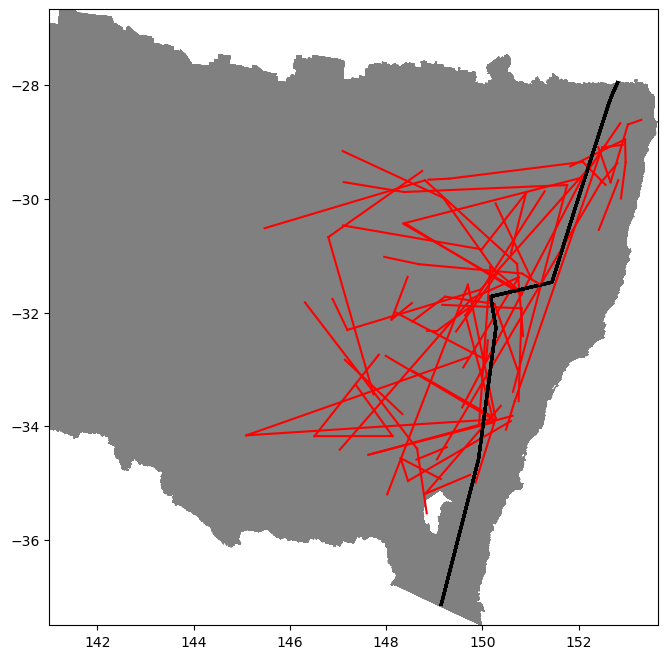

In [190]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Define a minimum threshold for KDE values
kde_threshold = 1e-4

def plot_event_centroids(ax, csv_file, polygons_data, linestrings_data, xi, yi, positions, mask, event_label):
    try:
        # Load the CSV file
        df = pd.read_csv(csv_file)

        # Filter out NaN values in latitude and longitude
        x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

        # Sum up the rainfall values for the 7 days
        x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

        # Perform Gaussian KDE on the accumulated rainfall data
        values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
        rainfall = x_cleaned['7_day_accumulated_rainfall']
        kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
        zi = kde(positions).reshape(xi.shape)

        # Mask the grid to include only points inside the polygons geometry
        zi = np.where(mask, zi, np.nan)

        # Plot the polygons and linestrings
        polygons_data.plot(ax=ax, color='gray', edgecolor='none')
        linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

        # Plot the 2D contour plot with accumulated rainfall as contours
        daily_means = []  # List to store daily mean rainfall
        centroids = []  # List to store retained centroids
        retained_days = []  # List to store retained days

        # Perform KDE for each day and calculate centroids based on threshold
        rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
        colors = sns.color_palette("husl", len(rainfall_columns))

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_rainfall.mean()
            daily_means.append(daily_mean_rainfall)
            print(f"{event_label} - Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

        # Calculate the median of the daily mean rainfall
        median_threshold = np.median(daily_means)
        print(f"{event_label} - Median Threshold: {median_threshold:.2f} mm")

        # Track centroids and joined lines
        all_centroids = []
        all_joined_lines = []
        joined_centroids = set()

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_means[i]

            if daily_mean_rainfall >= median_threshold:
                daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
                daily_zi = daily_kde(positions).reshape(xi.shape)
                daily_zi = np.where(mask, daily_zi, np.nan)
                # Apply the threshold to filter out negligible KDE values
                daily_zi = np.where(daily_zi >= kde_threshold, daily_zi, np.nan)
                daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

                if daily_contour.collections:
                    paths = [c.get_paths() for c in daily_contour.collections]
                    for path in paths:
                        for p in path:
                            centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                            all_centroids.append(centroid)
                            retained_days.append(i)

                for c in daily_contour.collections:
                    c.remove()  # Remove the contour lines

        if all_centroids:
            all_centroids = np.array(all_centroids)
            centroids_set = set(tuple(c) for c in all_centroids)
            joined_centroids = set()
            joined_lines = []

            for j in range(len(all_centroids)):
                centroid = all_centroids[j]
                ax.plot(centroid[0], centroid[1], marker='', markersize=8, color='red', linestyle='')
                joined_centroids.add(tuple(centroid))

                if j > 0 and retained_days[j] == retained_days[j - 1] + 1:
                    ax.plot([all_centroids[j - 1, 0], centroid[0]], [all_centroids[j - 1, 1], centroid[1]], color='red', linestyle='-', linewidth=1.5)
                    joined_lines.append((all_centroids[j - 1], centroid))

            unjoined_centroids = [c for c in all_centroids if tuple(c) not in joined_centroids]
            for centroid in unjoined_centroids:
                ax.plot(centroid[0], centroid[1], 'o', color='blue', markersize=8, label=f'{event_label} - Unjoined')

            return np.array(all_centroids), joined_lines
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        return np.array([]), []

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Get the bounds of the polygons
minx, miny, maxx, maxy = polygons_data.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Mask the grid to include only points inside the polygons geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([polygons_data.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)

# Load the Excel file and extract unique event names
excel_file = '/Users/coolkarni/Desktop/OneDrive - The University of Melbourne/R1_99_New Events.xlsx'
df_events = pd.read_excel(excel_file, sheet_name='Sheet2')
event_names = df_events['Event'].dropna().unique()

# Load the Coastal Events Excel file and extract event names to exclude
coastal_events_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/BoM Station list 4.xlsx'
df_coastal = pd.read_excel(coastal_events_file, sheet_name='Coastal Events')
coastal_events = df_coastal['Coastal Events'].dropna().unique()

# Filter out the coastal events from the event names
filtered_event_names = [event for event in event_names if event not in coastal_events]

# Find the CSV files for each event
csv_dir = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/'
event_files = [os.path.join(csv_dir, f'{event}.csv') for event in filtered_event_names]

# Slice to include only the first four events
event_files = event_files[:-1]

# Initialize a list to store the joined lines and centroids for each event
all_joined_lines = []
all_centroids = []

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
for event_file in event_files:
    event_label = os.path.basename(event_file).replace('.csv', '')
    centroids, joined_lines = plot_event_centroids(ax, event_file, polygons_data, linestrings_data, xi, yi, positions, mask, event_label)
    if centroids.size > 0:
        all_centroids.append({'event': event_label, 'centroids': centroids})
    if joined_lines:
        all_joined_lines.append({'event': event_label, 'joined_lines': joined_lines})

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('First Four Events - Centroids and Rainfall (Excluding Coastal Events)')
plt.legend()
plt.show()

# Save the joined lines data to a CSV file
output_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines.csv'
joined_lines_data = []
for item in all_joined_lines:
    event = item['event']
    for line in item['joined_lines']:
        joined_lines_data.append({'event': event, 'start_lon': line[0][0], 'start_lat': line[0][1], 'end_lon': line[1][0], 'end_lat': line[1][1]})

df_joined_lines = pd.DataFrame(joined_lines_data)
df_joined_lines.to_csv(output_file, index=False)

# Save the centroids data to a CSV file
output_centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'
centroids_data = []
for item in all_centroids:
    event = item['event']
    for centroid in item['centroids']:
        centroids_data.append({'event': event, 'longitude': centroid[0], 'latitude': centroid[1]})

df_centroids = pd.DataFrame(centroids_data)
df_centroids.to_csv(output_centroids_file, index=False)


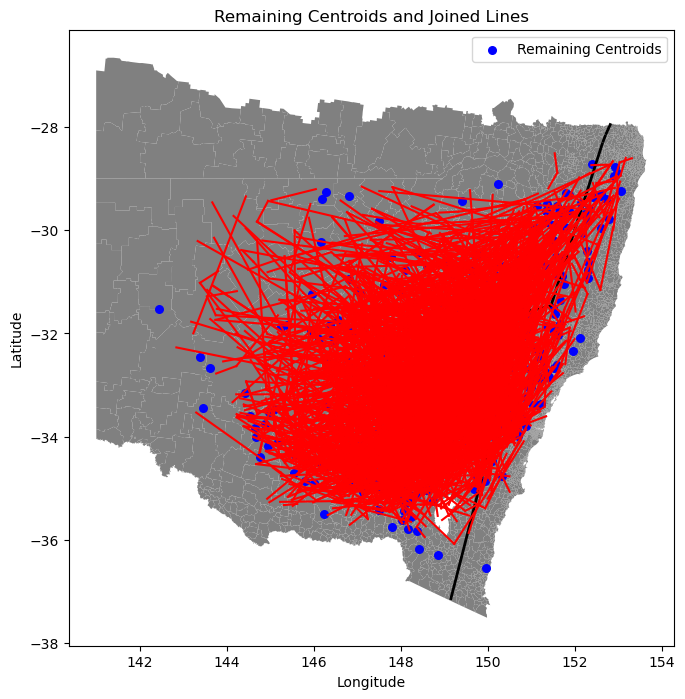

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Load the joined lines and centroids data
joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

df_joined_lines = pd.read_csv(joined_lines_file)
df_centroids = pd.read_csv(centroids_file)

# Create a DataFrame to hold centroids from joined lines
joined_centroids = pd.DataFrame({
    'longitude': pd.concat([df_joined_lines['start_lon'], df_joined_lines['end_lon']]),
    'latitude': pd.concat([df_joined_lines['start_lat'], df_joined_lines['end_lat']])
}).drop_duplicates()

# Merge the centroids DataFrame with the joined centroids DataFrame to find those not in joined lines
remaining_centroids = pd.merge(df_centroids, joined_centroids, on=['longitude', 'latitude'], how='left', indicator=True)
remaining_centroids = remaining_centroids[remaining_centroids['_merge'] == 'left_only'].drop(columns=['_merge'])

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map
polygons_data.plot(ax=ax, color='gray', edgecolor='none')
linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

# Plot joined lines with red lines
for _, row in df_joined_lines.iterrows():
    ax.plot([row['start_lon'], row['end_lon']], [row['start_lat'], row['end_lat']], color='red', linestyle='-', linewidth=1.5)

# Plot remaining centroids as blue dots
ax.scatter(remaining_centroids['longitude'], remaining_centroids['latitude'], color='blue', s=30, label='Remaining Centroids')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Remaining Centroids and Joined Lines')
plt.legend()

# Show the plot
plt.show()


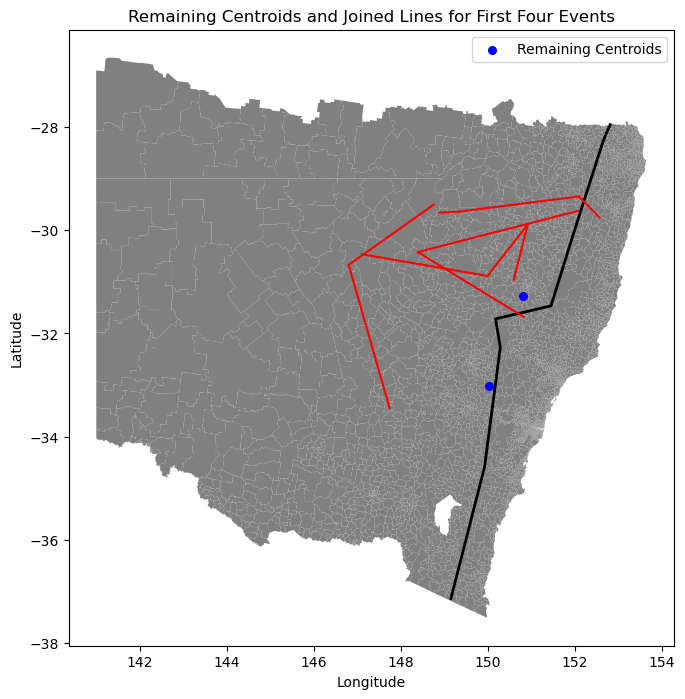

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Load the joined lines and centroids data
joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

df_joined_lines = pd.read_csv(joined_lines_file)
df_centroids = pd.read_csv(centroids_file)

# Filter the data for the first four events
first_four_events = df_joined_lines['event'].unique()[:4]
df_joined_lines_first_four = df_joined_lines[df_joined_lines['event'].isin(first_four_events)]
df_centroids_first_four = df_centroids[df_centroids['event'].isin(first_four_events)]

# Create a DataFrame to hold centroids from joined lines
joined_centroids = pd.DataFrame({
    'longitude': pd.concat([df_joined_lines_first_four['start_lon'], df_joined_lines_first_four['end_lon']]),
    'latitude': pd.concat([df_joined_lines_first_four['start_lat'], df_joined_lines_first_four['end_lat']])
}).drop_duplicates()

# Merge the centroids DataFrame with the joined centroids DataFrame to find those not in joined lines
remaining_centroids = pd.merge(df_centroids_first_four, joined_centroids, on=['longitude', 'latitude'], how='left', indicator=True)
remaining_centroids = remaining_centroids[remaining_centroids['_merge'] == 'left_only'].drop(columns=['_merge'])

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map
polygons_data.plot(ax=ax, color='gray', edgecolor='none')
linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

# Plot joined lines with red lines
for _, row in df_joined_lines_first_four.iterrows():
    ax.plot([row['start_lon'], row['end_lon']], [row['start_lat'], row['end_lat']], color='red', linestyle='-', linewidth=1.5)

# Plot remaining centroids as blue dots
ax.scatter(remaining_centroids['longitude'], remaining_centroids['latitude'], color='blue', s=30, label='Remaining Centroids')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Remaining Centroids and Joined Lines for First Four Events')
plt.legend()

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


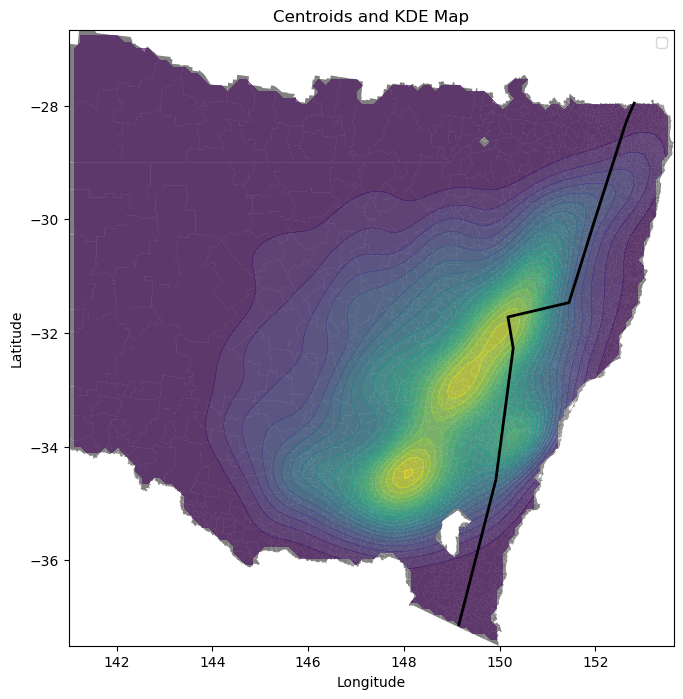

In [234]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

def plot_centroids_from_csv(ax, csv_file, polygons_data, linestrings_data, xi, yi, positions, mask):
    try:
        # Load the CSV file
        df = pd.read_csv(csv_file)
        
        # Extract centroid coordinates
        start_points = df[['start_lon', 'start_lat']].dropna().values
        end_points = df[['end_lon', 'end_lat']].dropna().values
        centroids = np.vstack((start_points, end_points))

        # Plot the polygons and linestrings
        polygons_data.plot(ax=ax, color='gray', edgecolor='none')
        linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

       
        # Perform Gaussian KDE on the centroids
        kde = gaussian_kde(centroids.T, bw_method='scott')
        zi = kde(positions).reshape(xi.shape)
        zi = np.where(mask, zi, np.nan)

        # Plot the KDE map using 'viridis' colormap
        ax.contourf(xi, yi, zi, levels=20, cmap='viridis', alpha=0.6)
        
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Get the bounds of the polygons
minx, miny, maxx, maxy = polygons_data.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Mask the grid to include only points inside the polygons geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([polygons_data.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)

# Load the joined lines CSV file
joined_lines_csv = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
plot_centroids_from_csv(ax, joined_lines_csv, polygons_data, linestrings_data, xi, yi, positions, mask)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Centroids and KDE Map')
plt.legend()
plt.show()


In [186]:
import pandas as pd

# Define the path to your CSV file
file_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Group by the 'event' column and concatenate coordinates
df_grouped = df.groupby('event').agg(lambda x: ' '.join(map(str, x))).reset_index()

# Save the updated DataFrame back to the same CSV file
df_grouped.to_csv(file_path, index=False)

print(f"Duplicates removed. The file has been updated at {file_path}.")


Duplicates removed. The file has been updated at /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines.csv.


Event 185 - 1882-04-02 to 1882-04-08 - Day 1 Mean Rainfall: 0.72 mm
Event 185 - 1882-04-02 to 1882-04-08 - Day 2 Mean Rainfall: 1.65 mm
Event 185 - 1882-04-02 to 1882-04-08 - Day 3 Mean Rainfall: 2.06 mm
Event 185 - 1882-04-02 to 1882-04-08 - Day 4 Mean Rainfall: 9.21 mm
Event 185 - 1882-04-02 to 1882-04-08 - Day 5 Mean Rainfall: 9.17 mm
Event 185 - 1882-04-02 to 1882-04-08 - Day 6 Mean Rainfall: 1.52 mm
Event 185 - 1882-04-02 to 1882-04-08 - Day 7 Mean Rainfall: 0.34 mm
Event 185 - 1882-04-02 to 1882-04-08 - Median Threshold: 1.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 189 - 1894-04-16 to 1894-04-22 - Day 1 Mean Rainfall: 1.21 mm
Event 189 - 1894-04-16 to 1894-04-22 - Day 2 Mean Rainfall: 5.23 mm
Event 189 - 1894-04-16 to 1894-04-22 - Day 3 Mean Rainfall: 13.42 mm
Event 189 - 1894-04-16 to 1894-04-22 - Day 4 Mean Rainfall: 24.67 mm
Event 189 - 1894-04-16 to 1894-04-22 - Day 5 Mean Rainfall: 15.41 mm
Event 189 - 1894-04-16 to 1894-04-22 - Day 6 Mean Rainfall: 0.60 mm
Event 189 - 1894-04-16 to 1894-04-22 - Day 7 Mean Rainfall: 0.05 mm
Event 189 - 1894-04-16 to 1894-04-22 - Median Threshold: 5.23 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 190 - 1894-07-06 to 1894-07-12 - Day 1 Mean Rainfall: 0.23 mm
Event 190 - 1894-07-06 to 1894-07-12 - Day 2 Mean Rainfall: 0.78 mm
Event 190 - 1894-07-06 to 1894-07-12 - Day 3 Mean Rainfall: 0.11 mm
Event 190 - 1894-07-06 to 1894-07-12 - Day 4 Mean Rainfall: 0.33 mm
Event 190 - 1894-07-06 to 1894-07-12 - Day 5 Mean Rainfall: 0.39 mm
Event 190 - 1894-07-06 to 1894-07-12 - Day 6 Mean Rainfall: 0.10 mm
Event 190 - 1894-07-06 to 1894-07-12 - Day 7 Mean Rainfall: 0.44 mm
Event 190 - 1894-07-06 to 1894-07-12 - Median Threshold: 0.33 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 191 - 1894-07-20 to 1894-07-26 - Day 1 Mean Rainfall: 1.13 mm
Event 191 - 1894-07-20 to 1894-07-26 - Day 2 Mean Rainfall: 1.11 mm
Event 191 - 1894-07-20 to 1894-07-26 - Day 3 Mean Rainfall: 3.23 mm
Event 191 - 1894-07-20 to 1894-07-26 - Day 4 Mean Rainfall: 2.54 mm
Event 191 - 1894-07-20 to 1894-07-26 - Day 5 Mean Rainfall: 0.63 mm
Event 191 - 1894-07-20 to 1894-07-26 - Day 6 Mean Rainfall: 0.13 mm
Event 191 - 1894-07-20 to 1894-07-26 - Day 7 Mean Rainfall: 0.08 mm
Event 191 - 1894-07-20 to 1894-07-26 - Median Threshold: 1.11 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 192 - 1894-08-31 to 1894-09-06 - Day 1 Mean Rainfall: 1.94 mm
Event 192 - 1894-08-31 to 1894-09-06 - Day 2 Mean Rainfall: 3.82 mm
Event 192 - 1894-08-31 to 1894-09-06 - Day 3 Mean Rainfall: 2.39 mm
Event 192 - 1894-08-31 to 1894-09-06 - Day 4 Mean Rainfall: 4.29 mm
Event 192 - 1894-08-31 to 1894-09-06 - Day 5 Mean Rainfall: 2.51 mm
Event 192 - 1894-08-31 to 1894-09-06 - Day 6 Mean Rainfall: 1.33 mm
Event 192 - 1894-08-31 to 1894-09-06 - Day 7 Mean Rainfall: 0.51 mm
Event 192 - 1894-08-31 to 1894-09-06 - Median Threshold: 2.39 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 193 - 1895-01-05 to 1895-01-11 - Day 1 Mean Rainfall: 7.01 mm
Event 193 - 1895-01-05 to 1895-01-11 - Day 2 Mean Rainfall: 0.40 mm
Event 193 - 1895-01-05 to 1895-01-11 - Day 3 Mean Rainfall: 0.22 mm
Event 193 - 1895-01-05 to 1895-01-11 - Day 4 Mean Rainfall: 0.94 mm
Event 193 - 1895-01-05 to 1895-01-11 - Day 5 Mean Rainfall: 1.69 mm
Event 193 - 1895-01-05 to 1895-01-11 - Day 6 Mean Rainfall: 0.35 mm
Event 193 - 1895-01-05 to 1895-01-11 - Day 7 Mean Rainfall: 0.03 mm
Event 193 - 1895-01-05 to 1895-01-11 - Median Threshold: 0.40 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 195 - 1895-05-22 to 1895-05-28 - Day 1 Mean Rainfall: 0.57 mm
Event 195 - 1895-05-22 to 1895-05-28 - Day 2 Mean Rainfall: 2.90 mm
Event 195 - 1895-05-22 to 1895-05-28 - Day 3 Mean Rainfall: 10.04 mm
Event 195 - 1895-05-22 to 1895-05-28 - Day 4 Mean Rainfall: 3.99 mm
Event 195 - 1895-05-22 to 1895-05-28 - Day 5 Mean Rainfall: 0.30 mm
Event 195 - 1895-05-22 to 1895-05-28 - Day 6 Mean Rainfall: 0.16 mm
Event 195 - 1895-05-22 to 1895-05-28 - Day 7 Mean Rainfall: 0.20 mm
Event 195 - 1895-05-22 to 1895-05-28 - Median Threshold: 0.57 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 197 - 1895-08-13 to 1895-08-19 - Day 1 Mean Rainfall: 4.41 mm
Event 197 - 1895-08-13 to 1895-08-19 - Day 2 Mean Rainfall: 4.10 mm
Event 197 - 1895-08-13 to 1895-08-19 - Day 3 Mean Rainfall: 0.49 mm
Event 197 - 1895-08-13 to 1895-08-19 - Day 4 Mean Rainfall: 1.07 mm
Event 197 - 1895-08-13 to 1895-08-19 - Day 5 Mean Rainfall: 0.40 mm
Event 197 - 1895-08-13 to 1895-08-19 - Day 6 Mean Rainfall: 0.07 mm
Event 197 - 1895-08-13 to 1895-08-19 - Day 7 Mean Rainfall: 0.29 mm
Event 197 - 1895-08-13 to 1895-08-19 - Median Threshold: 0.49 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 198 - 1896-02-10 to 1896-02-16 - Day 1 Mean Rainfall: 9.64 mm
Event 198 - 1896-02-10 to 1896-02-16 - Day 2 Mean Rainfall: 16.04 mm
Event 198 - 1896-02-10 to 1896-02-16 - Day 3 Mean Rainfall: 12.35 mm
Event 198 - 1896-02-10 to 1896-02-16 - Day 4 Mean Rainfall: 9.74 mm
Event 198 - 1896-02-10 to 1896-02-16 - Day 5 Mean Rainfall: 8.50 mm
Event 198 - 1896-02-10 to 1896-02-16 - Day 6 Mean Rainfall: 11.21 mm
Event 198 - 1896-02-10 to 1896-02-16 - Day 7 Mean Rainfall: 3.45 mm
Event 198 - 1896-02-10 to 1896-02-16 - Median Threshold: 9.74 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 200 - 1898-05-11 to 1898-05-17 - Day 1 Mean Rainfall: 0.72 mm
Event 200 - 1898-05-11 to 1898-05-17 - Day 2 Mean Rainfall: 1.04 mm
Event 200 - 1898-05-11 to 1898-05-17 - Day 3 Mean Rainfall: 0.89 mm
Event 200 - 1898-05-11 to 1898-05-17 - Day 4 Mean Rainfall: 0.59 mm
Event 200 - 1898-05-11 to 1898-05-17 - Day 5 Mean Rainfall: 0.81 mm
Event 200 - 1898-05-11 to 1898-05-17 - Day 6 Mean Rainfall: 2.21 mm
Event 200 - 1898-05-11 to 1898-05-17 - Day 7 Mean Rainfall: 1.29 mm
Event 200 - 1898-05-11 to 1898-05-17 - Median Threshold: 0.89 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 201 - 1873-01-09 to 1873-01-15 - Day 1 Mean Rainfall: 4.04 mm
Event 201 - 1873-01-09 to 1873-01-15 - Day 2 Mean Rainfall: 6.94 mm
Event 201 - 1873-01-09 to 1873-01-15 - Day 3 Mean Rainfall: 16.71 mm
Event 201 - 1873-01-09 to 1873-01-15 - Day 4 Mean Rainfall: 28.19 mm
Event 201 - 1873-01-09 to 1873-01-15 - Day 5 Mean Rainfall: 15.47 mm
Event 201 - 1873-01-09 to 1873-01-15 - Day 6 Mean Rainfall: 3.28 mm
Event 201 - 1873-01-09 to 1873-01-15 - Day 7 Mean Rainfall: 0.40 mm
Event 201 - 1873-01-09 to 1873-01-15 - Median Threshold: 6.94 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 202 - 1873-06-02 to 1873-06-08 - Day 1 Mean Rainfall: 2.50 mm
Event 202 - 1873-06-02 to 1873-06-08 - Day 2 Mean Rainfall: 1.60 mm
Event 202 - 1873-06-02 to 1873-06-08 - Day 3 Mean Rainfall: 2.61 mm
Event 202 - 1873-06-02 to 1873-06-08 - Day 4 Mean Rainfall: 20.44 mm
Event 202 - 1873-06-02 to 1873-06-08 - Day 5 Mean Rainfall: 11.30 mm
Event 202 - 1873-06-02 to 1873-06-08 - Day 6 Mean Rainfall: 3.20 mm
Event 202 - 1873-06-02 to 1873-06-08 - Day 7 Mean Rainfall: 0.54 mm
Event 202 - 1873-06-02 to 1873-06-08 - Median Threshold: 2.61 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 203 - 1873-06-13 to 1873-06-19 - Day 1 Mean Rainfall: 8.34 mm
Event 203 - 1873-06-13 to 1873-06-19 - Day 2 Mean Rainfall: 1.62 mm
Event 203 - 1873-06-13 to 1873-06-19 - Day 3 Mean Rainfall: 3.40 mm
Event 203 - 1873-06-13 to 1873-06-19 - Day 4 Mean Rainfall: 20.76 mm
Event 203 - 1873-06-13 to 1873-06-19 - Day 5 Mean Rainfall: 8.74 mm
Event 203 - 1873-06-13 to 1873-06-19 - Day 6 Mean Rainfall: 4.59 mm
Event 203 - 1873-06-13 to 1873-06-19 - Day 7 Mean Rainfall: 8.92 mm
Event 203 - 1873-06-13 to 1873-06-19 - Median Threshold: 8.34 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 205 - 1874-06-24 to 1874-06-30 - Day 1 Mean Rainfall: 0.44 mm
Event 205 - 1874-06-24 to 1874-06-30 - Day 2 Mean Rainfall: 1.27 mm
Event 205 - 1874-06-24 to 1874-06-30 - Day 3 Mean Rainfall: 4.38 mm
Event 205 - 1874-06-24 to 1874-06-30 - Day 4 Mean Rainfall: 5.33 mm
Event 205 - 1874-06-24 to 1874-06-30 - Day 5 Mean Rainfall: 2.90 mm
Event 205 - 1874-06-24 to 1874-06-30 - Day 6 Mean Rainfall: 2.26 mm
Event 205 - 1874-06-24 to 1874-06-30 - Day 7 Mean Rainfall: 0.20 mm
Event 205 - 1874-06-24 to 1874-06-30 - Median Threshold: 2.26 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 206 - 1875-06-03 to 1875-06-09 - Day 1 Mean Rainfall: 3.55 mm
Event 206 - 1875-06-03 to 1875-06-09 - Day 2 Mean Rainfall: 2.91 mm
Event 206 - 1875-06-03 to 1875-06-09 - Day 3 Mean Rainfall: 11.43 mm
Event 206 - 1875-06-03 to 1875-06-09 - Day 4 Mean Rainfall: 16.04 mm
Event 206 - 1875-06-03 to 1875-06-09 - Day 5 Mean Rainfall: 19.44 mm
Event 206 - 1875-06-03 to 1875-06-09 - Day 6 Mean Rainfall: 2.12 mm
Event 206 - 1875-06-03 to 1875-06-09 - Day 7 Mean Rainfall: 0.29 mm
Event 206 - 1875-06-03 to 1875-06-09 - Median Threshold: 3.55 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 208 - 1878-09-03 to 1878-09-09 - Day 1 Mean Rainfall: 4.59 mm
Event 208 - 1878-09-03 to 1878-09-09 - Day 2 Mean Rainfall: 3.28 mm
Event 208 - 1878-09-03 to 1878-09-09 - Day 3 Mean Rainfall: 12.21 mm
Event 208 - 1878-09-03 to 1878-09-09 - Day 4 Mean Rainfall: 15.18 mm
Event 208 - 1878-09-03 to 1878-09-09 - Day 5 Mean Rainfall: 0.92 mm
Event 208 - 1878-09-03 to 1878-09-09 - Day 6 Mean Rainfall: 0.86 mm
Event 208 - 1878-09-03 to 1878-09-09 - Day 7 Mean Rainfall: 6.88 mm
Event 208 - 1878-09-03 to 1878-09-09 - Median Threshold: 4.59 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 209 - 1882-03-28 to 1882-04-03 - Day 1 Mean Rainfall: 2.37 mm
Event 209 - 1882-03-28 to 1882-04-03 - Day 2 Mean Rainfall: 2.05 mm
Event 209 - 1882-03-28 to 1882-04-03 - Day 3 Mean Rainfall: 1.83 mm
Event 209 - 1882-03-28 to 1882-04-03 - Day 4 Mean Rainfall: 1.67 mm
Event 209 - 1882-03-28 to 1882-04-03 - Day 5 Mean Rainfall: 0.62 mm
Event 209 - 1882-03-28 to 1882-04-03 - Day 6 Mean Rainfall: 0.72 mm
Event 209 - 1882-03-28 to 1882-04-03 - Day 7 Mean Rainfall: 1.66 mm
Event 209 - 1882-03-28 to 1882-04-03 - Median Threshold: 1.67 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 212 - 1883-05-12 to 1883-05-18 - Day 1 Mean Rainfall: 1.66 mm
Event 212 - 1883-05-12 to 1883-05-18 - Day 2 Mean Rainfall: 3.15 mm
Event 212 - 1883-05-12 to 1883-05-18 - Day 3 Mean Rainfall: 6.73 mm
Event 212 - 1883-05-12 to 1883-05-18 - Day 4 Mean Rainfall: 7.85 mm
Event 212 - 1883-05-12 to 1883-05-18 - Day 5 Mean Rainfall: 4.05 mm
Event 212 - 1883-05-12 to 1883-05-18 - Day 6 Mean Rainfall: 1.83 mm
Event 212 - 1883-05-12 to 1883-05-18 - Day 7 Mean Rainfall: 0.56 mm
Event 212 - 1883-05-12 to 1883-05-18 - Median Threshold: 3.15 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 215 - 1884-06-13 to 1884-06-19 - Day 1 Mean Rainfall: 0.88 mm
Event 215 - 1884-06-13 to 1884-06-19 - Day 2 Mean Rainfall: 4.17 mm
Event 215 - 1884-06-13 to 1884-06-19 - Day 3 Mean Rainfall: 7.98 mm
Event 215 - 1884-06-13 to 1884-06-19 - Day 4 Mean Rainfall: 7.08 mm
Event 215 - 1884-06-13 to 1884-06-19 - Day 5 Mean Rainfall: 1.09 mm
Event 215 - 1884-06-13 to 1884-06-19 - Day 6 Mean Rainfall: 1.46 mm
Event 215 - 1884-06-13 to 1884-06-19 - Day 7 Mean Rainfall: 1.83 mm
Event 215 - 1884-06-13 to 1884-06-19 - Median Threshold: 1.83 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 216 - 1886-10-12 to 1886-10-18 - Day 1 Mean Rainfall: 1.08 mm
Event 216 - 1886-10-12 to 1886-10-18 - Day 2 Mean Rainfall: 2.36 mm
Event 216 - 1886-10-12 to 1886-10-18 - Day 3 Mean Rainfall: 12.23 mm
Event 216 - 1886-10-12 to 1886-10-18 - Day 4 Mean Rainfall: 12.46 mm
Event 216 - 1886-10-12 to 1886-10-18 - Day 5 Mean Rainfall: 2.24 mm
Event 216 - 1886-10-12 to 1886-10-18 - Day 6 Mean Rainfall: 0.87 mm
Event 216 - 1886-10-12 to 1886-10-18 - Day 7 Mean Rainfall: 0.39 mm
Event 216 - 1886-10-12 to 1886-10-18 - Median Threshold: 2.24 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 217 - 1887-04-11 to 1887-04-17 - Day 1 Mean Rainfall: 4.42 mm
Event 217 - 1887-04-11 to 1887-04-17 - Day 2 Mean Rainfall: 4.86 mm
Event 217 - 1887-04-11 to 1887-04-17 - Day 3 Mean Rainfall: 3.69 mm
Event 217 - 1887-04-11 to 1887-04-17 - Day 4 Mean Rainfall: 3.62 mm
Event 217 - 1887-04-11 to 1887-04-17 - Day 5 Mean Rainfall: 1.42 mm
Event 217 - 1887-04-11 to 1887-04-17 - Day 6 Mean Rainfall: 1.11 mm
Event 217 - 1887-04-11 to 1887-04-17 - Day 7 Mean Rainfall: 1.73 mm
Event 217 - 1887-04-11 to 1887-04-17 - Median Threshold: 3.62 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 218 - 1890-04-25 to 1890-05-01 - Day 1 Mean Rainfall: 1.51 mm
Event 218 - 1890-04-25 to 1890-05-01 - Day 2 Mean Rainfall: 1.92 mm
Event 218 - 1890-04-25 to 1890-05-01 - Day 3 Mean Rainfall: 3.06 mm
Event 218 - 1890-04-25 to 1890-05-01 - Day 4 Mean Rainfall: 2.29 mm
Event 218 - 1890-04-25 to 1890-05-01 - Day 5 Mean Rainfall: 1.36 mm
Event 218 - 1890-04-25 to 1890-05-01 - Day 6 Mean Rainfall: 1.24 mm
Event 218 - 1890-04-25 to 1890-05-01 - Day 7 Mean Rainfall: 1.34 mm
Event 218 - 1890-04-25 to 1890-05-01 - Median Threshold: 1.51 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 219 - 1897-01-07 to 1897-01-13 - Day 1 Mean Rainfall: 0.60 mm
Event 219 - 1897-01-07 to 1897-01-13 - Day 2 Mean Rainfall: 3.01 mm
Event 219 - 1897-01-07 to 1897-01-13 - Day 3 Mean Rainfall: 15.36 mm
Event 219 - 1897-01-07 to 1897-01-13 - Day 4 Mean Rainfall: 25.57 mm
Event 219 - 1897-01-07 to 1897-01-13 - Day 5 Mean Rainfall: 7.43 mm
Event 219 - 1897-01-07 to 1897-01-13 - Day 6 Mean Rainfall: 0.58 mm
Event 219 - 1897-01-07 to 1897-01-13 - Day 7 Mean Rainfall: 0.29 mm
Event 219 - 1897-01-07 to 1897-01-13 - Median Threshold: 3.01 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 220 - 1898-06-05 to 1898-06-11 - Day 1 Mean Rainfall: 1.69 mm
Event 220 - 1898-06-05 to 1898-06-11 - Day 2 Mean Rainfall: 2.22 mm
Event 220 - 1898-06-05 to 1898-06-11 - Day 3 Mean Rainfall: 3.98 mm
Event 220 - 1898-06-05 to 1898-06-11 - Day 4 Mean Rainfall: 4.17 mm
Event 220 - 1898-06-05 to 1898-06-11 - Day 5 Mean Rainfall: 1.90 mm
Event 220 - 1898-06-05 to 1898-06-11 - Day 6 Mean Rainfall: 1.26 mm
Event 220 - 1898-06-05 to 1898-06-11 - Day 7 Mean Rainfall: 4.98 mm
Event 220 - 1898-06-05 to 1898-06-11 - Median Threshold: 2.22 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 223 - 1896-05-11 to 1896-05-17 - Day 1 Mean Rainfall: 1.02 mm
Event 223 - 1896-05-11 to 1896-05-17 - Day 2 Mean Rainfall: 5.55 mm
Event 223 - 1896-05-11 to 1896-05-17 - Day 3 Mean Rainfall: 3.04 mm
Event 223 - 1896-05-11 to 1896-05-17 - Day 4 Mean Rainfall: 6.10 mm
Event 223 - 1896-05-11 to 1896-05-17 - Day 5 Mean Rainfall: 0.92 mm
Event 223 - 1896-05-11 to 1896-05-17 - Day 6 Mean Rainfall: 0.28 mm
Event 223 - 1896-05-11 to 1896-05-17 - Day 7 Mean Rainfall: 0.15 mm
Event 223 - 1896-05-11 to 1896-05-17 - Median Threshold: 1.02 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 224 - 1899-06-02 to 1899-06-08 - Day 1 Mean Rainfall: 0.75 mm
Event 224 - 1899-06-02 to 1899-06-08 - Day 2 Mean Rainfall: 2.94 mm
Event 224 - 1899-06-02 to 1899-06-08 - Day 3 Mean Rainfall: 9.69 mm
Event 224 - 1899-06-02 to 1899-06-08 - Day 4 Mean Rainfall: 6.34 mm
Event 224 - 1899-06-02 to 1899-06-08 - Day 5 Mean Rainfall: 1.39 mm
Event 224 - 1899-06-02 to 1899-06-08 - Day 6 Mean Rainfall: 2.60 mm
Event 224 - 1899-06-02 to 1899-06-08 - Day 7 Mean Rainfall: 3.99 mm
Event 224 - 1899-06-02 to 1899-06-08 - Median Threshold: 2.94 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 226 - 1894-10-17 to 1894-10-23 - Day 1 Mean Rainfall: 0.88 mm
Event 226 - 1894-10-17 to 1894-10-23 - Day 2 Mean Rainfall: 0.56 mm
Event 226 - 1894-10-17 to 1894-10-23 - Day 3 Mean Rainfall: 2.96 mm
Event 226 - 1894-10-17 to 1894-10-23 - Day 4 Mean Rainfall: 7.44 mm
Event 226 - 1894-10-17 to 1894-10-23 - Day 5 Mean Rainfall: 1.65 mm
Event 226 - 1894-10-17 to 1894-10-23 - Day 6 Mean Rainfall: 0.62 mm
Event 226 - 1894-10-17 to 1894-10-23 - Day 7 Mean Rainfall: 0.51 mm
Event 226 - 1894-10-17 to 1894-10-23 - Median Threshold: 0.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 231 - 1888-07-01 to 1888-07-07 - Day 1 Mean Rainfall: 0.49 mm
Event 231 - 1888-07-01 to 1888-07-07 - Day 2 Mean Rainfall: 2.18 mm
Event 231 - 1888-07-01 to 1888-07-07 - Day 3 Mean Rainfall: 1.90 mm
Event 231 - 1888-07-01 to 1888-07-07 - Day 4 Mean Rainfall: 0.75 mm
Event 231 - 1888-07-01 to 1888-07-07 - Day 5 Mean Rainfall: 0.31 mm
Event 231 - 1888-07-01 to 1888-07-07 - Day 6 Mean Rainfall: 0.06 mm
Event 231 - 1888-07-01 to 1888-07-07 - Day 7 Mean Rainfall: 0.05 mm
Event 231 - 1888-07-01 to 1888-07-07 - Median Threshold: 0.49 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 233 - 1890-12-06 to 1890-12-12 - Day 1 Mean Rainfall: 0.84 mm
Event 233 - 1890-12-06 to 1890-12-12 - Day 2 Mean Rainfall: 2.12 mm
Event 233 - 1890-12-06 to 1890-12-12 - Day 3 Mean Rainfall: 4.45 mm
Event 233 - 1890-12-06 to 1890-12-12 - Day 4 Mean Rainfall: 1.04 mm
Event 233 - 1890-12-06 to 1890-12-12 - Day 5 Mean Rainfall: 0.37 mm
Event 233 - 1890-12-06 to 1890-12-12 - Day 6 Mean Rainfall: 0.23 mm
Event 233 - 1890-12-06 to 1890-12-12 - Day 7 Mean Rainfall: 0.13 mm
Event 233 - 1890-12-06 to 1890-12-12 - Median Threshold: 0.84 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 235 - 1897-06-10 to 1897-06-16 - Day 1 Mean Rainfall: 0.40 mm
Event 235 - 1897-06-10 to 1897-06-16 - Day 2 Mean Rainfall: 1.63 mm
Event 235 - 1897-06-10 to 1897-06-16 - Day 3 Mean Rainfall: 4.00 mm
Event 235 - 1897-06-10 to 1897-06-16 - Day 4 Mean Rainfall: 2.05 mm
Event 235 - 1897-06-10 to 1897-06-16 - Day 5 Mean Rainfall: 1.54 mm
Event 235 - 1897-06-10 to 1897-06-16 - Day 6 Mean Rainfall: 0.60 mm
Event 235 - 1897-06-10 to 1897-06-16 - Day 7 Mean Rainfall: 0.13 mm
Event 235 - 1897-06-10 to 1897-06-16 - Median Threshold: 1.54 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 236 - 1899-12-28 to 1900-01-03 - Day 1 Mean Rainfall: 2.74 mm
Event 236 - 1899-12-28 to 1900-01-03 - Day 2 Mean Rainfall: 1.83 mm
Event 236 - 1899-12-28 to 1900-01-03 - Day 3 Mean Rainfall: 0.53 mm
Event 236 - 1899-12-28 to 1900-01-03 - Day 4 Mean Rainfall: 1.70 mm
Event 236 - 1899-12-28 to 1900-01-03 - Day 5 Mean Rainfall: 0.68 mm
Event 236 - 1899-12-28 to 1900-01-03 - Day 6 Mean Rainfall: 0.24 mm
Event 236 - 1899-12-28 to 1900-01-03 - Day 7 Mean Rainfall: 0.76 mm
Event 236 - 1899-12-28 to 1900-01-03 - Median Threshold: 0.76 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 237 - 1893-12-26 to 1894-01-01 - Day 1 Mean Rainfall: 1.94 mm
Event 237 - 1893-12-26 to 1894-01-01 - Day 2 Mean Rainfall: 1.26 mm
Event 237 - 1893-12-26 to 1894-01-01 - Day 3 Mean Rainfall: 6.43 mm
Event 237 - 1893-12-26 to 1894-01-01 - Day 4 Mean Rainfall: 9.88 mm
Event 237 - 1893-12-26 to 1894-01-01 - Day 5 Mean Rainfall: 1.82 mm
Event 237 - 1893-12-26 to 1894-01-01 - Day 6 Mean Rainfall: 0.55 mm
Event 237 - 1893-12-26 to 1894-01-01 - Day 7 Mean Rainfall: 0.25 mm
Event 237 - 1893-12-26 to 1894-01-01 - Median Threshold: 1.82 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 238 - 1894-06-03 to 1894-06-09 - Day 1 Mean Rainfall: 0.91 mm
Event 238 - 1894-06-03 to 1894-06-09 - Day 2 Mean Rainfall: 3.12 mm
Event 238 - 1894-06-03 to 1894-06-09 - Day 3 Mean Rainfall: 2.76 mm
Event 238 - 1894-06-03 to 1894-06-09 - Day 4 Mean Rainfall: 5.32 mm
Event 238 - 1894-06-03 to 1894-06-09 - Day 5 Mean Rainfall: 1.65 mm
Event 238 - 1894-06-03 to 1894-06-09 - Day 6 Mean Rainfall: 0.11 mm
Event 238 - 1894-06-03 to 1894-06-09 - Day 7 Mean Rainfall: 0.06 mm
Event 238 - 1894-06-03 to 1894-06-09 - Median Threshold: 1.65 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 239 - 1889-07-23 to 1889-07-29 - Day 1 Mean Rainfall: 0.26 mm
Event 239 - 1889-07-23 to 1889-07-29 - Day 2 Mean Rainfall: 0.47 mm
Event 239 - 1889-07-23 to 1889-07-29 - Day 3 Mean Rainfall: 2.25 mm
Event 239 - 1889-07-23 to 1889-07-29 - Day 4 Mean Rainfall: 4.42 mm
Event 239 - 1889-07-23 to 1889-07-29 - Day 5 Mean Rainfall: 0.84 mm
Event 239 - 1889-07-23 to 1889-07-29 - Day 6 Mean Rainfall: 0.26 mm
Event 239 - 1889-07-23 to 1889-07-29 - Day 7 Mean Rainfall: 0.19 mm
Event 239 - 1889-07-23 to 1889-07-29 - Median Threshold: 0.47 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 241 - 1896-06-01 to 1896-06-07 - Day 1 Mean Rainfall: 0.35 mm
Event 241 - 1896-06-01 to 1896-06-07 - Day 2 Mean Rainfall: 0.36 mm
Event 241 - 1896-06-01 to 1896-06-07 - Day 3 Mean Rainfall: 0.26 mm
Event 241 - 1896-06-01 to 1896-06-07 - Day 4 Mean Rainfall: 1.95 mm
Event 241 - 1896-06-01 to 1896-06-07 - Day 5 Mean Rainfall: 2.14 mm
Event 241 - 1896-06-01 to 1896-06-07 - Day 6 Mean Rainfall: 0.27 mm
Event 241 - 1896-06-01 to 1896-06-07 - Day 7 Mean Rainfall: 0.30 mm
Event 241 - 1896-06-01 to 1896-06-07 - Median Threshold: 0.35 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 242 - 1899-08-08 to 1899-08-14 - Day 1 Mean Rainfall: 2.13 mm
Event 242 - 1899-08-08 to 1899-08-14 - Day 2 Mean Rainfall: 3.00 mm
Event 242 - 1899-08-08 to 1899-08-14 - Day 3 Mean Rainfall: 1.02 mm
Event 242 - 1899-08-08 to 1899-08-14 - Day 4 Mean Rainfall: 3.29 mm
Event 242 - 1899-08-08 to 1899-08-14 - Day 5 Mean Rainfall: 6.36 mm
Event 242 - 1899-08-08 to 1899-08-14 - Day 6 Mean Rainfall: 2.36 mm
Event 242 - 1899-08-08 to 1899-08-14 - Day 7 Mean Rainfall: 0.93 mm
Event 242 - 1899-08-08 to 1899-08-14 - Median Threshold: 2.36 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 243 - 1899-11-03 to 1899-11-09 - Day 1 Mean Rainfall: 0.84 mm
Event 243 - 1899-11-03 to 1899-11-09 - Day 2 Mean Rainfall: 4.53 mm
Event 243 - 1899-11-03 to 1899-11-09 - Day 3 Mean Rainfall: 7.20 mm
Event 243 - 1899-11-03 to 1899-11-09 - Day 4 Mean Rainfall: 6.59 mm
Event 243 - 1899-11-03 to 1899-11-09 - Day 5 Mean Rainfall: 7.90 mm
Event 243 - 1899-11-03 to 1899-11-09 - Day 6 Mean Rainfall: 3.42 mm
Event 243 - 1899-11-03 to 1899-11-09 - Day 7 Mean Rainfall: 0.59 mm
Event 243 - 1899-11-03 to 1899-11-09 - Median Threshold: 4.53 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 244 - 1876-11-16 to 1876-11-22 - Day 1 Mean Rainfall: 14.76 mm
Event 244 - 1876-11-16 to 1876-11-22 - Day 2 Mean Rainfall: 17.26 mm
Event 244 - 1876-11-16 to 1876-11-22 - Day 3 Mean Rainfall: 6.74 mm
Event 244 - 1876-11-16 to 1876-11-22 - Day 4 Mean Rainfall: 6.35 mm
Event 244 - 1876-11-16 to 1876-11-22 - Day 5 Mean Rainfall: 8.02 mm
Event 244 - 1876-11-16 to 1876-11-22 - Day 6 Mean Rainfall: 1.12 mm
Event 244 - 1876-11-16 to 1876-11-22 - Day 7 Mean Rainfall: 0.31 mm
Event 244 - 1876-11-16 to 1876-11-22 - Median Threshold: 6.74 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 245 - 1879-09-01 to 1879-09-07 - Day 1 Mean Rainfall: 2.49 mm
Event 245 - 1879-09-01 to 1879-09-07 - Day 2 Mean Rainfall: 3.04 mm
Event 245 - 1879-09-01 to 1879-09-07 - Day 3 Mean Rainfall: 1.38 mm
Event 245 - 1879-09-01 to 1879-09-07 - Day 4 Mean Rainfall: 2.18 mm
Event 245 - 1879-09-01 to 1879-09-07 - Day 5 Mean Rainfall: 0.73 mm
Event 245 - 1879-09-01 to 1879-09-07 - Day 6 Mean Rainfall: 0.58 mm
Event 245 - 1879-09-01 to 1879-09-07 - Day 7 Mean Rainfall: 1.00 mm
Event 245 - 1879-09-01 to 1879-09-07 - Median Threshold: 1.38 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 246 - 1880-03-31 to 1880-04-06 - Day 1 Mean Rainfall: 0.95 mm
Event 246 - 1880-03-31 to 1880-04-06 - Day 2 Mean Rainfall: 0.18 mm
Event 246 - 1880-03-31 to 1880-04-06 - Day 3 Mean Rainfall: 2.21 mm
Event 246 - 1880-03-31 to 1880-04-06 - Day 4 Mean Rainfall: 4.28 mm
Event 246 - 1880-03-31 to 1880-04-06 - Day 5 Mean Rainfall: 0.50 mm
Event 246 - 1880-03-31 to 1880-04-06 - Day 6 Mean Rainfall: 0.61 mm
Event 246 - 1880-03-31 to 1880-04-06 - Day 7 Mean Rainfall: 1.36 mm
Event 246 - 1880-03-31 to 1880-04-06 - Median Threshold: 0.95 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 249 - 1899-06-25 to 1899-07-01 - Day 1 Mean Rainfall: 1.31 mm
Event 249 - 1899-06-25 to 1899-07-01 - Day 2 Mean Rainfall: 1.05 mm
Event 249 - 1899-06-25 to 1899-07-01 - Day 3 Mean Rainfall: 2.67 mm
Event 249 - 1899-06-25 to 1899-07-01 - Day 4 Mean Rainfall: 3.18 mm
Event 249 - 1899-06-25 to 1899-07-01 - Day 5 Mean Rainfall: 0.27 mm
Event 249 - 1899-06-25 to 1899-07-01 - Day 6 Mean Rainfall: 0.47 mm
Event 249 - 1899-06-25 to 1899-07-01 - Day 7 Mean Rainfall: 0.73 mm
Event 249 - 1899-06-25 to 1899-07-01 - Median Threshold: 1.05 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 252 - 1880-09-13 to 1880-09-19 - Day 1 Mean Rainfall: 1.87 mm
Event 252 - 1880-09-13 to 1880-09-19 - Day 2 Mean Rainfall: 1.05 mm
Event 252 - 1880-09-13 to 1880-09-19 - Day 3 Mean Rainfall: 4.18 mm
Event 252 - 1880-09-13 to 1880-09-19 - Day 4 Mean Rainfall: 6.39 mm
Event 252 - 1880-09-13 to 1880-09-19 - Day 5 Mean Rainfall: 1.97 mm
Event 252 - 1880-09-13 to 1880-09-19 - Day 6 Mean Rainfall: 1.16 mm
Event 252 - 1880-09-13 to 1880-09-19 - Day 7 Mean Rainfall: 0.12 mm
Event 252 - 1880-09-13 to 1880-09-19 - Median Threshold: 1.87 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 253 - 1896-05-23 to 1896-05-29 - Day 1 Mean Rainfall: 2.12 mm
Event 253 - 1896-05-23 to 1896-05-29 - Day 2 Mean Rainfall: 3.68 mm
Event 253 - 1896-05-23 to 1896-05-29 - Day 3 Mean Rainfall: 1.22 mm
Event 253 - 1896-05-23 to 1896-05-29 - Day 4 Mean Rainfall: 0.14 mm
Event 253 - 1896-05-23 to 1896-05-29 - Day 5 Mean Rainfall: 0.05 mm
Event 253 - 1896-05-23 to 1896-05-29 - Day 6 Mean Rainfall: 0.00 mm
Event 253 - 1896-05-23 to 1896-05-29 - Day 7 Mean Rainfall: 0.02 mm
Event 253 - 1896-05-23 to 1896-05-29 - Median Threshold: 0.14 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 255 - 1900-06-15 to 1900-06-21 - Day 1 Mean Rainfall: 3.05 mm
Event 255 - 1900-06-15 to 1900-06-21 - Day 2 Mean Rainfall: 0.56 mm
Event 255 - 1900-06-15 to 1900-06-21 - Day 3 Mean Rainfall: 1.69 mm
Event 255 - 1900-06-15 to 1900-06-21 - Day 4 Mean Rainfall: 1.80 mm
Event 255 - 1900-06-15 to 1900-06-21 - Day 5 Mean Rainfall: 0.33 mm
Event 255 - 1900-06-15 to 1900-06-21 - Day 6 Mean Rainfall: 1.54 mm
Event 255 - 1900-06-15 to 1900-06-21 - Day 7 Mean Rainfall: 5.83 mm
Event 255 - 1900-06-15 to 1900-06-21 - Median Threshold: 1.69 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 256 - 1896-02-06 to 1896-02-12 - Day 1 Mean Rainfall: 1.28 mm
Event 256 - 1896-02-06 to 1896-02-12 - Day 2 Mean Rainfall: 2.08 mm
Event 256 - 1896-02-06 to 1896-02-12 - Day 3 Mean Rainfall: 3.88 mm
Event 256 - 1896-02-06 to 1896-02-12 - Day 4 Mean Rainfall: 3.67 mm
Event 256 - 1896-02-06 to 1896-02-12 - Day 5 Mean Rainfall: 9.62 mm
Event 256 - 1896-02-06 to 1896-02-12 - Day 6 Mean Rainfall: 16.02 mm
Event 256 - 1896-02-06 to 1896-02-12 - Day 7 Mean Rainfall: 12.34 mm
Event 256 - 1896-02-06 to 1896-02-12 - Median Threshold: 3.88 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 257 - 1886-07-27 to 1886-08-02 - Day 1 Mean Rainfall: 4.38 mm
Event 257 - 1886-07-27 to 1886-08-02 - Day 2 Mean Rainfall: 1.54 mm
Event 257 - 1886-07-27 to 1886-08-02 - Day 3 Mean Rainfall: 0.82 mm
Event 257 - 1886-07-27 to 1886-08-02 - Day 4 Mean Rainfall: 0.42 mm
Event 257 - 1886-07-27 to 1886-08-02 - Day 5 Mean Rainfall: 0.17 mm
Event 257 - 1886-07-27 to 1886-08-02 - Day 6 Mean Rainfall: 5.16 mm
Event 257 - 1886-07-27 to 1886-08-02 - Day 7 Mean Rainfall: 14.58 mm
Event 257 - 1886-07-27 to 1886-08-02 - Median Threshold: 1.54 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 258 - 1886-12-14 to 1886-12-20 - Day 1 Mean Rainfall: 2.35 mm
Event 258 - 1886-12-14 to 1886-12-20 - Day 2 Mean Rainfall: 1.08 mm
Event 258 - 1886-12-14 to 1886-12-20 - Day 3 Mean Rainfall: 0.74 mm
Event 258 - 1886-12-14 to 1886-12-20 - Day 4 Mean Rainfall: 1.70 mm
Event 258 - 1886-12-14 to 1886-12-20 - Day 5 Mean Rainfall: 0.87 mm
Event 258 - 1886-12-14 to 1886-12-20 - Day 6 Mean Rainfall: 0.58 mm
Event 258 - 1886-12-14 to 1886-12-20 - Day 7 Mean Rainfall: 0.65 mm
Event 258 - 1886-12-14 to 1886-12-20 - Median Threshold: 0.87 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 259 - 1887-01-25 to 1887-01-31.csv: aweights cannot be negative
Event 261 - 1889-03-26 to 1889-04-01 - Day 1 Mean Rainfall: 1.02 mm
Event 261 - 1889-03-26 to 1889-04-01 - Day 2 Mean Rainfall: 0.34 mm
Event 261 - 1889-03-26 to 1889-04-01 - Day 3 Mean Rainfall: 0.75 mm
Event 261 - 1889-03-26 to 1889-04-01 - Day 4 Mean Rainfall: 1.99 mm
Event 261 - 1889-03-26 to 1889-04-01 - Day 5 Mean Rainfall: 3.53 mm
Event 261 - 1889-03-26 to 1889-04-01 - Day 6 Mean Rainfall: 3.94 mm
Event 261 - 1889-03-26 to 1889-04-01 - Day 7 Mean Rainfall: 3.98 mm
Event 261 - 1889-03-26 to 1889-04-01 - Median Threshold: 1.99 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 265 - 1897-12-18 to 1897-12-24 - Day 1 Mean Rainfall: 0.38 mm
Event 265 - 1897-12-18 to 1897-12-24 - Day 2 Mean Rainfall: 2.33 mm
Event 265 - 1897-12-18 to 1897-12-24 - Day 3 Mean Rainfall: 9.15 mm
Event 265 - 1897-12-18 to 1897-12-24 - Day 4 Mean Rainfall: 5.12 mm
Event 265 - 1897-12-18 to 1897-12-24 - Day 5 Mean Rainfall: 1.09 mm
Event 265 - 1897-12-18 to 1897-12-24 - Day 6 Mean Rainfall: 0.65 mm
Event 265 - 1897-12-18 to 1897-12-24 - Day 7 Mean Rainfall: 1.55 mm
Event 265 - 1897-12-18 to 1897-12-24 - Median Threshold: 1.55 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 269 - 1860-01-04 to 1860-01-10 - Day 1 Mean Rainfall: 7.56 mm
Event 269 - 1860-01-04 to 1860-01-10 - Day 2 Mean Rainfall: 1.72 mm
Event 269 - 1860-01-04 to 1860-01-10 - Day 3 Mean Rainfall: 3.47 mm
Event 269 - 1860-01-04 to 1860-01-10 - Day 4 Mean Rainfall: 23.11 mm
Event 269 - 1860-01-04 to 1860-01-10 - Day 5 Mean Rainfall: 7.23 mm
Event 269 - 1860-01-04 to 1860-01-10 - Day 6 Mean Rainfall: 11.92 mm
Event 269 - 1860-01-04 to 1860-01-10 - Day 7 Mean Rainfall: 2.03 mm
Event 269 - 1860-01-04 to 1860-01-10 - Median Threshold: 7.23 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 275 - 1864-05-31 to 1864-06-06 - Day 1 Mean Rainfall: 0.06 mm
Event 275 - 1864-05-31 to 1864-06-06 - Day 2 Mean Rainfall: 0.66 mm
Event 275 - 1864-05-31 to 1864-06-06 - Day 3 Mean Rainfall: 0.00 mm
Event 275 - 1864-05-31 to 1864-06-06 - Day 4 Mean Rainfall: 50.60 mm
Event 275 - 1864-05-31 to 1864-06-06 - Day 5 Mean Rainfall: 12.70 mm
Event 275 - 1864-05-31 to 1864-06-06 - Day 6 Mean Rainfall: 0.16 mm
Event 275 - 1864-05-31 to 1864-06-06 - Day 7 Mean Rainfall: 0.50 mm
Event 275 - 1864-05-31 to 1864-06-06 - Median Threshold: 0.50 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 275 - 1864-05-31 to 1864-06-06.csv: array must not contain infs or NaNs


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site

Event 276 - 1864-06-09 to 1864-06-15 - Day 1 Mean Rainfall: 0.00 mm
Event 276 - 1864-06-09 to 1864-06-15 - Day 2 Mean Rainfall: 3.26 mm
Event 276 - 1864-06-09 to 1864-06-15 - Day 3 Mean Rainfall: 36.74 mm
Event 276 - 1864-06-09 to 1864-06-15 - Day 4 Mean Rainfall: 28.08 mm
Event 276 - 1864-06-09 to 1864-06-15 - Day 5 Mean Rainfall: 11.58 mm
Event 276 - 1864-06-09 to 1864-06-15 - Day 6 Mean Rainfall: 1.86 mm
Event 276 - 1864-06-09 to 1864-06-15 - Day 7 Mean Rainfall: 2.32 mm
Event 276 - 1864-06-09 to 1864-06-15 - Median Threshold: 3.26 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 276 - 1864-06-09 to 1864-06-15.csv: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component anal

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 277 - 1865-11-23 to 1865-11-29 - Day 1 Mean Rainfall: 0.00 mm
Event 277 - 1865-11-23 to 1865-11-29 - Day 2 Mean Rainfall: 0.27 mm
Event 277 - 1865-11-23 to 1865-11-29 - Day 3 Mean Rainfall: 2.87 mm
Event 277 - 1865-11-23 to 1865-11-29 - Day 4 Mean Rainfall: 35.13 mm
Event 277 - 1865-11-23 to 1865-11-29 - Day 5 Mean Rainfall: 0.00 mm
Event 277 - 1865-11-23 to 1865-11-29 - Day 6 Mean Rainfall: 3.80 mm
Event 277 - 1865-11-23 to 1865-11-29 - Day 7 Mean Rainfall: 0.00 mm
Event 277 - 1865-11-23 to 1865-11-29 - Median Threshold: 0.27 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 277 - 1865-11-23 to 1865-11-29.csv: array must not contain infs or NaNs


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site

Event 278 - 1866-06-12 to 1866-06-18 - Day 1 Mean Rainfall: 3.40 mm
Event 278 - 1866-06-12 to 1866-06-18 - Day 2 Mean Rainfall: 4.30 mm
Event 278 - 1866-06-12 to 1866-06-18 - Day 3 Mean Rainfall: 6.50 mm
Event 278 - 1866-06-12 to 1866-06-18 - Day 4 Mean Rainfall: 31.53 mm
Event 278 - 1866-06-12 to 1866-06-18 - Day 5 Mean Rainfall: 0.27 mm
Event 278 - 1866-06-12 to 1866-06-18 - Day 6 Mean Rainfall: 1.53 mm
Event 278 - 1866-06-12 to 1866-06-18 - Day 7 Mean Rainfall: 2.30 mm
Event 278 - 1866-06-12 to 1866-06-18 - Median Threshold: 3.40 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 278 - 1866-06-12 to 1866-06-18.csv: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analys

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site

Event 280 - 1867-03-21 to 1867-03-27 - Day 1 Mean Rainfall: 0.04 mm
Event 280 - 1867-03-21 to 1867-03-27 - Day 2 Mean Rainfall: 2.86 mm
Event 280 - 1867-03-21 to 1867-03-27 - Day 3 Mean Rainfall: 0.86 mm
Event 280 - 1867-03-21 to 1867-03-27 - Day 4 Mean Rainfall: 30.40 mm
Event 280 - 1867-03-21 to 1867-03-27 - Day 5 Mean Rainfall: 25.05 mm
Event 280 - 1867-03-21 to 1867-03-27 - Day 6 Mean Rainfall: 9.18 mm
Event 280 - 1867-03-21 to 1867-03-27 - Day 7 Mean Rainfall: 1.59 mm
Event 280 - 1867-03-21 to 1867-03-27 - Median Threshold: 2.86 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 280 - 1867-03-21 to 1867-03-27.csv: array must not contain infs or NaNs


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Event 281 - 1867-06-17 to 1867-06-23 - Day 1 Mean Rainfall: 0.45 mm
Event 281 - 1867-06-17 to 1867-06-23 - Day 2 Mean Rainfall: 6.86 mm
Event 281 - 1867-06-17 to 1867-06-23 - Day 3 Mean Rainfall: 18.55 mm
Event 281 - 1867-06-17 to 1867-06-23 - Day 4 Mean Rainfall: 53.28 mm
Event 281 - 1867-06-17 to 1867-06-23 - Day 5 Mean Rainfall: 42.11 mm
Event 281 - 1867-06-17 to 1867-06-23 - Day 6 Mean Rainfall: 37.77 mm
Event 281 - 1867-06-17 to 1867-06-23 - Day 7 Mean Rainfall: 12.12 mm
Event 281 - 1867-06-17 to 1867-06-23 - Median Threshold: 18.55 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 282 - 1868-01-30 to 1868-02-05 - Day 1 Mean Rainfall: 5.57 mm
Event 282 - 1868-01-30 to 1868-02-05 - Day 2 Mean Rainfall: 2.58 mm
Event 282 - 1868-01-30 to 1868-02-05 - Day 3 Mean Rainfall: 3.39 mm
Event 282 - 1868-01-30 to 1868-02-05 - Day 4 Mean Rainfall: 17.91 mm
Event 282 - 1868-01-30 to 1868-02-05 - Day 5 Mean Rainfall: 0.20 mm
Event 282 - 1868-01-30 to 1868-02-05 - Day 6 Mean Rainfall: 0.00 mm
Event 282 - 1868-01-30 to 1868-02-05 - Day 7 Mean Rainfall: 0.00 mm
Event 282 - 1868-01-30 to 1868-02-05 - Median Threshold: 2.58 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 282 - 1868-01-30 to 1868-02-05.csv: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analys

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 284 - 1870-03-07 to 1870-03-13 - Day 1 Mean Rainfall: 3.32 mm
Event 284 - 1870-03-07 to 1870-03-13 - Day 2 Mean Rainfall: 3.75 mm
Event 284 - 1870-03-07 to 1870-03-13 - Day 3 Mean Rainfall: 7.51 mm
Event 284 - 1870-03-07 to 1870-03-13 - Day 4 Mean Rainfall: 30.02 mm
Event 284 - 1870-03-07 to 1870-03-13 - Day 5 Mean Rainfall: 2.91 mm
Event 284 - 1870-03-07 to 1870-03-13 - Day 6 Mean Rainfall: 2.62 mm
Event 284 - 1870-03-07 to 1870-03-13 - Day 7 Mean Rainfall: 4.43 mm
Event 284 - 1870-03-07 to 1870-03-13 - Median Threshold: 3.75 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 285 - 1870-03-27 to 1870-04-02 - Day 1 Mean Rainfall: 3.01 mm
Event 285 - 1870-03-27 to 1870-04-02 - Day 2 Mean Rainfall: 4.58 mm
Event 285 - 1870-03-27 to 1870-04-02 - Day 3 Mean Rainfall: 7.94 mm
Event 285 - 1870-03-27 to 1870-04-02 - Day 4 Mean Rainfall: 15.00 mm
Event 285 - 1870-03-27 to 1870-04-02 - Day 5 Mean Rainfall: 11.75 mm
Event 285 - 1870-03-27 to 1870-04-02 - Day 6 Mean Rainfall: 1.56 mm
Event 285 - 1870-03-27 to 1870-04-02 - Day 7 Mean Rainfall: 0.58 mm
Event 285 - 1870-03-27 to 1870-04-02 - Median Threshold: 4.58 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 287 - 1873-11-08 to 1873-11-14 - Day 1 Mean Rainfall: 0.45 mm
Event 287 - 1873-11-08 to 1873-11-14 - Day 2 Mean Rainfall: 0.15 mm
Event 287 - 1873-11-08 to 1873-11-14 - Day 3 Mean Rainfall: 1.85 mm
Event 287 - 1873-11-08 to 1873-11-14 - Day 4 Mean Rainfall: 6.86 mm
Event 287 - 1873-11-08 to 1873-11-14 - Day 5 Mean Rainfall: 11.68 mm
Event 287 - 1873-11-08 to 1873-11-14 - Day 6 Mean Rainfall: 1.54 mm
Event 287 - 1873-11-08 to 1873-11-14 - Day 7 Mean Rainfall: 3.22 mm
Event 287 - 1873-11-08 to 1873-11-14 - Median Threshold: 1.85 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 288 - 1874-05-01 to 1874-05-07 - Day 1 Mean Rainfall: 1.28 mm
Event 288 - 1874-05-01 to 1874-05-07 - Day 2 Mean Rainfall: 0.68 mm
Event 288 - 1874-05-01 to 1874-05-07 - Day 3 Mean Rainfall: 4.34 mm
Event 288 - 1874-05-01 to 1874-05-07 - Day 4 Mean Rainfall: 7.05 mm
Event 288 - 1874-05-01 to 1874-05-07 - Day 5 Mean Rainfall: 1.24 mm
Event 288 - 1874-05-01 to 1874-05-07 - Day 6 Mean Rainfall: 2.87 mm
Event 288 - 1874-05-01 to 1874-05-07 - Day 7 Mean Rainfall: 6.06 mm
Event 288 - 1874-05-01 to 1874-05-07 - Median Threshold: 2.87 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 292 - 1894-12-26 to 1895-01-01 - Day 1 Mean Rainfall: 1.78 mm
Event 292 - 1894-12-26 to 1895-01-01 - Day 2 Mean Rainfall: 3.61 mm
Event 292 - 1894-12-26 to 1895-01-01 - Day 3 Mean Rainfall: 6.80 mm
Event 292 - 1894-12-26 to 1895-01-01 - Day 4 Mean Rainfall: 4.34 mm
Event 292 - 1894-12-26 to 1895-01-01 - Day 5 Mean Rainfall: 1.16 mm
Event 292 - 1894-12-26 to 1895-01-01 - Day 6 Mean Rainfall: 1.25 mm
Event 292 - 1894-12-26 to 1895-01-01 - Day 7 Mean Rainfall: 2.93 mm
Event 292 - 1894-12-26 to 1895-01-01 - Median Threshold: 2.93 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 295 - 1872-01-20 to 1872-01-26 - Day 1 Mean Rainfall: 1.03 mm
Event 295 - 1872-01-20 to 1872-01-26 - Day 2 Mean Rainfall: 0.01 mm
Event 295 - 1872-01-20 to 1872-01-26 - Day 3 Mean Rainfall: 5.21 mm
Event 295 - 1872-01-20 to 1872-01-26 - Day 4 Mean Rainfall: 13.77 mm
Event 295 - 1872-01-20 to 1872-01-26 - Day 5 Mean Rainfall: 7.70 mm
Event 295 - 1872-01-20 to 1872-01-26 - Day 6 Mean Rainfall: 2.63 mm
Event 295 - 1872-01-20 to 1872-01-26 - Day 7 Mean Rainfall: 3.45 mm
Event 295 - 1872-01-20 to 1872-01-26 - Median Threshold: 3.45 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 296 - 1872-11-19 to 1872-11-25 - Day 1 Mean Rainfall: 2.10 mm
Event 296 - 1872-11-19 to 1872-11-25 - Day 2 Mean Rainfall: 2.90 mm
Event 296 - 1872-11-19 to 1872-11-25 - Day 3 Mean Rainfall: 12.05 mm
Event 296 - 1872-11-19 to 1872-11-25 - Day 4 Mean Rainfall: 18.93 mm
Event 296 - 1872-11-19 to 1872-11-25 - Day 5 Mean Rainfall: 7.18 mm
Event 296 - 1872-11-19 to 1872-11-25 - Day 6 Mean Rainfall: 2.51 mm
Event 296 - 1872-11-19 to 1872-11-25 - Day 7 Mean Rainfall: 1.02 mm
Event 296 - 1872-11-19 to 1872-11-25 - Median Threshold: 2.90 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 297 - 1874-03-21 to 1874-03-27 - Day 1 Mean Rainfall: 0.06 mm
Event 297 - 1874-03-21 to 1874-03-27 - Day 2 Mean Rainfall: 0.94 mm
Event 297 - 1874-03-21 to 1874-03-27 - Day 3 Mean Rainfall: 8.73 mm
Event 297 - 1874-03-21 to 1874-03-27 - Day 4 Mean Rainfall: 12.26 mm
Event 297 - 1874-03-21 to 1874-03-27 - Day 5 Mean Rainfall: 11.45 mm
Event 297 - 1874-03-21 to 1874-03-27 - Day 6 Mean Rainfall: 5.49 mm
Event 297 - 1874-03-21 to 1874-03-27 - Day 7 Mean Rainfall: 2.26 mm
Event 297 - 1874-03-21 to 1874-03-27 - Median Threshold: 5.49 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 298 - 1876-09-08 to 1876-09-14 - Day 1 Mean Rainfall: 0.22 mm
Event 298 - 1876-09-08 to 1876-09-14 - Day 2 Mean Rainfall: 1.32 mm
Event 298 - 1876-09-08 to 1876-09-14 - Day 3 Mean Rainfall: 5.60 mm
Event 298 - 1876-09-08 to 1876-09-14 - Day 4 Mean Rainfall: 10.36 mm
Event 298 - 1876-09-08 to 1876-09-14 - Day 5 Mean Rainfall: 1.61 mm
Event 298 - 1876-09-08 to 1876-09-14 - Day 6 Mean Rainfall: 0.11 mm
Event 298 - 1876-09-08 to 1876-09-14 - Day 7 Mean Rainfall: 0.16 mm
Event 298 - 1876-09-08 to 1876-09-14 - Median Threshold: 1.32 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 299 - 1876-10-06 to 1876-10-12 - Day 1 Mean Rainfall: 0.03 mm
Event 299 - 1876-10-06 to 1876-10-12 - Day 2 Mean Rainfall: 1.13 mm
Event 299 - 1876-10-06 to 1876-10-12 - Day 3 Mean Rainfall: 4.20 mm
Event 299 - 1876-10-06 to 1876-10-12 - Day 4 Mean Rainfall: 12.73 mm
Event 299 - 1876-10-06 to 1876-10-12 - Day 5 Mean Rainfall: 2.37 mm
Event 299 - 1876-10-06 to 1876-10-12 - Day 6 Mean Rainfall: 0.72 mm
Event 299 - 1876-10-06 to 1876-10-12 - Day 7 Mean Rainfall: 1.50 mm
Event 299 - 1876-10-06 to 1876-10-12 - Median Threshold: 1.50 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 303 - 1879-04-07 to 1879-04-13 - Day 1 Mean Rainfall: 5.42 mm
Event 303 - 1879-04-07 to 1879-04-13 - Day 2 Mean Rainfall: 7.55 mm
Event 303 - 1879-04-07 to 1879-04-13 - Day 3 Mean Rainfall: 7.67 mm
Event 303 - 1879-04-07 to 1879-04-13 - Day 4 Mean Rainfall: 12.66 mm
Event 303 - 1879-04-07 to 1879-04-13 - Day 5 Mean Rainfall: 3.60 mm
Event 303 - 1879-04-07 to 1879-04-13 - Day 6 Mean Rainfall: 0.81 mm
Event 303 - 1879-04-07 to 1879-04-13 - Day 7 Mean Rainfall: 0.15 mm
Event 303 - 1879-04-07 to 1879-04-13 - Median Threshold: 5.42 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 304 - 1880-02-19 to 1880-02-25 - Day 1 Mean Rainfall: 0.71 mm
Event 304 - 1880-02-19 to 1880-02-25 - Day 2 Mean Rainfall: 0.38 mm
Event 304 - 1880-02-19 to 1880-02-25 - Day 3 Mean Rainfall: 2.54 mm
Event 304 - 1880-02-19 to 1880-02-25 - Day 4 Mean Rainfall: 6.05 mm
Event 304 - 1880-02-19 to 1880-02-25 - Day 5 Mean Rainfall: 4.71 mm
Event 304 - 1880-02-19 to 1880-02-25 - Day 6 Mean Rainfall: 3.46 mm
Event 304 - 1880-02-19 to 1880-02-25 - Day 7 Mean Rainfall: 3.41 mm
Event 304 - 1880-02-19 to 1880-02-25 - Median Threshold: 3.41 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 305 - 1894-10-24 to 1894-10-30 - Day 1 Mean Rainfall: 1.27 mm
Event 305 - 1894-10-24 to 1894-10-30 - Day 2 Mean Rainfall: 3.50 mm
Event 305 - 1894-10-24 to 1894-10-30 - Day 3 Mean Rainfall: 2.56 mm
Event 305 - 1894-10-24 to 1894-10-30 - Day 4 Mean Rainfall: 2.52 mm
Event 305 - 1894-10-24 to 1894-10-30 - Day 5 Mean Rainfall: 0.41 mm
Event 305 - 1894-10-24 to 1894-10-30 - Day 6 Mean Rainfall: 0.16 mm
Event 305 - 1894-10-24 to 1894-10-30 - Day 7 Mean Rainfall: 1.14 mm
Event 305 - 1894-10-24 to 1894-10-30 - Median Threshold: 1.27 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 307 - 1860-12-26 to 1861-01-01 - Day 1 Mean Rainfall: 4.59 mm
Event 307 - 1860-12-26 to 1861-01-01 - Day 2 Mean Rainfall: 0.16 mm
Event 307 - 1860-12-26 to 1861-01-01 - Day 3 Mean Rainfall: 1.39 mm
Event 307 - 1860-12-26 to 1861-01-01 - Day 4 Mean Rainfall: 15.70 mm
Event 307 - 1860-12-26 to 1861-01-01 - Day 5 Mean Rainfall: 6.29 mm
Event 307 - 1860-12-26 to 1861-01-01 - Day 6 Mean Rainfall: 1.50 mm
Event 307 - 1860-12-26 to 1861-01-01 - Day 7 Mean Rainfall: 0.04 mm
Event 307 - 1860-12-26 to 1861-01-01 - Median Threshold: 1.50 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 307 - 1860-12-26 to 1861-01-01.csv: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
Event 309 - 1861-12-30 to 1862-01-05 - Day 1 Mean Rainfall: 0.00 mm
Event 309 - 1861-12-30 to 1862-01-05 - Day 2 Mean Rainfall: 0.11 mm
Event 309 - 1861-12-30 to 1862-01-05 - Day 3 Mean Rainfall: 2.87 mm
Event 309 - 1861-12-30 to 1862-01-05 - Day 4 Mean Rainfall: 13.50 mm
Event 309 - 1861-12-30 to 1862-01-05 - Day 5 Mean Rainfall: 3.06 mm
Event 309 - 1861-12-30 to 1862-01-05 - Day 6 Mean Rainfall: 0.73 mm
Event 309 - 1861-12-30 to 1862-01-05 - Day 7 Mean R

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site

Event 311 - 1881-02-22 to 1881-02-28 - Day 1 Mean Rainfall: 0.29 mm
Event 311 - 1881-02-22 to 1881-02-28 - Day 2 Mean Rainfall: 0.89 mm
Event 311 - 1881-02-22 to 1881-02-28 - Day 3 Mean Rainfall: 2.18 mm
Event 311 - 1881-02-22 to 1881-02-28 - Day 4 Mean Rainfall: 3.59 mm
Event 311 - 1881-02-22 to 1881-02-28 - Day 5 Mean Rainfall: 0.74 mm
Event 311 - 1881-02-22 to 1881-02-28 - Day 6 Mean Rainfall: 0.17 mm
Event 311 - 1881-02-22 to 1881-02-28 - Day 7 Mean Rainfall: 0.03 mm
Event 311 - 1881-02-22 to 1881-02-28 - Median Threshold: 0.74 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 312 - 1884-04-08 to 1884-04-14 - Day 1 Mean Rainfall: 0.71 mm
Event 312 - 1884-04-08 to 1884-04-14 - Day 2 Mean Rainfall: 0.22 mm
Event 312 - 1884-04-08 to 1884-04-14 - Day 3 Mean Rainfall: 0.29 mm
Event 312 - 1884-04-08 to 1884-04-14 - Day 4 Mean Rainfall: 0.65 mm
Event 312 - 1884-04-08 to 1884-04-14 - Day 5 Mean Rainfall: 0.12 mm
Event 312 - 1884-04-08 to 1884-04-14 - Day 6 Mean Rainfall: 0.47 mm
Event 312 - 1884-04-08 to 1884-04-14 - Day 7 Mean Rainfall: 0.42 mm
Event 312 - 1884-04-08 to 1884-04-14 - Median Threshold: 0.42 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 314 - 1899-04-07 to 1899-04-13 - Day 1 Mean Rainfall: 0.71 mm
Event 314 - 1899-04-07 to 1899-04-13 - Day 2 Mean Rainfall: 0.76 mm
Event 314 - 1899-04-07 to 1899-04-13 - Day 3 Mean Rainfall: 1.04 mm
Event 314 - 1899-04-07 to 1899-04-13 - Day 4 Mean Rainfall: 2.17 mm
Event 314 - 1899-04-07 to 1899-04-13 - Day 5 Mean Rainfall: 1.81 mm
Event 314 - 1899-04-07 to 1899-04-13 - Day 6 Mean Rainfall: 1.71 mm
Event 314 - 1899-04-07 to 1899-04-13 - Day 7 Mean Rainfall: 0.33 mm
Event 314 - 1899-04-07 to 1899-04-13 - Median Threshold: 1.04 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 315 - 1881-05-27 to 1881-06-02 - Day 1 Mean Rainfall: 0.51 mm
Event 315 - 1881-05-27 to 1881-06-02 - Day 2 Mean Rainfall: 1.85 mm
Event 315 - 1881-05-27 to 1881-06-02 - Day 3 Mean Rainfall: 3.12 mm
Event 315 - 1881-05-27 to 1881-06-02 - Day 4 Mean Rainfall: 4.68 mm
Event 315 - 1881-05-27 to 1881-06-02 - Day 5 Mean Rainfall: 2.63 mm
Event 315 - 1881-05-27 to 1881-06-02 - Day 6 Mean Rainfall: 0.84 mm
Event 315 - 1881-05-27 to 1881-06-02 - Day 7 Mean Rainfall: 3.82 mm
Event 315 - 1881-05-27 to 1881-06-02 - Median Threshold: 2.63 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 317 - 1884-05-22 to 1884-05-28 - Day 1 Mean Rainfall: 0.76 mm
Event 317 - 1884-05-22 to 1884-05-28 - Day 2 Mean Rainfall: 2.14 mm
Event 317 - 1884-05-22 to 1884-05-28 - Day 3 Mean Rainfall: 2.57 mm
Event 317 - 1884-05-22 to 1884-05-28 - Day 4 Mean Rainfall: 1.16 mm
Event 317 - 1884-05-22 to 1884-05-28 - Day 5 Mean Rainfall: 0.53 mm
Event 317 - 1884-05-22 to 1884-05-28 - Day 6 Mean Rainfall: 0.03 mm
Event 317 - 1884-05-22 to 1884-05-28 - Day 7 Mean Rainfall: 0.00 mm
Event 317 - 1884-05-22 to 1884-05-28 - Median Threshold: 0.76 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 318 - 1884-10-30 to 1884-11-05 - Day 1 Mean Rainfall: 2.07 mm
Event 318 - 1884-10-30 to 1884-11-05 - Day 2 Mean Rainfall: 3.43 mm
Event 318 - 1884-10-30 to 1884-11-05 - Day 3 Mean Rainfall: 5.24 mm
Event 318 - 1884-10-30 to 1884-11-05 - Day 4 Mean Rainfall: 2.79 mm
Event 318 - 1884-10-30 to 1884-11-05 - Day 5 Mean Rainfall: 1.56 mm
Event 318 - 1884-10-30 to 1884-11-05 - Day 6 Mean Rainfall: 0.13 mm
Event 318 - 1884-10-30 to 1884-11-05 - Day 7 Mean Rainfall: 0.16 mm
Event 318 - 1884-10-30 to 1884-11-05 - Median Threshold: 2.07 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 320 - 1885-06-16 to 1885-06-22 - Day 1 Mean Rainfall: 2.36 mm
Event 320 - 1885-06-16 to 1885-06-22 - Day 2 Mean Rainfall: 1.81 mm
Event 320 - 1885-06-16 to 1885-06-22 - Day 3 Mean Rainfall: 1.61 mm
Event 320 - 1885-06-16 to 1885-06-22 - Day 4 Mean Rainfall: 1.18 mm
Event 320 - 1885-06-16 to 1885-06-22 - Day 5 Mean Rainfall: 0.08 mm
Event 320 - 1885-06-16 to 1885-06-22 - Day 6 Mean Rainfall: 0.38 mm
Event 320 - 1885-06-16 to 1885-06-22 - Day 7 Mean Rainfall: 2.58 mm
Event 320 - 1885-06-16 to 1885-06-22 - Median Threshold: 1.61 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 321 - 1885-07-04 to 1885-07-10 - Day 1 Mean Rainfall: 0.50 mm
Event 321 - 1885-07-04 to 1885-07-10 - Day 2 Mean Rainfall: 0.78 mm
Event 321 - 1885-07-04 to 1885-07-10 - Day 3 Mean Rainfall: 1.35 mm
Event 321 - 1885-07-04 to 1885-07-10 - Day 4 Mean Rainfall: 0.90 mm
Event 321 - 1885-07-04 to 1885-07-10 - Day 5 Mean Rainfall: 1.06 mm
Event 321 - 1885-07-04 to 1885-07-10 - Day 6 Mean Rainfall: 0.45 mm
Event 321 - 1885-07-04 to 1885-07-10 - Day 7 Mean Rainfall: 0.13 mm
Event 321 - 1885-07-04 to 1885-07-10 - Median Threshold: 0.78 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 323 - 1886-05-24 to 1886-05-30.csv: aweights cannot be negative
Event 324 - 1886-07-05 to 1886-07-11 - Day 1 Mean Rainfall: 1.72 mm
Event 324 - 1886-07-05 to 1886-07-11 - Day 2 Mean Rainfall: 5.65 mm
Event 324 - 1886-07-05 to 1886-07-11 - Day 3 Mean Rainfall: 3.80 mm
Event 324 - 1886-07-05 to 1886-07-11 - Day 4 Mean Rainfall: 1.38 mm
Event 324 - 1886-07-05 to 1886-07-11 - Day 5 Mean Rainfall: 0.34 mm
Event 324 - 1886-07-05 to 1886-07-11 - Day 6 Mean Rainfall: 0.24 mm
Event 324 - 1886-07-05 to 1886-07-11 - Day 7 Mean Rainfall: 0.19 mm
Event 324 - 1886-07-05 to 1886-07-11 - Median Threshold: 1.38 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 325 - 1887-05-15 to 1887-05-21 - Day 1 Mean Rainfall: 0.47 mm
Event 325 - 1887-05-15 to 1887-05-21 - Day 2 Mean Rainfall: 1.32 mm
Event 325 - 1887-05-15 to 1887-05-21 - Day 3 Mean Rainfall: 1.12 mm
Event 325 - 1887-05-15 to 1887-05-21 - Day 4 Mean Rainfall: 1.55 mm
Event 325 - 1887-05-15 to 1887-05-21 - Day 5 Mean Rainfall: 0.55 mm
Event 325 - 1887-05-15 to 1887-05-21 - Day 6 Mean Rainfall: 0.43 mm
Event 325 - 1887-05-15 to 1887-05-21 - Day 7 Mean Rainfall: 0.29 mm
Event 325 - 1887-05-15 to 1887-05-21 - Median Threshold: 0.55 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 326 - 1889-02-06 to 1889-02-12 - Day 1 Mean Rainfall: 12.44 mm
Event 326 - 1889-02-06 to 1889-02-12 - Day 2 Mean Rainfall: 2.41 mm
Event 326 - 1889-02-06 to 1889-02-12 - Day 3 Mean Rainfall: 1.71 mm
Event 326 - 1889-02-06 to 1889-02-12 - Day 4 Mean Rainfall: 2.39 mm
Event 326 - 1889-02-06 to 1889-02-12 - Day 5 Mean Rainfall: 0.09 mm
Event 326 - 1889-02-06 to 1889-02-12 - Day 6 Mean Rainfall: 0.19 mm
Event 326 - 1889-02-06 to 1889-02-12 - Day 7 Mean Rainfall: 0.93 mm
Event 326 - 1889-02-06 to 1889-02-12 - Median Threshold: 1.71 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 328 - 1891-02-28 to 1891-03-06 - Day 1 Mean Rainfall: 1.76 mm
Event 328 - 1891-02-28 to 1891-03-06 - Day 2 Mean Rainfall: 5.00 mm
Event 328 - 1891-02-28 to 1891-03-06 - Day 3 Mean Rainfall: 12.19 mm
Event 328 - 1891-02-28 to 1891-03-06 - Day 4 Mean Rainfall: 5.38 mm
Event 328 - 1891-02-28 to 1891-03-06 - Day 5 Mean Rainfall: 0.30 mm
Event 328 - 1891-02-28 to 1891-03-06 - Day 6 Mean Rainfall: 0.24 mm
Event 328 - 1891-02-28 to 1891-03-06 - Day 7 Mean Rainfall: 0.25 mm
Event 328 - 1891-02-28 to 1891-03-06 - Median Threshold: 1.76 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 329 - 1891-08-03 to 1891-08-09 - Day 1 Mean Rainfall: 5.48 mm
Event 329 - 1891-08-03 to 1891-08-09 - Day 2 Mean Rainfall: 2.22 mm
Event 329 - 1891-08-03 to 1891-08-09 - Day 3 Mean Rainfall: 0.91 mm
Event 329 - 1891-08-03 to 1891-08-09 - Day 4 Mean Rainfall: 0.90 mm
Event 329 - 1891-08-03 to 1891-08-09 - Day 5 Mean Rainfall: 1.07 mm
Event 329 - 1891-08-03 to 1891-08-09 - Day 6 Mean Rainfall: 0.54 mm
Event 329 - 1891-08-03 to 1891-08-09 - Day 7 Mean Rainfall: 1.01 mm
Event 329 - 1891-08-03 to 1891-08-09 - Median Threshold: 1.01 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 332 - 1898-07-31 to 1898-08-06.csv: aweights cannot be negative
Event 334 - 1896-08-12 to 1896-08-18 - Day 1 Mean Rainfall: 0.27 mm
Event 334 - 1896-08-12 to 1896-08-18 - Day 2 Mean Rainfall: 3.17 mm
Event 334 - 1896-08-12 to 1896-08-18 - Day 3 Mean Rainfall: 6.89 mm
Event 334 - 1896-08-12 to 1896-08-18 - Day 4 Mean Rainfall: 2.20 mm
Event 334 - 1896-08-12 to 1896-08-18 - Day 5 Mean Rainfall: 1.69 mm
Event 334 - 1896-08-12 to 1896-08-18 - Day 6 Mean Rainfall: 0.60 mm
Event 334 - 1896-08-12 to 1896-08-18 - Day 7 Mean Rainfall: 0.14 mm
Event 334 - 1896-08-12 to 1896-08-18 - Median Threshold: 1.69 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 337 - 1864-03-13 to 1864-03-19 - Day 1 Mean Rainfall: 0.00 mm
Event 337 - 1864-03-13 to 1864-03-19 - Day 2 Mean Rainfall: 0.36 mm
Event 337 - 1864-03-13 to 1864-03-19 - Day 3 Mean Rainfall: 0.00 mm
Event 337 - 1864-03-13 to 1864-03-19 - Day 4 Mean Rainfall: 29.36 mm
Event 337 - 1864-03-13 to 1864-03-19 - Day 5 Mean Rainfall: 1.98 mm
Event 337 - 1864-03-13 to 1864-03-19 - Day 6 Mean Rainfall: 2.74 mm
Event 337 - 1864-03-13 to 1864-03-19 - Day 7 Mean Rainfall: 9.56 mm
Event 337 - 1864-03-13 to 1864-03-19 - Median Threshold: 1.98 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 337 - 1864-03-13 to 1864-03-19.csv: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
Event 338 - 1864-04-27 to 1864-05-03 - Day 1 Mean Rainfall: 0.00 mm
Event 338 - 1864-04-27 to 1864-05-03 - Day 2 Mean Rainfall: 0.00 mm
Event 338 - 1864-04-27 to 1864-05-03 - Day 3 Mean Rainfall: 6.76 mm
Event 338 - 1864-04-27 to 1864-05-03 - Day 4 Mean Rainfall: 39.02 mm
Event 338 - 1864-04-27 to 1864-05-03 - Day 5 Mean Rainfall: 15.24 mm
Event 338 - 1864-04-27 to 1864-05-03 - Day 6 Mean Rainfall: 11.48 mm
Event 338 - 1864-04-27 to 1864-05-03 - Day 7 Mean

/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 340 - 1868-12-28 to 1869-01-03 - Day 1 Mean Rainfall: 0.00 mm
Event 340 - 1868-12-28 to 1869-01-03 - Day 2 Mean Rainfall: 0.00 mm
Event 340 - 1868-12-28 to 1869-01-03 - Day 3 Mean Rainfall: 0.41 mm
Event 340 - 1868-12-28 to 1869-01-03 - Day 4 Mean Rainfall: 9.30 mm
Event 340 - 1868-12-28 to 1869-01-03 - Day 5 Mean Rainfall: 8.38 mm
Event 340 - 1868-12-28 to 1869-01-03 - Day 6 Mean Rainfall: 1.20 mm
Event 340 - 1868-12-28 to 1869-01-03 - Day 7 Mean Rainfall: 0.00 mm
Event 340 - 1868-12-28 to 1869-01-03 - Median Threshold: 0.41 mm
Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 340 - 1868-12-28 to 1869-01-03.csv: array must not contain infs or NaNs


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_kde.py:583: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Event 342 - 1870-04-21 to 1870-04-27 - Day 1 Mean Rainfall: 6.96 mm
Event 342 - 1870-04-21 to 1870-04-27 - Day 2 Mean Rainfall: 14.91 mm
Event 342 - 1870-04-21 to 1870-04-27 - Day 3 Mean Rainfall: 10.89 mm
Event 342 - 1870-04-21 to 1870-04-27 - Day 4 Mean Rainfall: 9.82 mm
Event 342 - 1870-04-21 to 1870-04-27 - Day 5 Mean Rainfall: 10.33 mm
Event 342 - 1870-04-21 to 1870-04-27 - Day 6 Mean Rainfall: 7.33 mm
Event 342 - 1870-04-21 to 1870-04-27 - Day 7 Mean Rainfall: 7.55 mm
Event 342 - 1870-04-21 to 1870-04-27 - Median Threshold: 9.82 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 345 - 1871-04-09 to 1871-04-15 - Day 1 Mean Rainfall: 0.00 mm
Event 345 - 1871-04-09 to 1871-04-15 - Day 2 Mean Rainfall: 2.59 mm
Event 345 - 1871-04-09 to 1871-04-15 - Day 3 Mean Rainfall: 3.27 mm
Event 345 - 1871-04-09 to 1871-04-15 - Day 4 Mean Rainfall: 11.23 mm
Event 345 - 1871-04-09 to 1871-04-15 - Day 5 Mean Rainfall: 0.67 mm
Event 345 - 1871-04-09 to 1871-04-15 - Day 6 Mean Rainfall: 0.07 mm
Event 345 - 1871-04-09 to 1871-04-15 - Day 7 Mean Rainfall: 1.25 mm
Event 345 - 1871-04-09 to 1871-04-15 - Median Threshold: 1.25 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 349 - 1890-04-14 to 1890-04-20 - Day 1 Mean Rainfall: 0.11 mm
Event 349 - 1890-04-14 to 1890-04-20 - Day 2 Mean Rainfall: 0.25 mm
Event 349 - 1890-04-14 to 1890-04-20 - Day 3 Mean Rainfall: 0.75 mm
Event 349 - 1890-04-14 to 1890-04-20 - Day 4 Mean Rainfall: 0.92 mm
Event 349 - 1890-04-14 to 1890-04-20 - Day 5 Mean Rainfall: 0.20 mm
Event 349 - 1890-04-14 to 1890-04-20 - Day 6 Mean Rainfall: 0.20 mm
Event 349 - 1890-04-14 to 1890-04-20 - Day 7 Mean Rainfall: 0.08 mm
Event 349 - 1890-04-14 to 1890-04-20 - Median Threshold: 0.20 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Error processing /Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/Event 351 - 1893-05-31 to 1893-06-06.csv: aweights cannot be negative
Event 353 - 1881-02-01 to 1881-02-07 - Day 1 Mean Rainfall: 0.99 mm
Event 353 - 1881-02-01 to 1881-02-07 - Day 2 Mean Rainfall: 4.53 mm
Event 353 - 1881-02-01 to 1881-02-07 - Day 3 Mean Rainfall: 5.45 mm
Event 353 - 1881-02-01 to 1881-02-07 - Day 4 Mean Rainfall: 11.72 mm
Event 353 - 1881-02-01 to 1881-02-07 - Day 5 Mean Rainfall: 18.43 mm
Event 353 - 1881-02-01 to 1881-02-07 - Day 6 Mean Rainfall: 7.94 mm
Event 353 - 1881-02-01 to 1881-02-07 - Day 7 Mean Rainfall: 3.60 mm
Event 353 - 1881-02-01 to 1881-02-07 - Median Threshold: 5.45 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 354 - 1884-12-30 to 1885-01-05 - Day 1 Mean Rainfall: 0.06 mm
Event 354 - 1884-12-30 to 1885-01-05 - Day 2 Mean Rainfall: 0.19 mm
Event 354 - 1884-12-30 to 1885-01-05 - Day 3 Mean Rainfall: 0.46 mm
Event 354 - 1884-12-30 to 1885-01-05 - Day 4 Mean Rainfall: 1.72 mm
Event 354 - 1884-12-30 to 1885-01-05 - Day 5 Mean Rainfall: 0.79 mm
Event 354 - 1884-12-30 to 1885-01-05 - Day 6 Mean Rainfall: 0.18 mm
Event 354 - 1884-12-30 to 1885-01-05 - Day 7 Mean Rainfall: 0.66 mm
Event 354 - 1884-12-30 to 1885-01-05 - Median Threshold: 0.46 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 355 - 1886-10-30 to 1886-11-05 - Day 1 Mean Rainfall: 0.46 mm
Event 355 - 1886-10-30 to 1886-11-05 - Day 2 Mean Rainfall: 0.96 mm
Event 355 - 1886-10-30 to 1886-11-05 - Day 3 Mean Rainfall: 1.20 mm
Event 355 - 1886-10-30 to 1886-11-05 - Day 4 Mean Rainfall: 5.48 mm
Event 355 - 1886-10-30 to 1886-11-05 - Day 5 Mean Rainfall: 10.63 mm
Event 355 - 1886-10-30 to 1886-11-05 - Day 6 Mean Rainfall: 6.06 mm
Event 355 - 1886-10-30 to 1886-11-05 - Day 7 Mean Rainfall: 6.39 mm
Event 355 - 1886-10-30 to 1886-11-05 - Median Threshold: 5.48 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 357 - 1871-02-21 to 1871-02-27 - Day 1 Mean Rainfall: 6.57 mm
Event 357 - 1871-02-21 to 1871-02-27 - Day 2 Mean Rainfall: 7.13 mm
Event 357 - 1871-02-21 to 1871-02-27 - Day 3 Mean Rainfall: 7.39 mm
Event 357 - 1871-02-21 to 1871-02-27 - Day 4 Mean Rainfall: 8.03 mm
Event 357 - 1871-02-21 to 1871-02-27 - Day 5 Mean Rainfall: 5.10 mm
Event 357 - 1871-02-21 to 1871-02-27 - Day 6 Mean Rainfall: 0.93 mm
Event 357 - 1871-02-21 to 1871-02-27 - Day 7 Mean Rainfall: 0.65 mm
Event 357 - 1871-02-21 to 1871-02-27 - Median Threshold: 6.57 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 358 - 1871-10-04 to 1871-10-10 - Day 1 Mean Rainfall: 0.68 mm
Event 358 - 1871-10-04 to 1871-10-10 - Day 2 Mean Rainfall: 5.48 mm
Event 358 - 1871-10-04 to 1871-10-10 - Day 3 Mean Rainfall: 8.09 mm
Event 358 - 1871-10-04 to 1871-10-10 - Day 4 Mean Rainfall: 5.15 mm
Event 358 - 1871-10-04 to 1871-10-10 - Day 5 Mean Rainfall: 4.97 mm
Event 358 - 1871-10-04 to 1871-10-10 - Day 6 Mean Rainfall: 2.47 mm
Event 358 - 1871-10-04 to 1871-10-10 - Day 7 Mean Rainfall: 0.12 mm
Event 358 - 1871-10-04 to 1871-10-10 - Median Threshold: 4.97 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 360 - 1875-05-10 to 1875-05-16 - Day 1 Mean Rainfall: 2.19 mm
Event 360 - 1875-05-10 to 1875-05-16 - Day 2 Mean Rainfall: 2.12 mm
Event 360 - 1875-05-10 to 1875-05-16 - Day 3 Mean Rainfall: 5.78 mm
Event 360 - 1875-05-10 to 1875-05-16 - Day 4 Mean Rainfall: 8.01 mm
Event 360 - 1875-05-10 to 1875-05-16 - Day 5 Mean Rainfall: 2.79 mm
Event 360 - 1875-05-10 to 1875-05-16 - Day 6 Mean Rainfall: 3.53 mm
Event 360 - 1875-05-10 to 1875-05-16 - Day 7 Mean Rainfall: 0.42 mm
Event 360 - 1875-05-10 to 1875-05-16 - Median Threshold: 2.79 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 362 - 1878-10-30 to 1878-11-05 - Day 1 Mean Rainfall: 3.90 mm
Event 362 - 1878-10-30 to 1878-11-05 - Day 2 Mean Rainfall: 10.47 mm
Event 362 - 1878-10-30 to 1878-11-05 - Day 3 Mean Rainfall: 20.29 mm
Event 362 - 1878-10-30 to 1878-11-05 - Day 4 Mean Rainfall: 14.51 mm
Event 362 - 1878-10-30 to 1878-11-05 - Day 5 Mean Rainfall: 4.17 mm
Event 362 - 1878-10-30 to 1878-11-05 - Day 6 Mean Rainfall: 8.12 mm
Event 362 - 1878-10-30 to 1878-11-05 - Day 7 Mean Rainfall: 2.81 mm
Event 362 - 1878-10-30 to 1878-11-05 - Median Threshold: 8.12 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:


Event 363 - 1880-06-30 to 1880-07-06 - Day 1 Mean Rainfall: 0.04 mm
Event 363 - 1880-06-30 to 1880-07-06 - Day 2 Mean Rainfall: 0.92 mm
Event 363 - 1880-06-30 to 1880-07-06 - Day 3 Mean Rainfall: 1.37 mm
Event 363 - 1880-06-30 to 1880-07-06 - Day 4 Mean Rainfall: 1.50 mm
Event 363 - 1880-06-30 to 1880-07-06 - Day 5 Mean Rainfall: 0.53 mm
Event 363 - 1880-06-30 to 1880-07-06 - Day 6 Mean Rainfall: 0.08 mm
Event 363 - 1880-06-30 to 1880-07-06 - Day 7 Mean Rainfall: 0.00 mm
Event 363 - 1880-06-30 to 1880-07-06 - Median Threshold: 0.53 mm


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:73: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  if daily_contour.collections:
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:74: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = [c.get_paths() for c in daily_contour.collections]
/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/3429050452.py:81: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in daily_contour.collections:
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


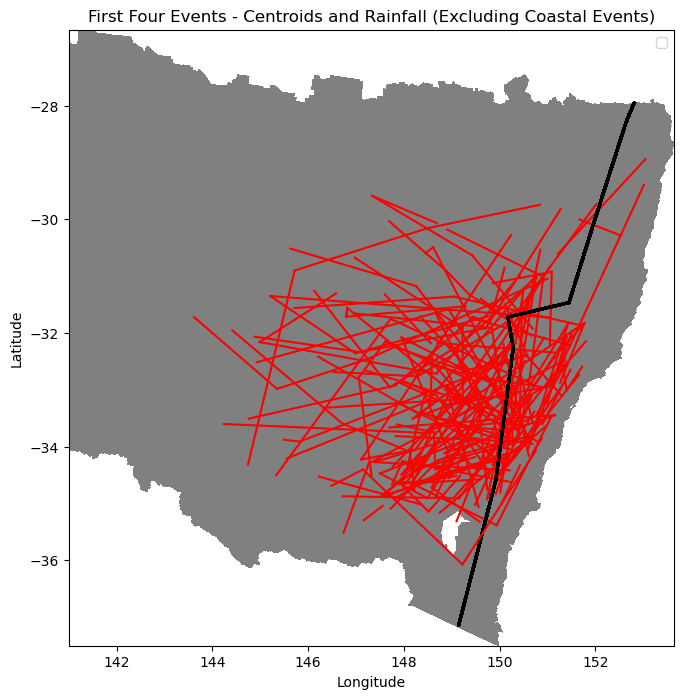

In [224]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Define a minimum threshold for KDE values
kde_threshold = 1e-4

def plot_event_centroids(ax, csv_file, polygons_data, linestrings_data, xi, yi, positions, mask, event_label):
    try:
        # Load the CSV file
        df = pd.read_csv(csv_file)

        # Filter out NaN values in latitude and longitude
        x_cleaned = df[['Latitude', 'Longitude'] + [col for col in df.columns if col.startswith('Rainfall')]].dropna()

        # Sum up the rainfall values for the 7 days
        x_cleaned['7_day_accumulated_rainfall'] = x_cleaned[[col for col in x_cleaned.columns if col.startswith('Rainfall')]].sum(axis=1)

        # Perform Gaussian KDE on the accumulated rainfall data
        values = np.vstack([x_cleaned['Longitude'], x_cleaned['Latitude']])
        rainfall = x_cleaned['7_day_accumulated_rainfall']
        kde = gaussian_kde(values, weights=rainfall, bw_method='scott')
        zi = kde(positions).reshape(xi.shape)

        # Mask the grid to include only points inside the polygons geometry
        zi = np.where(mask, zi, np.nan)

        # Plot the polygons and linestrings
        polygons_data.plot(ax=ax, color='gray', edgecolor='none')
        linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

        # Plot the 2D contour plot with accumulated rainfall as contours
        daily_means = []  # List to store daily mean rainfall
        centroids = []  # List to store retained centroids
        retained_days = []  # List to store retained days

        # Perform KDE for each day and calculate centroids based on threshold
        rainfall_columns = [col for col in x_cleaned.columns if col.startswith('Rainfall')]
        colors = sns.color_palette("husl", len(rainfall_columns))

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_rainfall.mean()
            daily_means.append(daily_mean_rainfall)
            print(f"{event_label} - Day {i+1} Mean Rainfall: {daily_mean_rainfall:.2f} mm")

        # Calculate the median of the daily mean rainfall
        median_threshold = np.median(daily_means)
        print(f"{event_label} - Median Threshold: {median_threshold:.2f} mm")

        # Track centroids and joined lines
        all_centroids = []
        all_joined_lines = []
        joined_centroids = set()

        for i, col in enumerate(rainfall_columns):
            daily_rainfall = x_cleaned[col]
            daily_mean_rainfall = daily_means[i]

            if daily_mean_rainfall >= median_threshold:
                daily_kde = gaussian_kde(values, weights=daily_rainfall, bw_method='scott')
                daily_zi = daily_kde(positions).reshape(xi.shape)
                daily_zi = np.where(mask, daily_zi, np.nan)
                # Apply the threshold to filter out negligible KDE values
                daily_zi = np.where(daily_zi >= kde_threshold, daily_zi, np.nan)
                daily_contour = ax.contour(xi, yi, daily_zi, levels=1, colors=[colors[i]], linewidths=1.5)

                if daily_contour.collections:
                    paths = [c.get_paths() for c in daily_contour.collections]
                    for path in paths:
                        for p in path:
                            centroid = p.vertices.mean(axis=0)  # Calculate the centroid
                            all_centroids.append(centroid)
                            retained_days.append(i)

                for c in daily_contour.collections:
                    c.remove()  # Remove the contour lines

        if all_centroids:
            all_centroids = np.array(all_centroids)
            centroids_set = set(tuple(c) for c in all_centroids)
            joined_centroids = set()
            joined_lines = []

            for j in range(len(all_centroids)):
                centroid = all_centroids[j]
                ax.plot(centroid[0], centroid[1], marker='', markersize=8, color='red', linestyle='')
                joined_centroids.add(tuple(centroid))

                if j > 0 and retained_days[j] == retained_days[j - 1] + 1:
                    ax.plot([all_centroids[j - 1, 0], centroid[0]], [all_centroids[j - 1, 1], centroid[1]], color='red', linestyle='-', linewidth=1.5)
                    joined_lines.append((all_centroids[j - 1], centroid))

            unjoined_centroids = [c for c in all_centroids if tuple(c) not in joined_centroids]
            for centroid in unjoined_centroids:
                ax.plot(centroid[0], centroid[1], 'o', color='blue', markersize=8, label=f'{event_label} - Unjoined')

            return np.array(all_centroids), joined_lines
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")
        return np.array([]), []

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Get the bounds of the polygons
minx, miny, maxx, maxy = polygons_data.total_bounds

# Create a grid of points within the bounds
xi, yi = np.meshgrid(np.linspace(minx, maxx, 100), np.linspace(miny, maxy, 100))

# Flatten the grid to pass into the KDE function
positions = np.vstack([xi.ravel(), yi.ravel()])

# Mask the grid to include only points inside the polygons geometry
points = np.vstack((xi.flatten(), yi.flatten())).T
mask = np.array([polygons_data.contains(Point(point)).any() for point in points])
mask = mask.reshape(xi.shape)

# Load the Excel file and extract unique event names
excel_file = '/Users/coolkarni/Desktop/OneDrive - The University of Melbourne/R1_99_New Events.xlsx'
df_events = pd.read_excel(excel_file, sheet_name='Sheet3')
event_names = df_events['Event'].dropna().unique()

# Load the Coastal Events Excel file and extract event names to exclude
coastal_events_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/BoM Station list 4.xlsx'
df_coastal = pd.read_excel(coastal_events_file, sheet_name='Coastal Events')
coastal_events = df_coastal['Coastal Events'].dropna().unique()

# Filter out the coastal events from the event names
filtered_event_names = [event for event in event_names if event not in coastal_events]

# Find the CSV files for each event
csv_dir = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/BoM Station Dataset/Rainfall Stored values for R1_99 Events/'
event_files = [os.path.join(csv_dir, f'{event}.csv') for event in filtered_event_names]

# Slice to include only the first four events
event_files = event_files[:-1]  # Changed to only the first four events

# Initialize a list to store the joined lines and centroids for each event
all_joined_lines = []
all_centroids = []

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
for event_file in event_files:
    event_label = os.path.basename(event_file).replace('.csv', '')
    centroids, joined_lines = plot_event_centroids(ax, event_file, polygons_data, linestrings_data, xi, yi, positions, mask, event_label)
    if centroids.size > 0:
        all_centroids.append({'event': event_label, 'centroids': centroids})
    if joined_lines:
        all_joined_lines.append({'event': event_label, 'joined_lines': joined_lines})

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('First Four Events - Centroids and Rainfall (Excluding Coastal Events)')
plt.legend()
plt.show()

# Load existing data if available
existing_joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
existing_centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

if os.path.exists(existing_joined_lines_file):
    df_existing_joined_lines = pd.read_csv(existing_joined_lines_file)
else:
    df_existing_joined_lines = pd.DataFrame(columns=['event', 'start_lon', 'start_lat', 'end_lon', 'end_lat'])

if os.path.exists(existing_centroids_file):
    df_existing_centroids = pd.read_csv(existing_centroids_file)
else:
    df_existing_centroids = pd.DataFrame(columns=['event', 'longitude', 'latitude'])

# Append new data to existing data
new_joined_lines_data = []
for item in all_joined_lines:
    event = item['event']
    for line in item['joined_lines']:
        new_joined_lines_data.append({'event': event, 'start_lon': line[0][0], 'start_lat': line[0][1], 'end_lon': line[1][0], 'end_lat': line[1][1]})

df_new_joined_lines = pd.DataFrame(new_joined_lines_data)
df_combined_joined_lines = pd.concat([df_existing_joined_lines, df_new_joined_lines], ignore_index=True)
df_combined_joined_lines.to_csv(existing_joined_lines_file, index=False)

new_centroids_data = []
for item in all_centroids:
    event = item['event']
    for centroid in item['centroids']:
        new_centroids_data.append({'event': event, 'longitude': centroid[0], 'latitude': centroid[1]})

df_new_centroids = pd.DataFrame(new_centroids_data)
df_combined_centroids = pd.concat([df_existing_centroids, df_new_centroids], ignore_index=True)
df_combined_centroids.to_csv(existing_centroids_file, index=False)


/var/folders/1_/_3k8kb7n5vz43s2kfx69bp0c0000gn/T/ipykernel_1041/4190595371.py:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(sections))


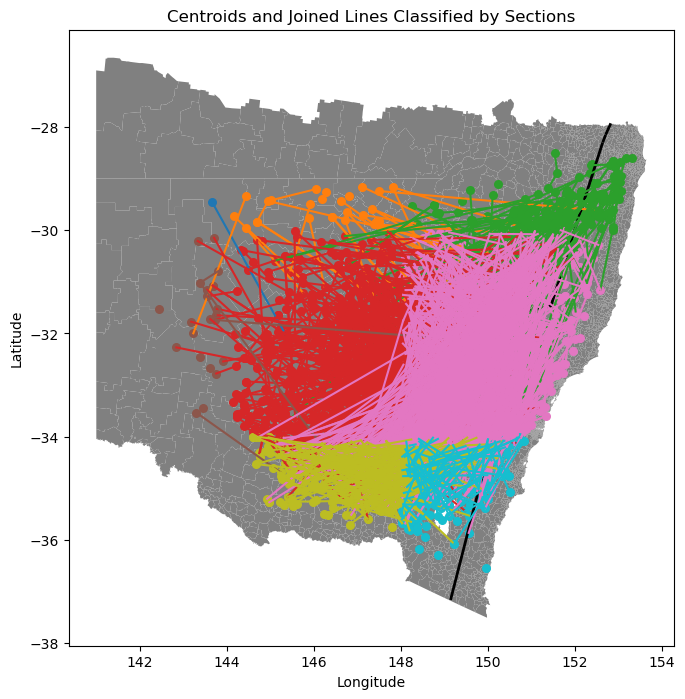

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Define the sections
def define_sections():
    return {
        1: ((-30, -26), (140, 144)),
        2: ((-30, -26), (144, 148)),
        3: ((-30, -26), (148, 154)),
        4: ((-34, -30), (144, 148)),
        5: ((-34, -30), (140, 144)),
        6: ((-34, -30), (148, 154)),
        7: ((-40, -34), (140, 144)),
        8: ((-40, -34), (144, 148)),
        9: ((-40, -34), (148, 154)),
    }

def point_in_section(point, section):
    lat, lon = point
    (lat_min, lat_max), (lon_min, lon_max) = section
    return lat_min <= lat <= lat_max and lon_min <= lon <= lon_max

def classify_point(point, sections):
    for section_id, section in sections.items():
        if point_in_section(point, section):
            return section_id
    return None

def classify_line(line_centroids, sections):
    section_counts = {section_id: 0 for section_id in sections}
    for centroid in line_centroids:
        section_id = classify_point(centroid, sections)
        if section_id:
            section_counts[section_id] += 1
    # Find the section with the maximum count
    most_common_section = max(section_counts, key=section_counts.get)
    return most_common_section

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Load the joined lines and centroids data
joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

df_joined_lines = pd.read_csv(joined_lines_file)
df_centroids = pd.read_csv(centroids_file)

# Define sections
sections = define_sections()

# Classify centroids
df_centroids['section'] = df_centroids.apply(lambda row: classify_point((row['latitude'], row['longitude']), sections), axis=1)

# Classify lines
line_classifications = []
for _, line in df_joined_lines.iterrows():
    line_centroids = [
        (line['start_lat'], line['start_lon']),
        (line['end_lat'], line['end_lon'])
    ]
    section = classify_line(line_centroids, sections)
    line_classifications.append({'start_lat': line['start_lat'], 'start_lon': line['start_lon'],
                                 'end_lat': line['end_lat'], 'end_lon': line['end_lon'],
                                 'section': section})

df_line_classifications = pd.DataFrame(line_classifications)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map
polygons_data.plot(ax=ax, color='gray', edgecolor='none')
linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

# Plot lines by section
colors = plt.cm.get_cmap('tab10', len(sections))
for section_id, color in zip(sections.keys(), colors.colors):
    section_lines = df_line_classifications[df_line_classifications['section'] == section_id]
    for _, row in section_lines.iterrows():
        ax.plot([row['start_lon'], row['end_lon']], [row['start_lat'], row['end_lat']],
                color=color, linestyle='-', linewidth=1.5, label=f'Section {section_id}' if section_id == list(sections.keys())[0] else "")

# Plot centroids by section
for section_id, color in zip(sections.keys(), colors.colors):
    section_centroids = df_centroids[df_centroids['section'] == section_id]
    ax.scatter(section_centroids['longitude'], section_centroids['latitude'], color=color,
               s=30, label=f'Section {section_id}')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Centroids and Joined Lines Classified by Sections')

plt.show()


Unique event files for Section 1:
Event 24 - 1891-06-22 to 1891-06-28
Event 26 - 1892-10-14 to 1892-10-20
Event 27 - 1893-03-02 to 1893-03-08
Event 42 - 1896-06-20 to 1896-06-26
Event 70 - 1888-12-14 to 1888-12-20
Event 73 - 1900-11-16 to 1900-11-22
Event 75 - 1892-01-09 to 1892-01-15
Event 103 - 1891-04-11 to 1891-04-17
Event 154 - 1877-05-09 to 1877-05-15
Event 155 - 1878-02-03 to 1878-02-09
Event 158 - 1880-07-16 to 1880-07-22
Event 166 - 1891-06-09 to 1891-06-15
Event 178 - 1870-03-19 to 1870-03-25
Event 179 - 1870-05-08 to 1870-05-14
Event 197 - 1895-08-13 to 1895-08-19
Event 205 - 1874-06-24 to 1874-06-30
Event 217 - 1887-04-11 to 1887-04-17
Event 219 - 1897-01-07 to 1897-01-13
Event 223 - 1896-05-11 to 1896-05-17
Event 237 - 1893-12-26 to 1894-01-01
Event 238 - 1894-06-03 to 1894-06-09
Event 242 - 1899-08-08 to 1899-08-14
Event 246 - 1880-03-31 to 1880-04-06
Event 287 - 1873-11-08 to 1873-11-14
Event 295 - 1872-01-20 to 1872-01-26
Event 314 - 1899-04-07 to 1899-04-13
Event 320 -

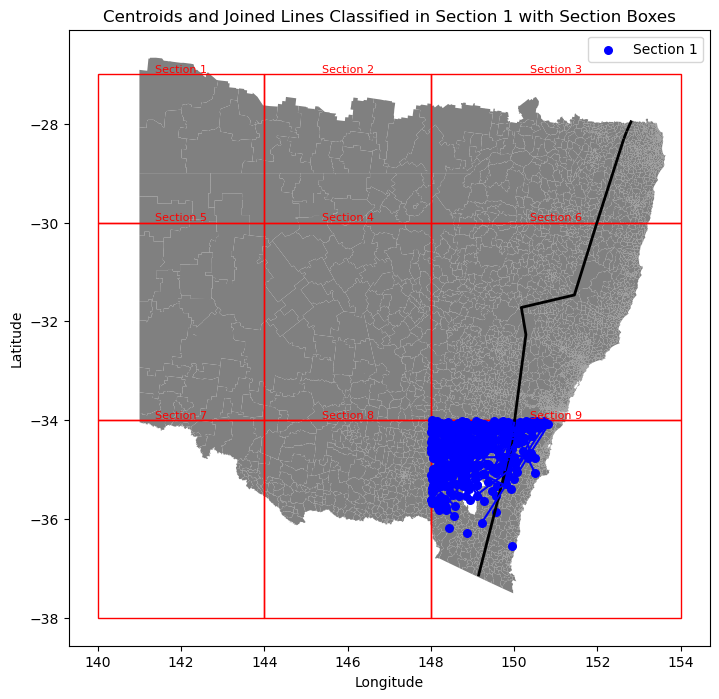

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Rectangle

# Define the sections
def define_sections():
    return {
        1: ((-30, -27), (140, 144)),
        2: ((-30, -27), (144, 148)),
        3: ((-30, -27), (148, 154)),
        4: ((-34, -30), (144, 148)),
        5: ((-34, -30), (140, 144)),
        6: ((-34, -30), (148, 154)),
        7: ((-38, -34), (140, 144)),
        8: ((-38, -34), (144, 148)),
        9: ((-38, -34), (148, 154)),
    }

def point_in_section(point, section):
    lat, lon = point
    (lat_min, lat_max), (lon_min, lon_max) = section
    return lat_min <= lat <= lat_max and lon_min <= lon <= lon_max

def classify_point(point, sections):
    for section_id, section in sections.items():
        if point_in_section(point, section):
            return section_id
    return None

def classify_line(line_centroids, sections):
    section_counts = {section_id: 0 for section_id in sections}
    for centroid in line_centroids:
        section_id = classify_point(centroid, sections)
        if section_id:
            section_counts[section_id] += 1
    # Find the section with the maximum count
    most_common_section = max(section_counts, key=section_counts.get)
    return most_common_section

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Load the joined lines and centroids data
joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

df_joined_lines = pd.read_csv(joined_lines_file)
df_centroids = pd.read_csv(centroids_file)

# Define sections
sections = define_sections()

# Classify centroids
df_centroids['section'] = df_centroids.apply(lambda row: classify_point((row['latitude'], row['longitude']), sections), axis=1)

# Classify lines
line_classifications = []
for _, line in df_joined_lines.iterrows():
    line_centroids = [
        (line['start_lat'], line['start_lon']),
        (line['end_lat'], line['end_lon'])
    ]
    section = classify_line(line_centroids, sections)
    line_classifications.append({'start_lat': line['start_lat'], 'start_lon': line['start_lon'],
                                 'end_lat': line['end_lat'], 'end_lon': line['end_lon'],
                                 'section': section,
                                 'event': line['event']})  # Include the event name

df_line_classifications = pd.DataFrame(line_classifications)

# Filter for Section 1
section_id = 9
section_lines = df_line_classifications[df_line_classifications['section'] == section_id]
section_centroids = df_centroids[df_centroids['section'] == section_id]

# Print the unique event files for Section 1
unique_events_section_1 = section_lines['event'].unique()
print("Unique event files for Section 1:")
for event in unique_events_section_1:
    print(event)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map
polygons_data.plot(ax=ax, color='gray', edgecolor='none')
linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

# Draw section boxes
for section_id, ((lat_min, lat_max), (lon_min, lon_max)) in sections.items():
    rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                     linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(lon_min + (lon_max - lon_min) / 2, lat_max, f'Section {section_id}',
            horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='red')

# Plot lines for Section 1
for _, row in section_lines.iterrows():
    ax.plot([row['start_lon'], row['end_lon']], [row['start_lat'], row['end_lat']],
            color='blue', linestyle='-', linewidth=1.5, label='Section 1' if _ == 0 else "")

# Plot centroids for Section 1
ax.scatter(section_centroids['longitude'], section_centroids['latitude'], color='blue',
           s=30, label='Section 1')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Centroids and Joined Lines Classified in Section 1 with Section Boxes')
plt.legend()
plt.show()


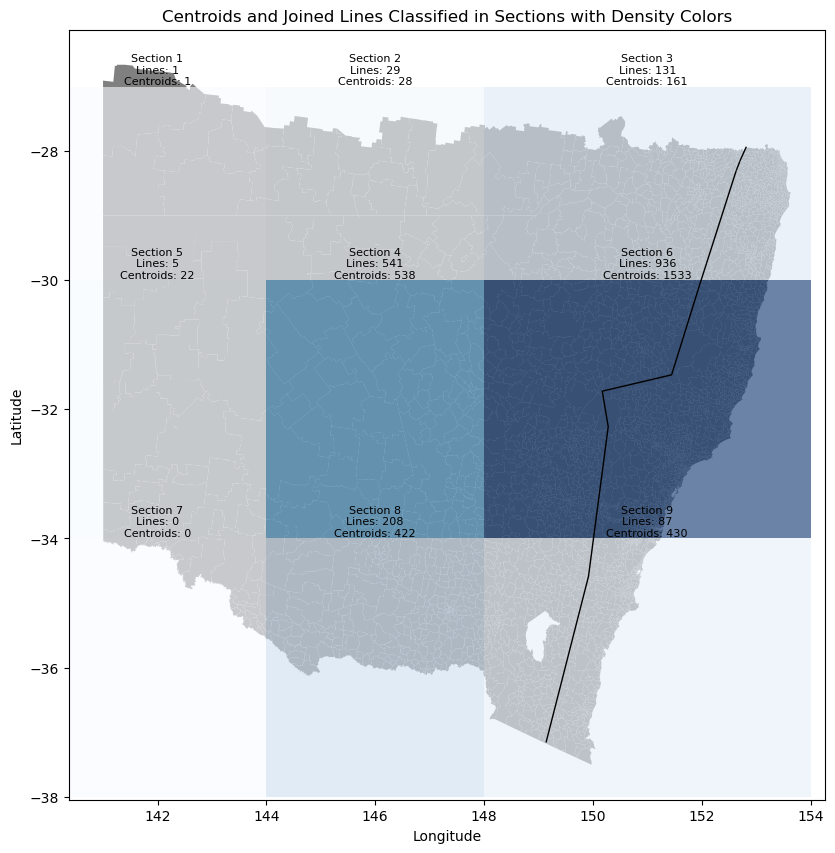

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

# Define the sections
def define_sections():
    return {
        1: ((-30, -27), (140, 144)),
        2: ((-30, -27), (144, 148)),
        3: ((-30, -27), (148, 154)),
        4: ((-34, -30), (144, 148)),
        5: ((-34, -30), (140, 144)),
        6: ((-34, -30), (148, 154)),
        7: ((-38, -34), (140, 144)),
        8: ((-38, -34), (144, 148)),
        9: ((-38, -34), (148, 154)),
    }

def point_in_section(point, section):
    lat, lon = point
    (lat_min, lat_max), (lon_min, lon_max) = section
    return lat_min <= lat <= lat_max and lon_min <= lon <= lon_max

def classify_point(point, sections):
    for section_id, section in sections.items():
        if point_in_section(point, section):
            return section_id
    return None

def classify_line(line_centroids, sections):
    section_counts = {section_id: 0 for section_id in sections}
    for centroid in line_centroids:
        section_id = classify_point(centroid, sections)
        if section_id:
            section_counts[section_id] += 1
    # Find the section with the maximum count
    most_common_section = max(section_counts, key=section_counts.get)
    return most_common_section

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Load the joined lines and centroids data
joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

df_joined_lines = pd.read_csv(joined_lines_file)
df_centroids = pd.read_csv(centroids_file)

# Define sections
sections = define_sections()

# Classify centroids
df_centroids['section'] = df_centroids.apply(lambda row: classify_point((row['latitude'], row['longitude']), sections), axis=1)

# Classify lines
line_classifications = []
for _, line in df_joined_lines.iterrows():
    line_centroids = [
        (line['start_lat'], line['start_lon']),
        (line['end_lat'], line['end_lon'])
    ]
    section = classify_line(line_centroids, sections)
    line_classifications.append({'start_lat': line['start_lat'], 'start_lon': line['start_lon'],
                                 'end_lat': line['end_lat'], 'end_lon': line['end_lon'],
                                 'section': section,
                                 'event': line['event']})  # Include the event name

df_line_classifications = pd.DataFrame(line_classifications)

# Count lines and centroids in each section
line_counts = df_line_classifications['section'].value_counts()
centroid_counts = df_centroids['section'].value_counts()

# Normalize counts for coloring
line_norm = mcolors.Normalize(vmin=line_counts.min(), vmax=line_counts.max())
centroid_norm = mcolors.Normalize(vmin=centroid_counts.min(), vmax=centroid_counts.max())

# Create colormaps
line_cmap = plt.cm.Blues
centroid_cmap = plt.cm.Reds

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the base map
polygons_data.plot(ax=ax, color='gray', edgecolor='none')
linestrings_data.plot(ax=ax, color='black', linewidth=1)  # Adjust color and linewidth as needed

# Draw section boxes with colors representing line density
for section_id, ((lat_min, lat_max), (lon_min, lon_max)) in sections.items():
    line_density = line_counts.get(section_id, 0)
    centroid_density = centroid_counts.get(section_id, 0)
    line_color = line_cmap(line_norm(line_density))
    centroid_color = centroid_cmap(centroid_norm(centroid_density))
    rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                     linewidth=1, edgecolor='none', facecolor=line_color, alpha=0.6)
    ax.add_patch(rect)
    ax.text(lon_min + (lon_max - lon_min) / 2, lat_max, f'Section {section_id}\nLines: {line_density}\nCentroids: {centroid_density}',
            horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='black')

# Plot lines for each section
for _, row in df_line_classifications.iterrows():
    section = row['section']
    color = line_cmap(line_norm(line_counts.get(section, 0)))
   

# Plot centroids for each section
for _, row in df_centroids.iterrows():
    section = row['section']
    color = centroid_cmap(centroid_norm(centroid_counts.get(section, 0)))

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Centroids and Joined Lines Classified in Sections with Density Colors')
plt.show()



Unique event files for Section 1:
Event 1 - 1889-07-14 to 1889-07-20
Event 2 - 1890-01-10 to 1890-01-16
Event 4 - 1890-03-04 to 1890-03-10
Event 5 - 1891-01-11 to 1891-01-17
Event 6 - 1891-06-04 to 1891-06-10
Event 11 - 1892-10-24 to 1892-10-30
Event 14 - 1893-02-13 to 1893-02-19
Event 18 - 1895-01-28 to 1895-02-03
Event 20 - 1897-02-26 to 1897-03-04
Event 22 - 1898-03-04 to 1898-03-10
Event 34 - 1898-01-22 to 1898-01-28
Event 40 - 1890-03-22 to 1890-03-28
Event 44 - 1886-11-12 to 1886-11-18
Event 46 - 1898-02-18 to 1898-02-24
Event 48 - 1896-02-24 to 1896-03-01
Event 57 - 1887-03-24 to 1887-03-30
Event 58 - 1887-07-10 to 1887-07-16
Event 61 - 1892-06-12 to 1892-06-18
Event 62 - 1890-04-21 to 1890-04-27
Event 63 - 1899-01-28 to 1899-02-03
Event 64 - 1888-10-06 to 1888-10-12
Event 72 - 1891-03-20 to 1891-03-26
Event 92 - 1899-05-26 to 1899-06-01
Event 94 - 1891-03-04 to 1891-03-10
Event 96 - 1894-01-19 to 1894-01-25
Event 97 - 1894-02-09 to 1894-02-15
Event 99 - 1899-12-24 to 1899-12-30

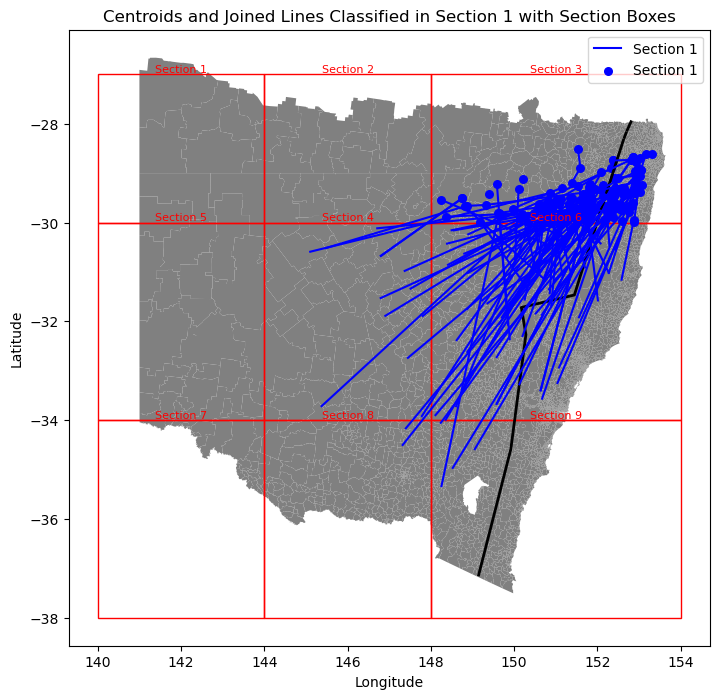

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Rectangle

# Define the sections
def define_sections():
    return {
        1: ((-30, -27), (140, 144)),
        2: ((-30, -27), (144, 148)),
        3: ((-30, -27), (148, 154)),
        4: ((-34, -30), (144, 148)),
        5: ((-34, -30), (140, 144)),
        6: ((-34, -30), (148, 154)),
        7: ((-38, -34), (140, 144)),
        8: ((-38, -34), (144, 148)),
        9: ((-38, -34), (148, 154)),
    }

def point_in_section(point, section):
    lat, lon = point
    (lat_min, lat_max), (lon_min, lon_max) = section
    return lat_min <= lat <= lat_max and lon_min <= lon <= lon_max

def classify_point(point, sections):
    for section_id, section in sections.items():
        if point_in_section(point, section):
            return section_id
    return None

def classify_line(line_centroids, sections):
    section_counts = {section_id: 0 for section_id in sections}
    for centroid in line_centroids:
        section_id = classify_point(centroid, sections)
        if section_id:
            section_counts[section_id] += 1
    # Find the section with the maximum count
    most_common_section = max(section_counts, key=section_counts.get)
    return most_common_section

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Load the joined lines and centroids data
joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

df_joined_lines = pd.read_csv(joined_lines_file)
df_centroids = pd.read_csv(centroids_file)

# Define sections
sections = define_sections()

# Classify centroids
df_centroids['section'] = df_centroids.apply(lambda row: classify_point((row['latitude'], row['longitude']), sections), axis=1)

# Classify lines
line_classifications = []
for _, line in df_joined_lines.iterrows():
    line_centroids = [
        (line['start_lat'], line['start_lon']),
        (line['end_lat'], line['end_lon'])
    ]
    section = classify_line(line_centroids, sections)
    line_classifications.append({'start_lat': line['start_lat'], 'start_lon': line['start_lon'],
                                 'end_lat': line['end_lat'], 'end_lon': line['end_lon'],
                                 'section': section,
                                 'event': line['event']})  # Include the event name

df_line_classifications = pd.DataFrame(line_classifications)

# Add the section classification to the original joined lines dataframe
df_joined_lines['section'] = df_line_classifications['section']

# Save the updated dataframes to CSV files
df_joined_lines.to_csv('/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines_with_sections.csv', index=False)
df_centroids.to_csv('/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids_with_sections.csv', index=False)

# Filter for Section 1
section_id = 3
section_lines = df_joined_lines[df_joined_lines['section'] == section_id]
section_centroids = df_centroids[df_centroids['section'] == section_id]

# Print the unique event files for Section 1
unique_events_section_1 = section_lines['event'].unique()
print("Unique event files for Section 1:")
for event in unique_events_section_1:
    print(event)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map
polygons_data.plot(ax=ax, color='gray', edgecolor='none')
linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

# Draw section boxes
for section_id, ((lat_min, lat_max), (lon_min, lon_max)) in sections.items():
    rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                     linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(lon_min + (lon_max - lon_min) / 2, lat_max, f'Section {section_id}',
            horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='red')

# Plot lines for Section 1
for _, row in section_lines.iterrows():
    ax.plot([row['start_lon'], row['end_lon']], [row['start_lat'], row['end_lat']],
            color='blue', linestyle='-', linewidth=1.5, label='Section 1' if _ == 0 else "")

# Plot centroids for Section 1
ax.scatter(section_centroids['longitude'], section_centroids['latitude'], color='blue',
           s=30, label='Section 1')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Centroids and Joined Lines Classified in Section 1 with Section Boxes')
plt.legend()
plt.show()


Unique event files for Section 3:
Event 1 - 1889-07-14 to 1889-07-20
Event 2 - 1890-01-10 to 1890-01-16
Event 4 - 1890-03-04 to 1890-03-10
Event 5 - 1891-01-11 to 1891-01-17
Event 6 - 1891-06-04 to 1891-06-10
Event 11 - 1892-10-24 to 1892-10-30
Event 14 - 1893-02-13 to 1893-02-19
Event 18 - 1895-01-28 to 1895-02-03
Event 20 - 1897-02-26 to 1897-03-04
Event 22 - 1898-03-04 to 1898-03-10
Event 34 - 1898-01-22 to 1898-01-28
Event 40 - 1890-03-22 to 1890-03-28
Event 44 - 1886-11-12 to 1886-11-18
Event 46 - 1898-02-18 to 1898-02-24
Event 48 - 1896-02-24 to 1896-03-01
Event 57 - 1887-03-24 to 1887-03-30
Event 58 - 1887-07-10 to 1887-07-16
Event 61 - 1892-06-12 to 1892-06-18
Event 62 - 1890-04-21 to 1890-04-27
Event 63 - 1899-01-28 to 1899-02-03
Event 64 - 1888-10-06 to 1888-10-12
Event 72 - 1891-03-20 to 1891-03-26
Event 92 - 1899-05-26 to 1899-06-01
Event 94 - 1891-03-04 to 1891-03-10
Event 96 - 1894-01-19 to 1894-01-25
Event 97 - 1894-02-09 to 1894-02-15
Event 99 - 1899-12-24 to 1899-12-30

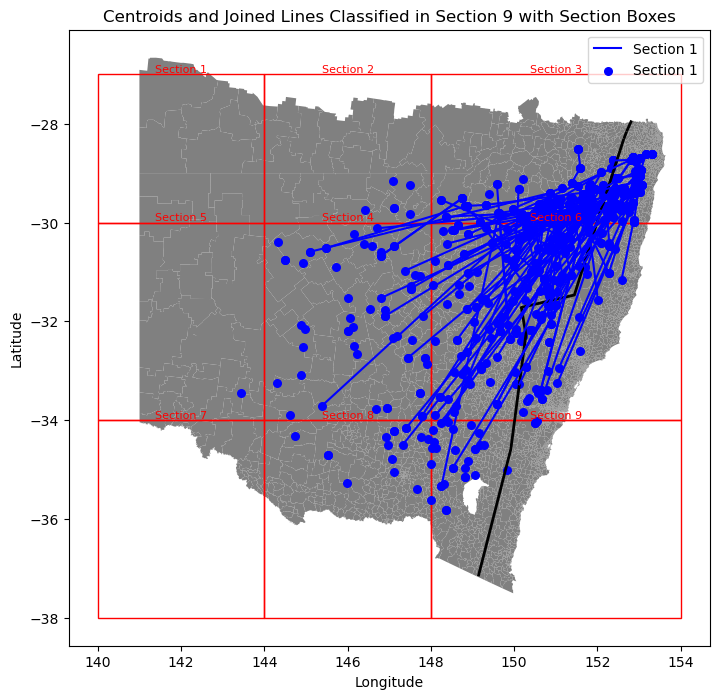

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Rectangle

# Define the sections
def define_sections():
    return {
        1: ((-30, -27), (140, 144)),
        2: ((-30, -27), (144, 148)),
        3: ((-30, -27), (148, 154)),
        4: ((-34, -30), (144, 148)),
        5: ((-34, -30), (140, 144)),
        6: ((-34, -30), (148, 154)),
        7: ((-38, -34), (140, 144)),
        8: ((-38, -34), (144, 148)),
        9: ((-38, -34), (148, 154)),
    }

def point_in_section(point, section):
    lat, lon = point
    (lat_min, lat_max), (lon_min, lon_max) = section
    return lat_min <= lat <= lat_max and lon_min <= lon <= lon_max

def classify_point(point, sections):
    for section_id, section in sections.items():
        if point_in_section(point, section):
            return section_id
    return None

def classify_line(line_centroids, sections):
    section_counts = {section_id: 0 for section_id in sections}
    for centroid in line_centroids:
        section_id = classify_point(centroid, sections)
        if section_id:
            section_counts[section_id] += 1
    # Find the section with the maximum count
    most_common_section = max(section_counts, key=section_counts.get)
    return most_common_section

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Load the joined lines and centroids data
joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

df_joined_lines = pd.read_csv(joined_lines_file)
df_centroids = pd.read_csv(centroids_file)

# Define sections
sections = define_sections()

# Classify centroids
df_centroids['section'] = df_centroids.apply(lambda row: classify_point((row['latitude'], row['longitude']), sections), axis=1)

# Classify lines
line_classifications = []
for _, line in df_joined_lines.iterrows():
    line_centroids = [
        (line['start_lat'], line['start_lon']),
        (line['end_lat'], line['end_lon'])
    ]
    section = classify_line(line_centroids, sections)
    # Include all centroids of the event in the classification
    event_centroids = df_centroids[df_centroids['event'] == line['event']]
    all_line_centroids = [(row['latitude'], row['longitude']) for _, row in event_centroids.iterrows()]
    line_classifications.append({'start_lat': line['start_lat'], 'start_lon': line['start_lon'],
                                 'end_lat': line['end_lat'], 'end_lon': line['end_lon'],
                                 'section': section,
                                 'event': line['event'],
                                 'all_centroids': all_line_centroids})

df_line_classifications = pd.DataFrame(line_classifications)

# Filter lines and centroids by the section with the most centroids
section_id = 3
section_lines = df_line_classifications[df_line_classifications['section'] == section_id]
section_centroids = df_centroids[df_centroids['section'] == section_id]

# Print the unique event files for Section 1
unique_events_section = section_lines['event'].unique()
print(f"Unique event files for Section {section_id}:")
for event in unique_events_section:
    print(event)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map
polygons_data.plot(ax=ax, color='gray', edgecolor='none')
linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

# Draw section boxes
for section_id, ((lat_min, lat_max), (lon_min, lon_max)) in sections.items():
    rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                     linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(lon_min + (lon_max - lon_min) / 2, lat_max, f'Section {section_id}',
            horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='red')

# Plot lines and all centroids for the section with the most centroids
for _, row in section_lines.iterrows():
    ax.plot([row['start_lon'], row['end_lon']], [row['start_lat'], row['end_lat']],
            color='blue', linestyle='-', linewidth=1.5, label='Section 1' if _ == 0 else "")
    # Plot all centroids for the event
    all_centroids = row['all_centroids']
    for centroid in all_centroids:
        ax.scatter(centroid[1], centroid[0], color='blue', s=30)

# Plot centroids for the filtered section
ax.scatter(section_centroids['longitude'], section_centroids['latitude'], color='blue',
           s=30, label='Section 1')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Centroids and Joined Lines Classified in Section {section_id} with Section Boxes')
plt.legend()
plt.show()


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Rectangle

# Define the sections
def define_sections():
    return {
        1: ((-30, -27), (140, 144)),
        2: ((-30, -27), (144, 148)),
        3: ((-30, -27), (148, 154)),
        4: ((-34, -30), (144, 148)),
        5: ((-34, -30), (140, 144)),
        6: ((-34, -30), (148, 154)),
        7: ((-38, -34), (140, 144)),
        8: ((-38, -34), (144, 148)),
        9: ((-38, -34), (148, 154)),
    }

def point_in_section(point, section):
    lat, lon = point
    (lat_min, lat_max), (lon_min, lon_max) = section
    return lat_min <= lat <= lat_max and lon_min <= lon <= lon_max

def classify_point(point, sections):
    for section_id, section in sections.items():
        if point_in_section(point, section):
            return section_id
    return None

def classify_line(line_centroids, sections):
    section_counts = {section_id: 0 for section_id in sections}
    for centroid in line_centroids:
        section_id = classify_point(centroid, sections)
        if section_id:
            section_counts[section_id] += 1
    # Find the section with the maximum count
    most_common_section = max(section_counts, key=section_counts.get)
    return most_common_section

# Load the GeoPackage layers
gpkg_path = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/combined_layers.gpkg'
polygons_data = gpd.read_file(gpkg_path, layer='polygons')  # Adjust layer name if necessary
linestrings_data = gpd.read_file(gpkg_path, layer='linestrings')  # Adjust layer name if necessary

# Load the joined lines and centroids data
joined_lines_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/joined_lines2.csv'
centroids_file = '/Users/coolkarni/Documents/Documents/Documents/Master thesis Data/centroids2.csv'

df_joined_lines = pd.read_csv(joined_lines_file)
df_centroids = pd.read_csv(centroids_file)

# Define sections
sections = define_sections()

# Filter data for Event 2
event_name = '1890-01-10 to 1890-01-16'
df_event_lines = df_joined_lines[df_joined_lines['event'] == event_name]
df_event_centroids = df_centroids[df_centroids['event'] == event_name]

if df_event_centroids.empty:
    raise ValueError(f"No centroids found for event: {event_name}")

# Classify centroids
df_event_centroids['section'] = df_event_centroids.apply(lambda row: classify_point((row['latitude'], row['longitude']), sections), axis=1)

# Check for empty sections
section_counts = df_event_centroids['section'].value_counts()
if section_counts.empty:
    raise ValueError(f"No sections assigned to centroids for event: {event_name}")

# Classify lines for the event
line_classifications = []
for _, line in df_event_lines.iterrows():
    line_centroids = [
        (line['start_lat'], line['start_lon']),
        (line['end_lat'], line['end_lon'])
    ]
    section = classify_line(line_centroids, sections)
    # Include all centroids of the event in the classification
    all_line_centroids = [(row['latitude'], row['longitude']) for _, row in df_event_centroids.iterrows()]
    line_classifications.append({'start_lat': line['start_lat'], 'start_lon': line['start_lon'],
                                 'end_lat': line['end_lat'], 'end_lon': line['end_lon'],
                                 'section': section,
                                 'event': line['event'],
                                 'all_centroids': all_line_centroids})

df_line_classifications = pd.DataFrame(line_classifications)

# Filter lines and centroids by the section with the most centroids
most_common_section = section_counts.idxmax()
section_lines = df_line_classifications[df_line_classifications['section'] == most_common_section]
section_centroids = df_event_centroids[df_event_centroids['section'] == most_common_section]

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the base map
polygons_data.plot(ax=ax, color='gray', edgecolor='none')
linestrings_data.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

# Draw section boxes
for section_id, ((lat_min, lat_max), (lon_min, lon_max)) in sections.items():
    rect = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                     linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(lon_min + (lon_max - lon_min) / 2, lat_max, f'Section {section_id}',
            horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='red')

# Plot lines and all centroids for the section with the most centroids
for _, row in section_lines.iterrows():
    ax.plot([row['start_lon'], row['end_lon']], [row['start_lat'], row['end_lat']],
            color='blue', linestyle='-', linewidth=1.5, label='Event 2 Lines' if _ == 0 else "")
    # Plot all centroids for the event
    all_centroids = row['all_centroids']
    for centroid in all_centroids:
        ax.scatter(centroid[1], centroid[0], color='blue', s=30)

# Plot centroids for the filtered section
ax.scatter(section_centroids['longitude'], section_centroids['latitude'], color='blue',
           s=30, label='Event 2 Centroids')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Event: {event_name} - Centroids and Lines Classified in Section {most_common_section} with Section Boxes')
plt.legend()
plt.show()


ValueError: No centroids found for event: 1890-01-10 to 1890-01-16